This notebook contains analysis of food intake and meal in reversal session.

All analyses are for figure 4.

## Pellet and Meal Analysis and Distribution

In [1]:
import sys
sys.path.insert(0, '../scripts')

import os
import numpy as np
import meals as ml
from accuracy import graph_group_stats
from path import *
import intervals as invs
import warnings
warnings.filterwarnings('ignore')

export_root = '../export/Supplementary/'
os.makedirs(os.path.join(export_root, 'CASK_meal'), exist_ok=True)
time_threshold = 60
pellet_threshold = 2

# Initialize all data lists
ctrl_avg_pellet, cask_avg_pellet = [], []  # pellet per hour
ctrl_dark_meals, cask_dark_meals = [], []  # percentage of meals in inactive/dark phase
ctrl_fir_meal, cask_fir_meal = [], []
ctrl_fir_good_meal, cask_fir_good_meal = [], []
flip_ctrl_meal_count, flip_cask_meal_count = [], []
ctrl_in_meal_ratios, cask_in_meal_ratios = [], []

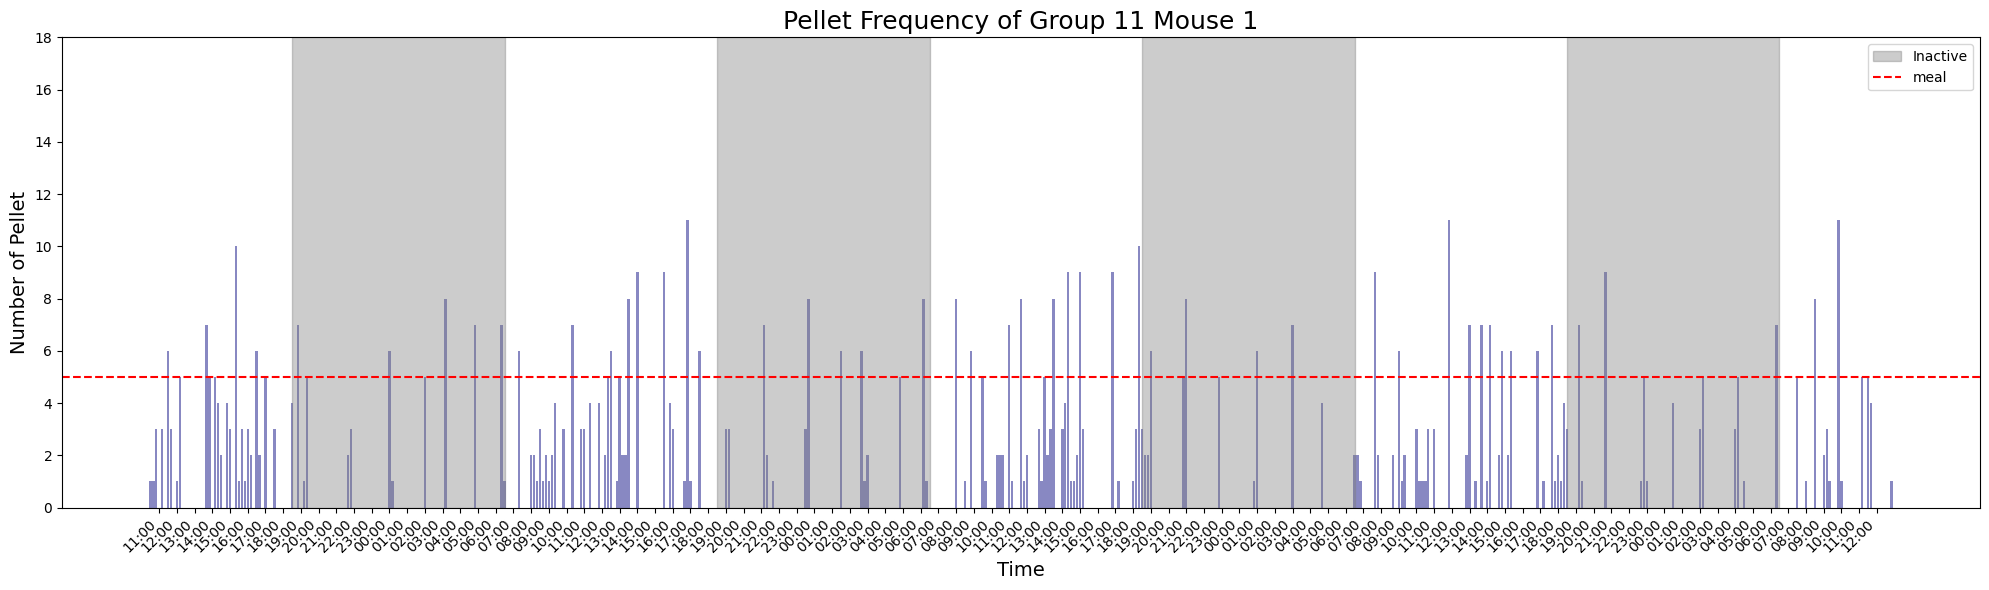

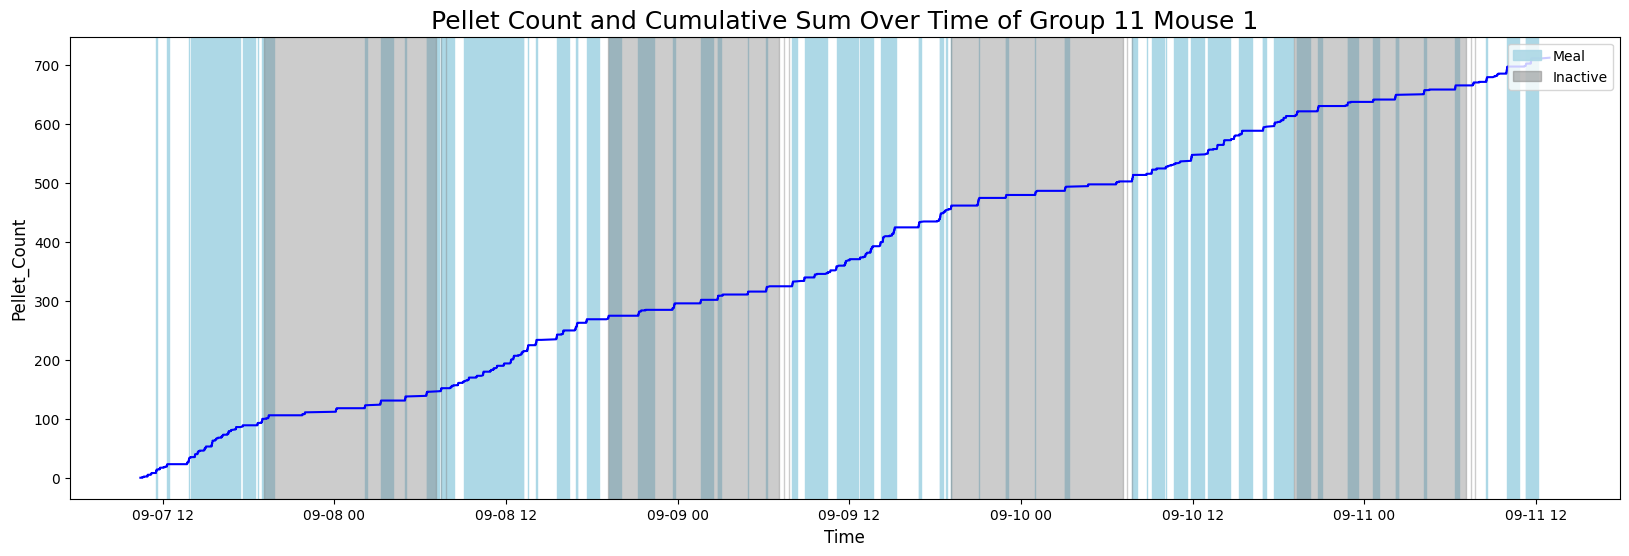

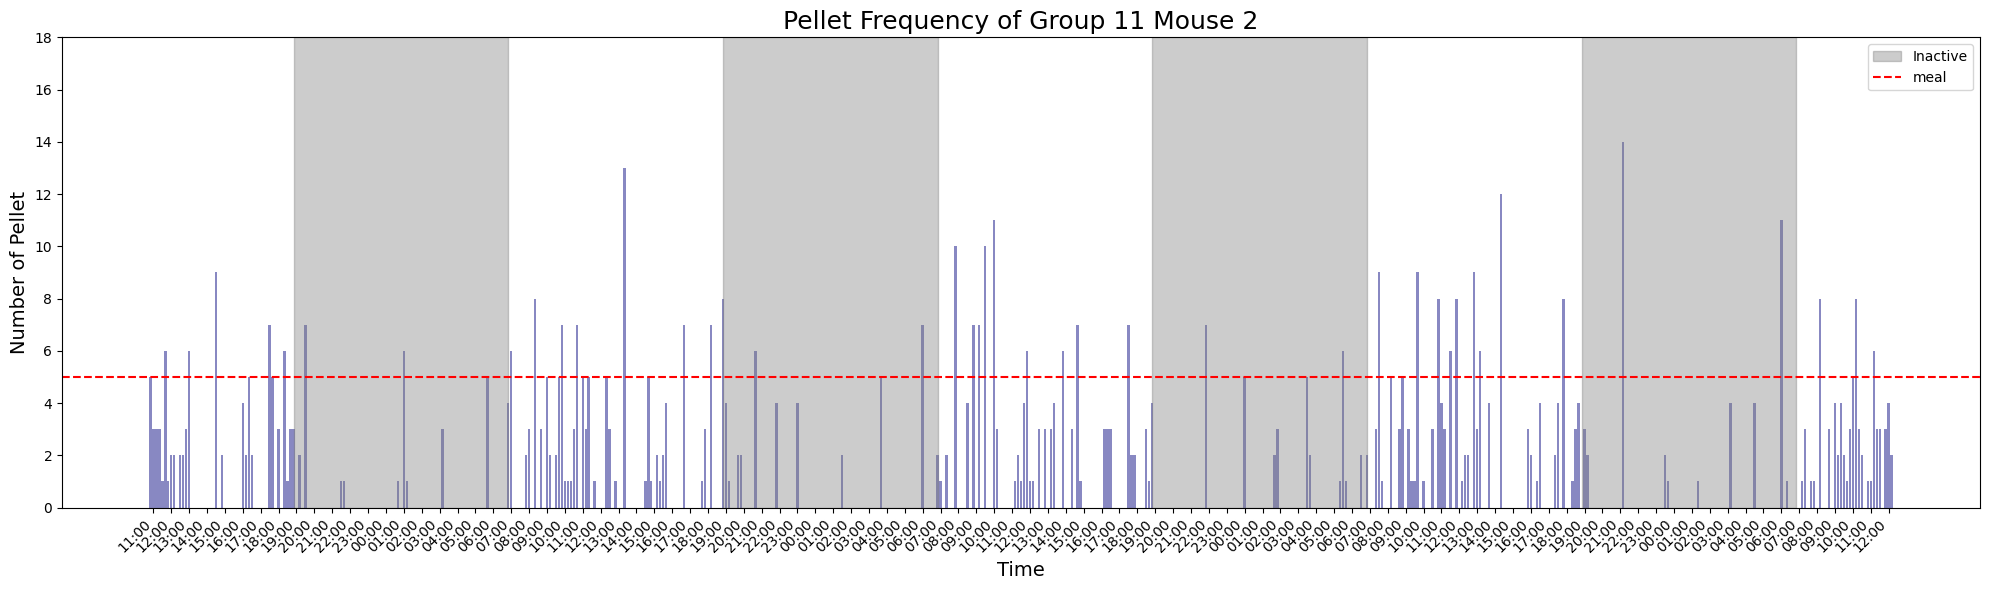

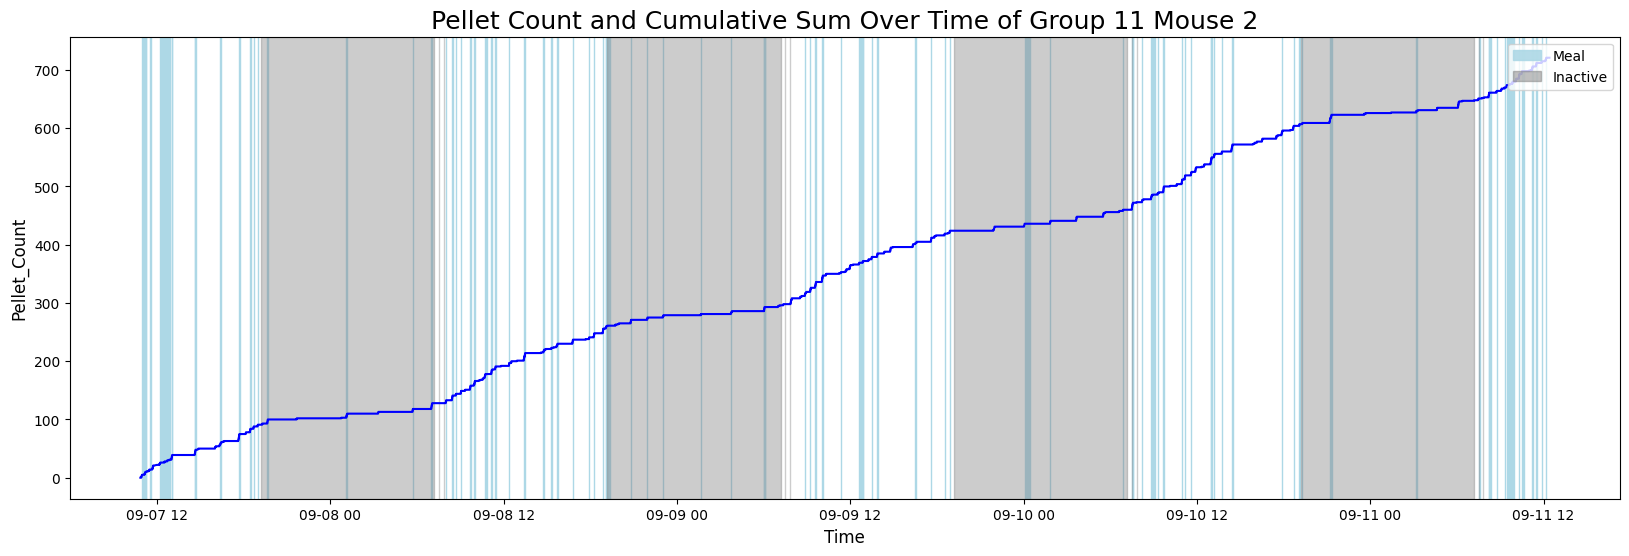

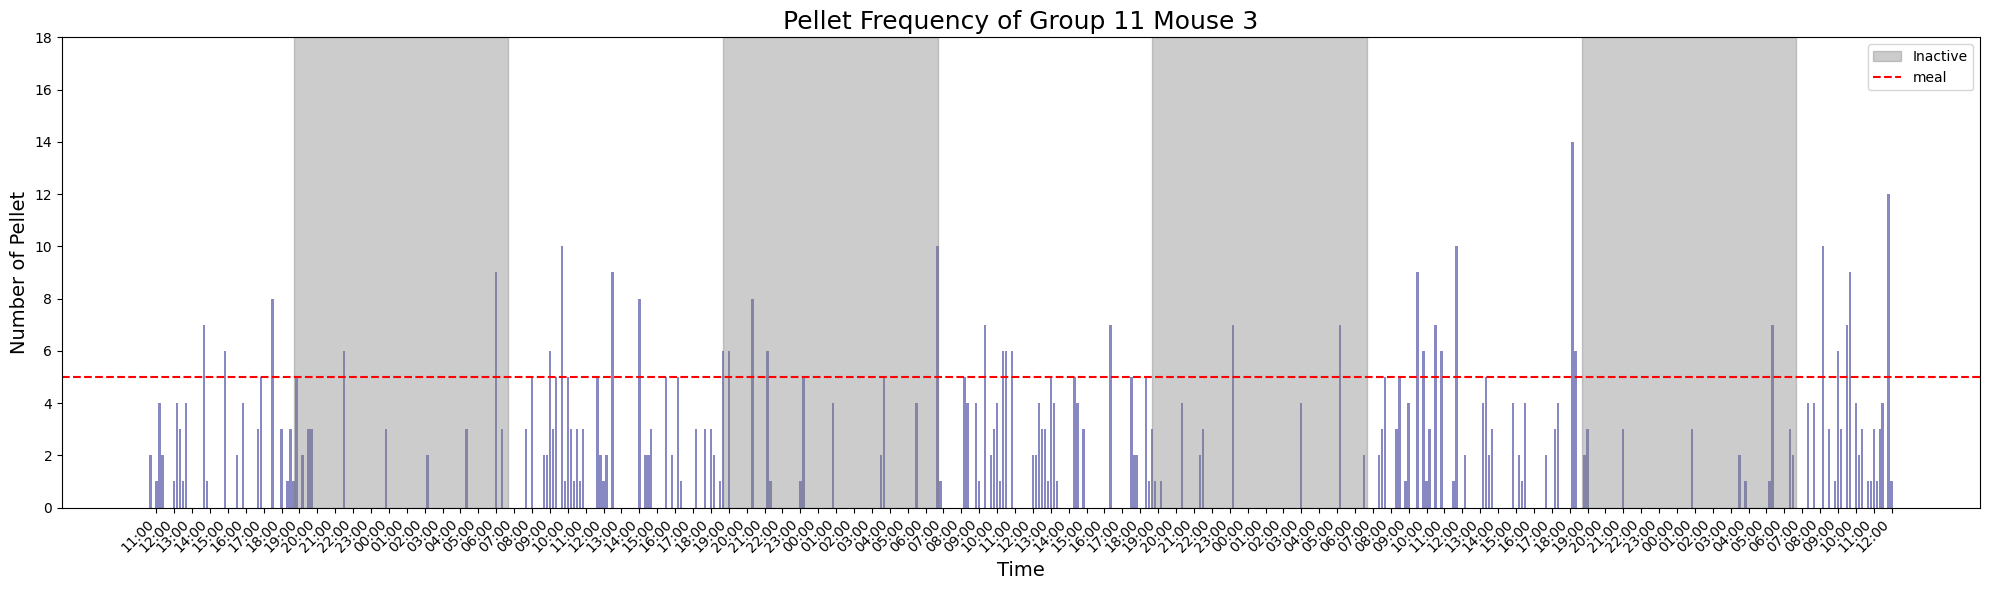

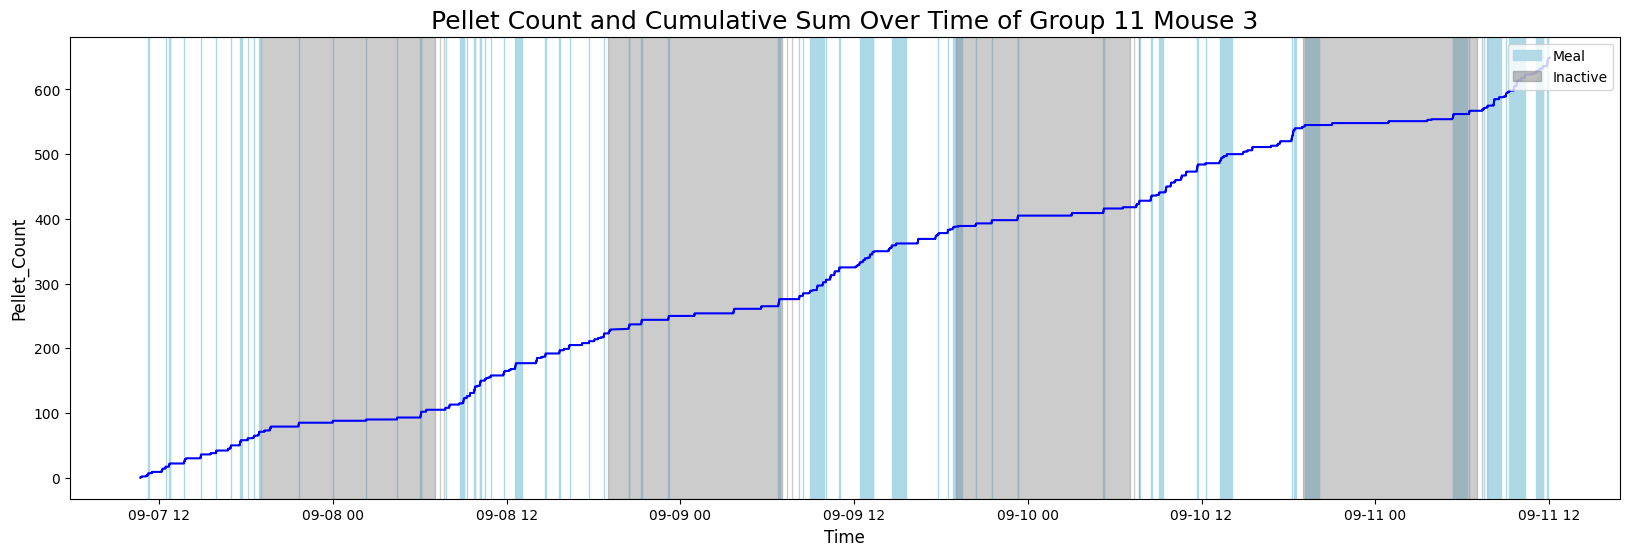

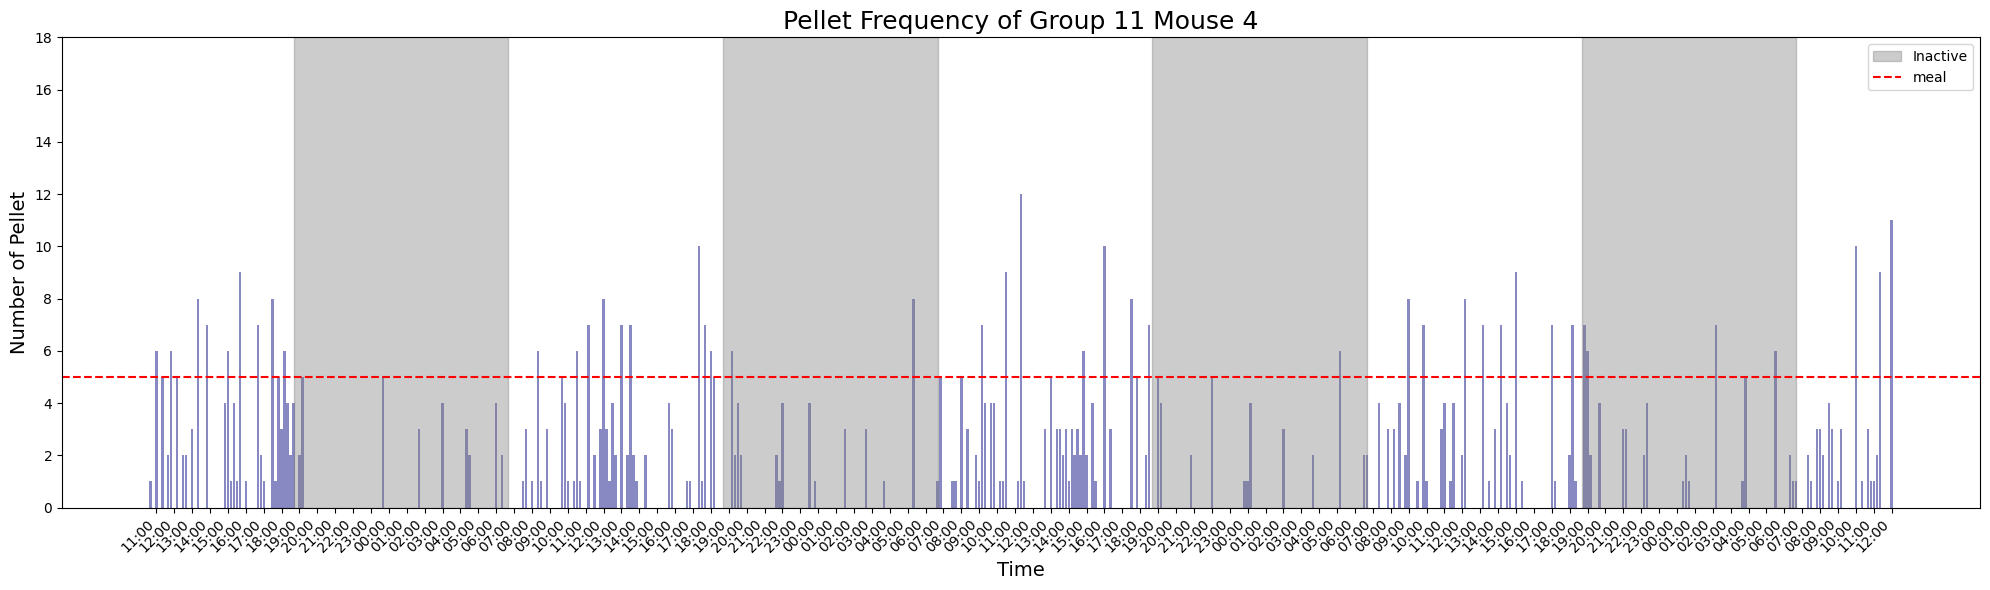

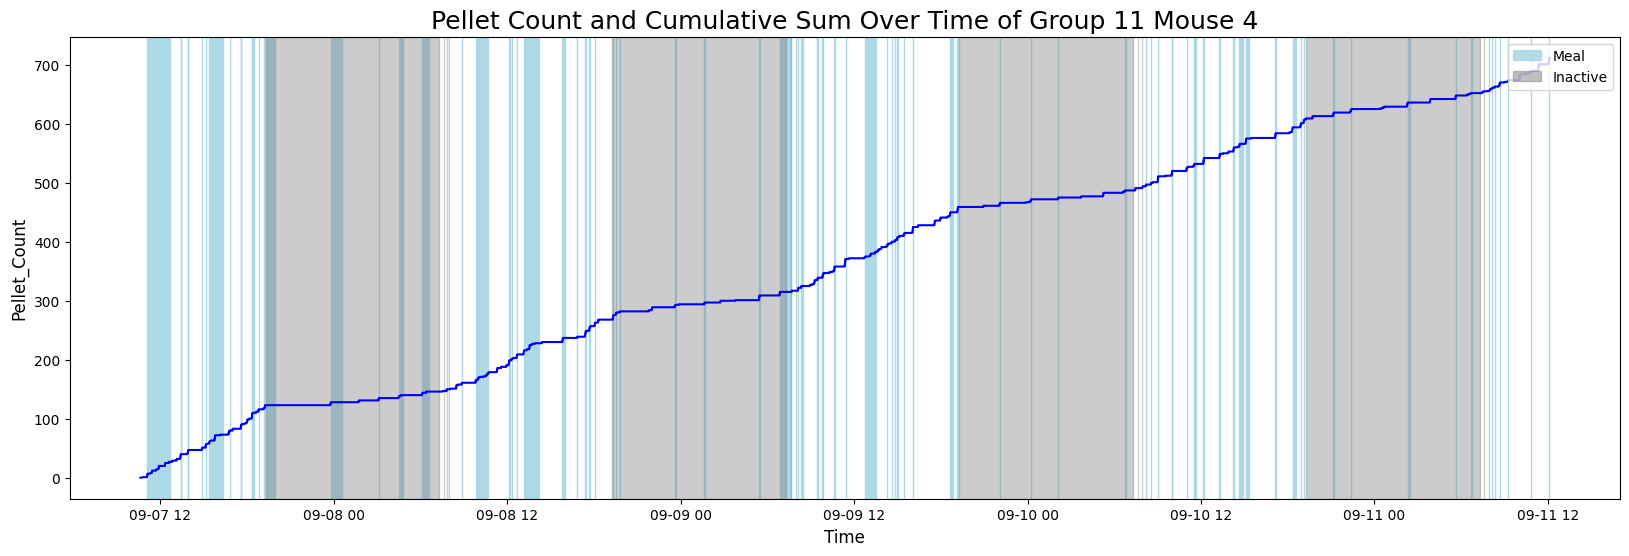

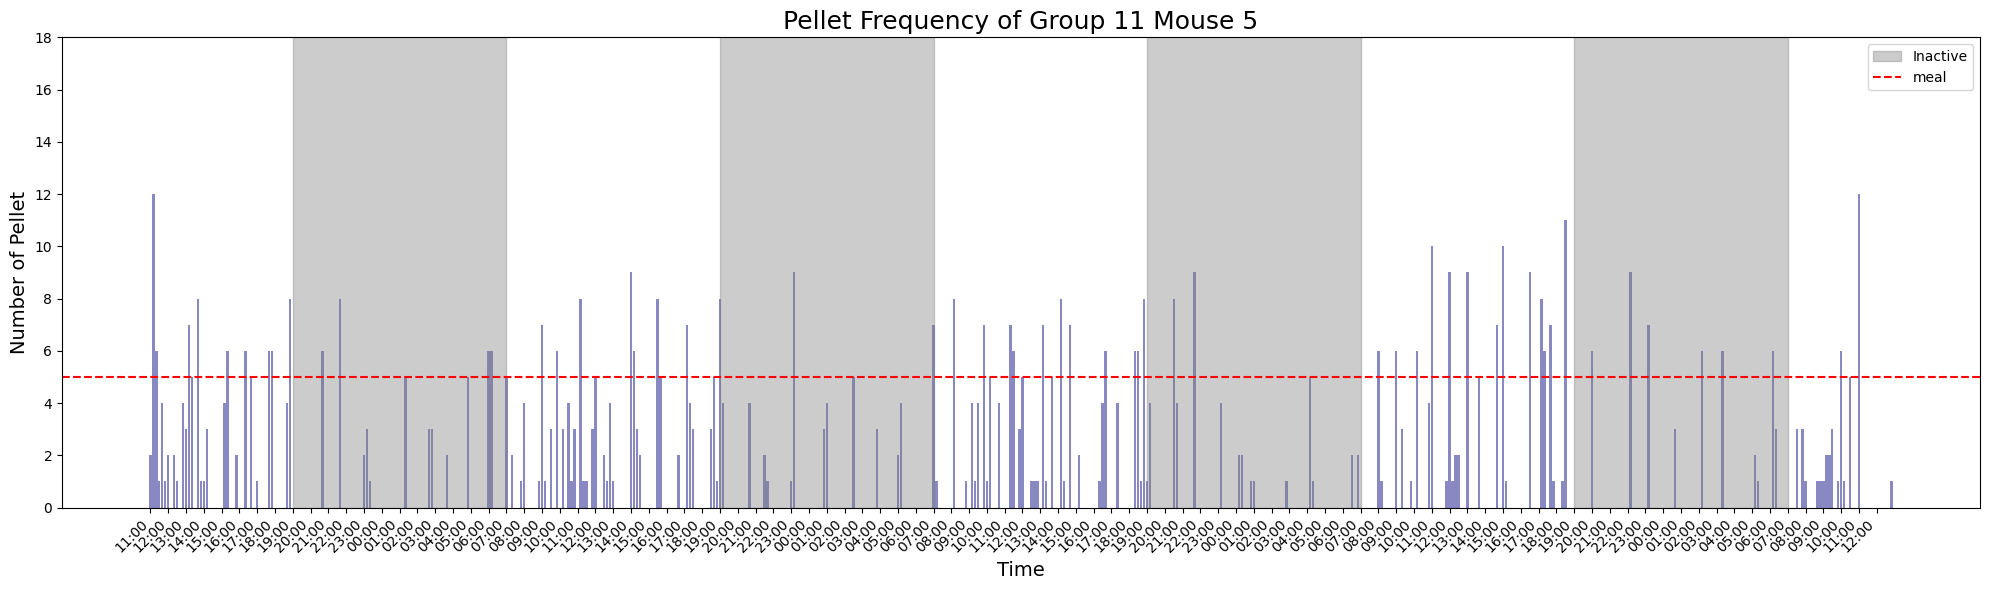

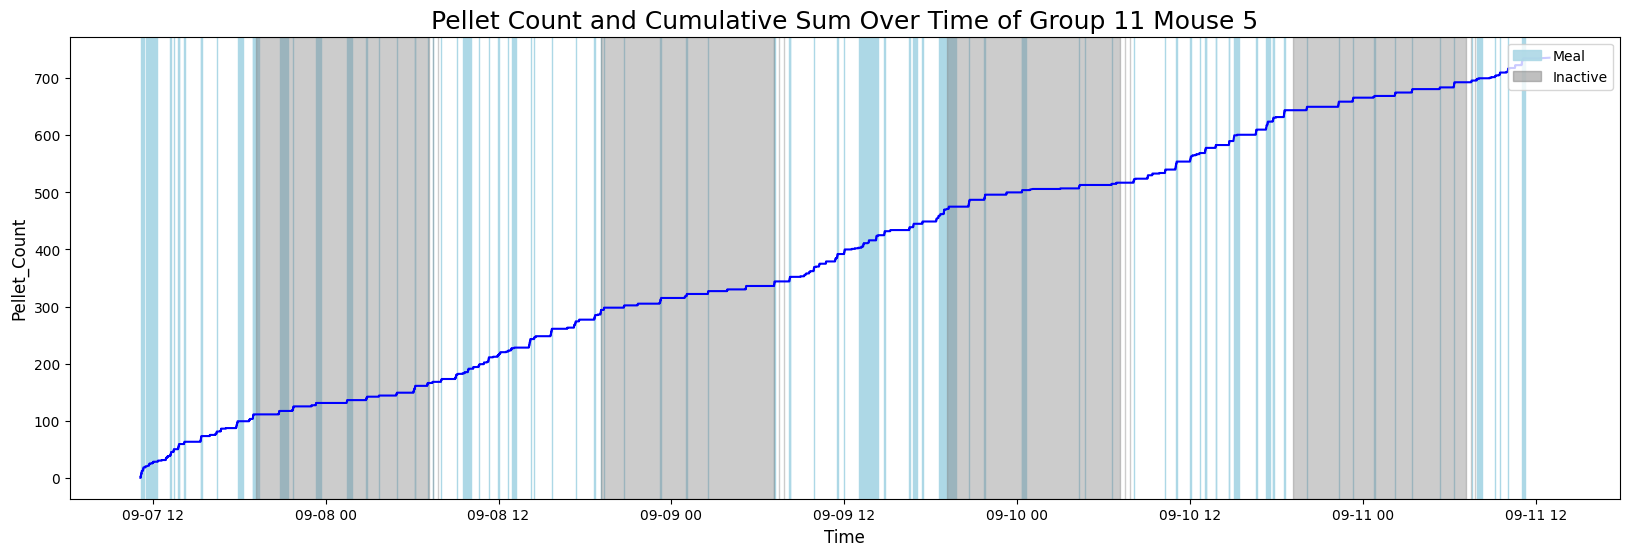

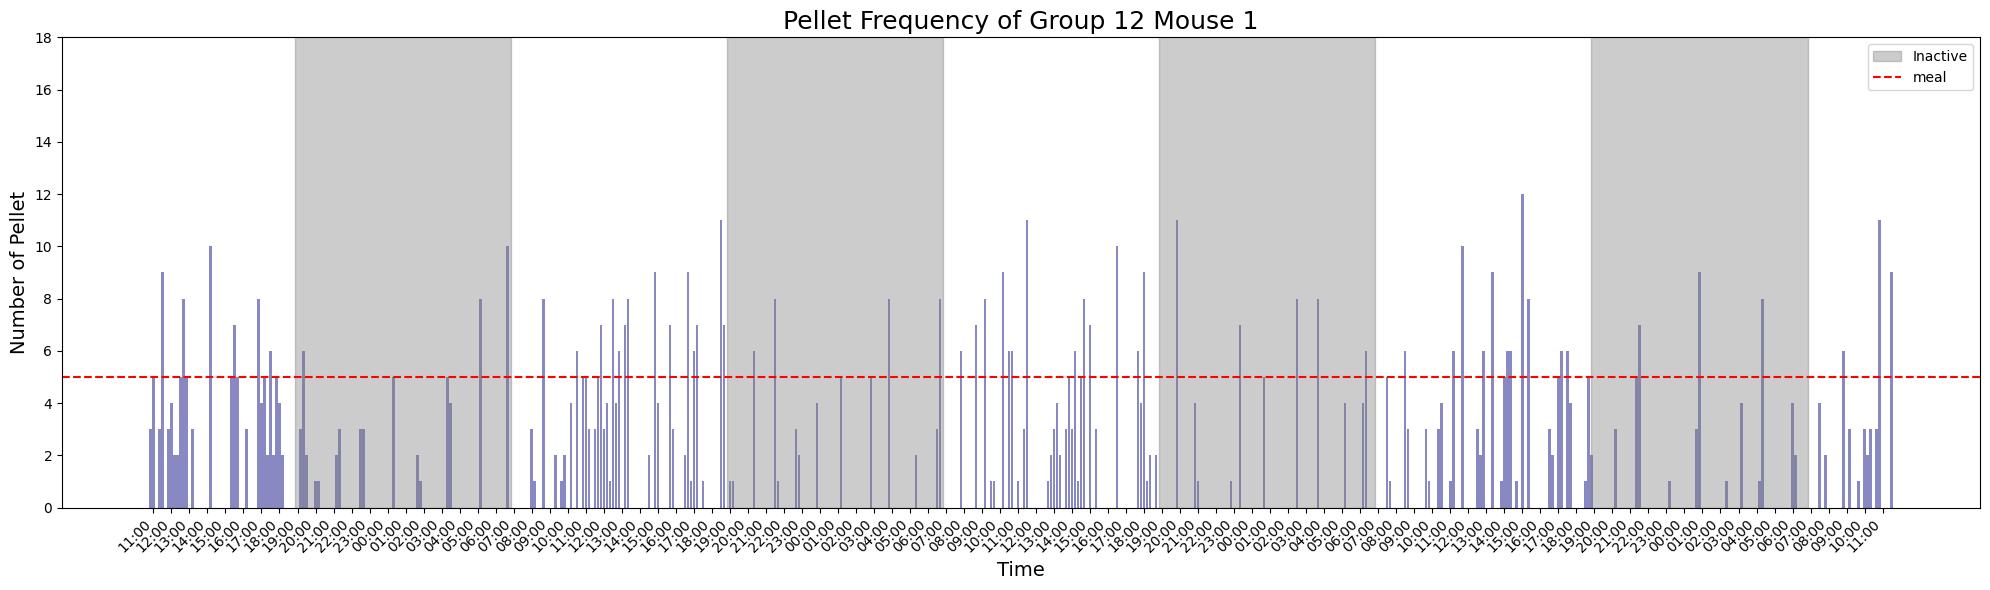

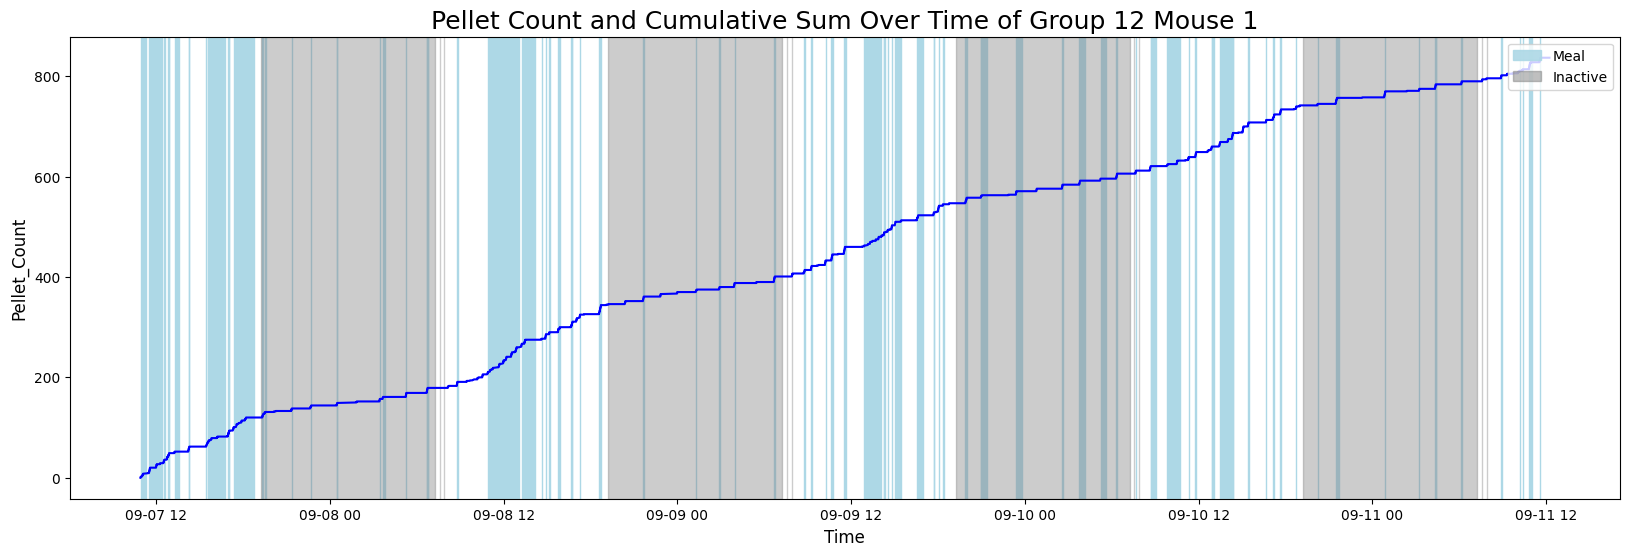

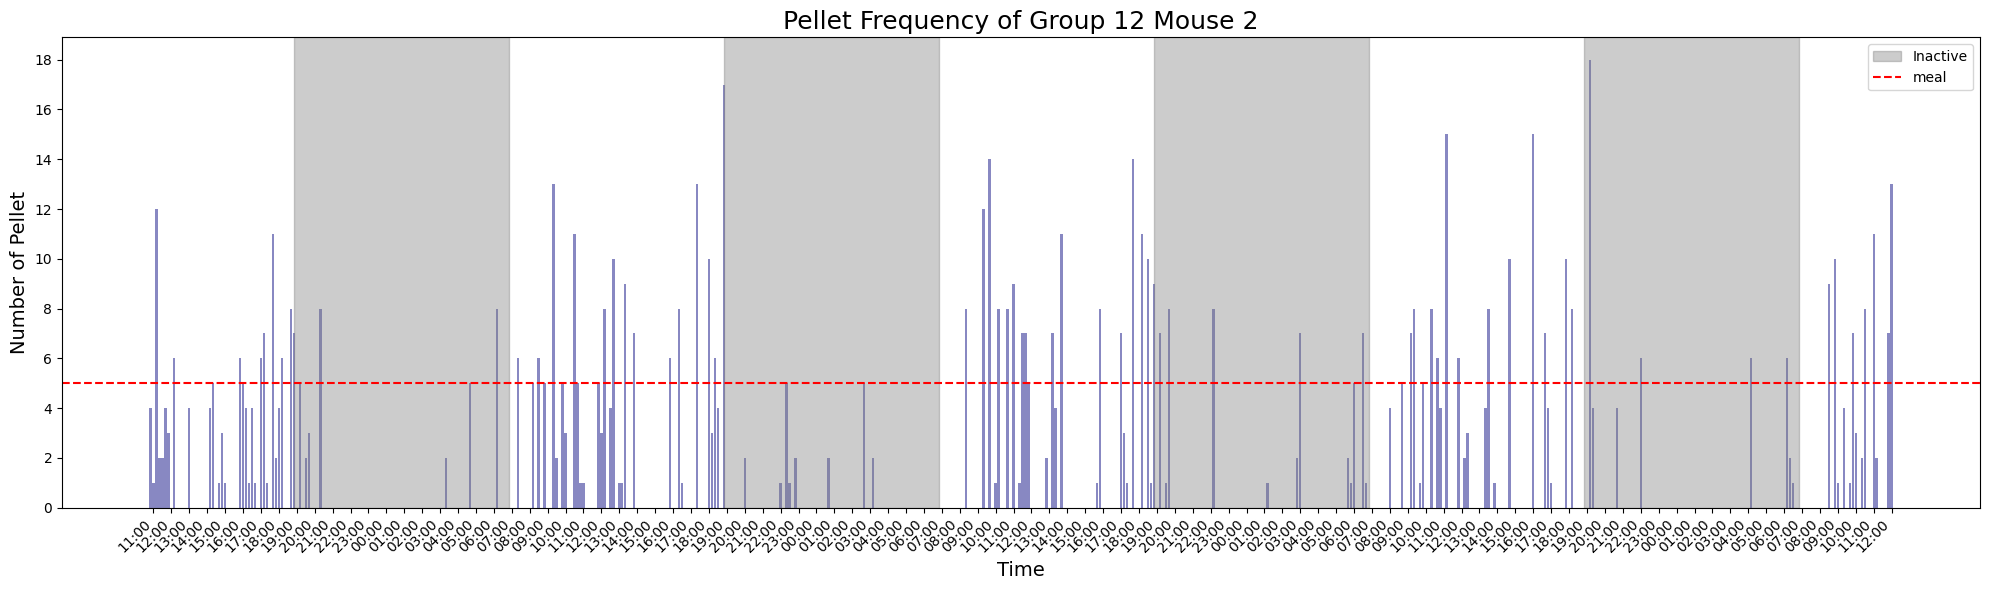

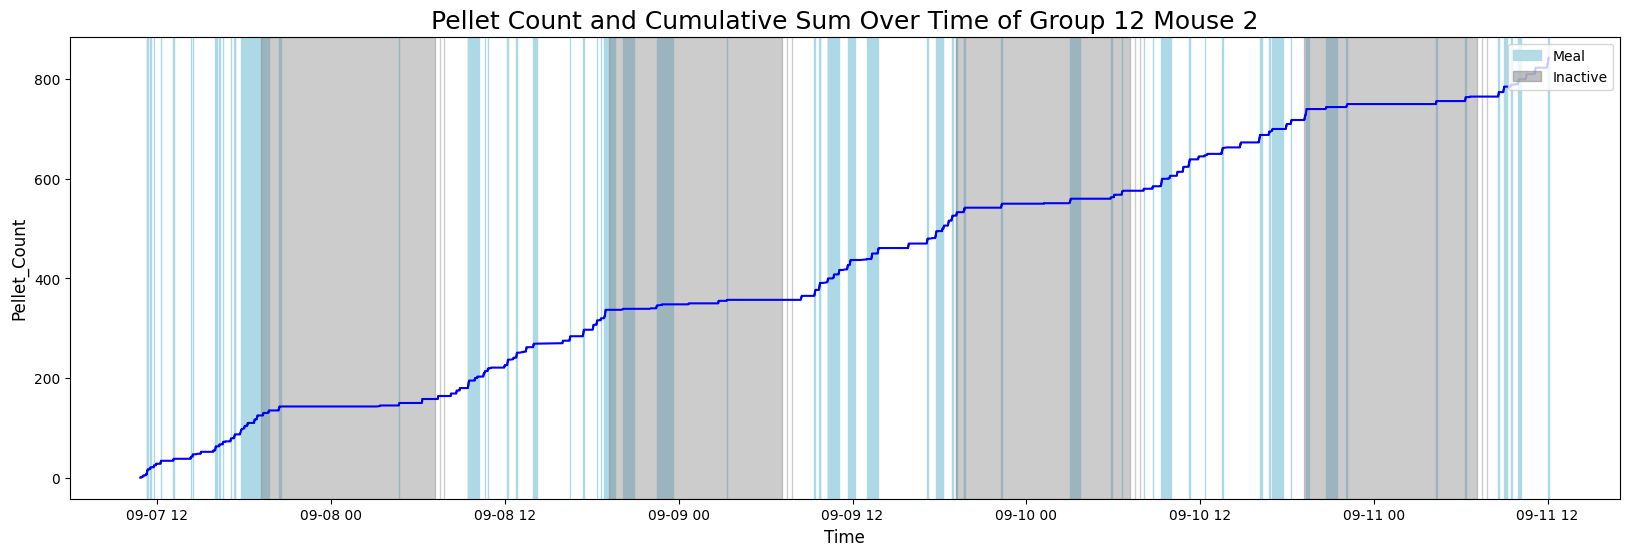

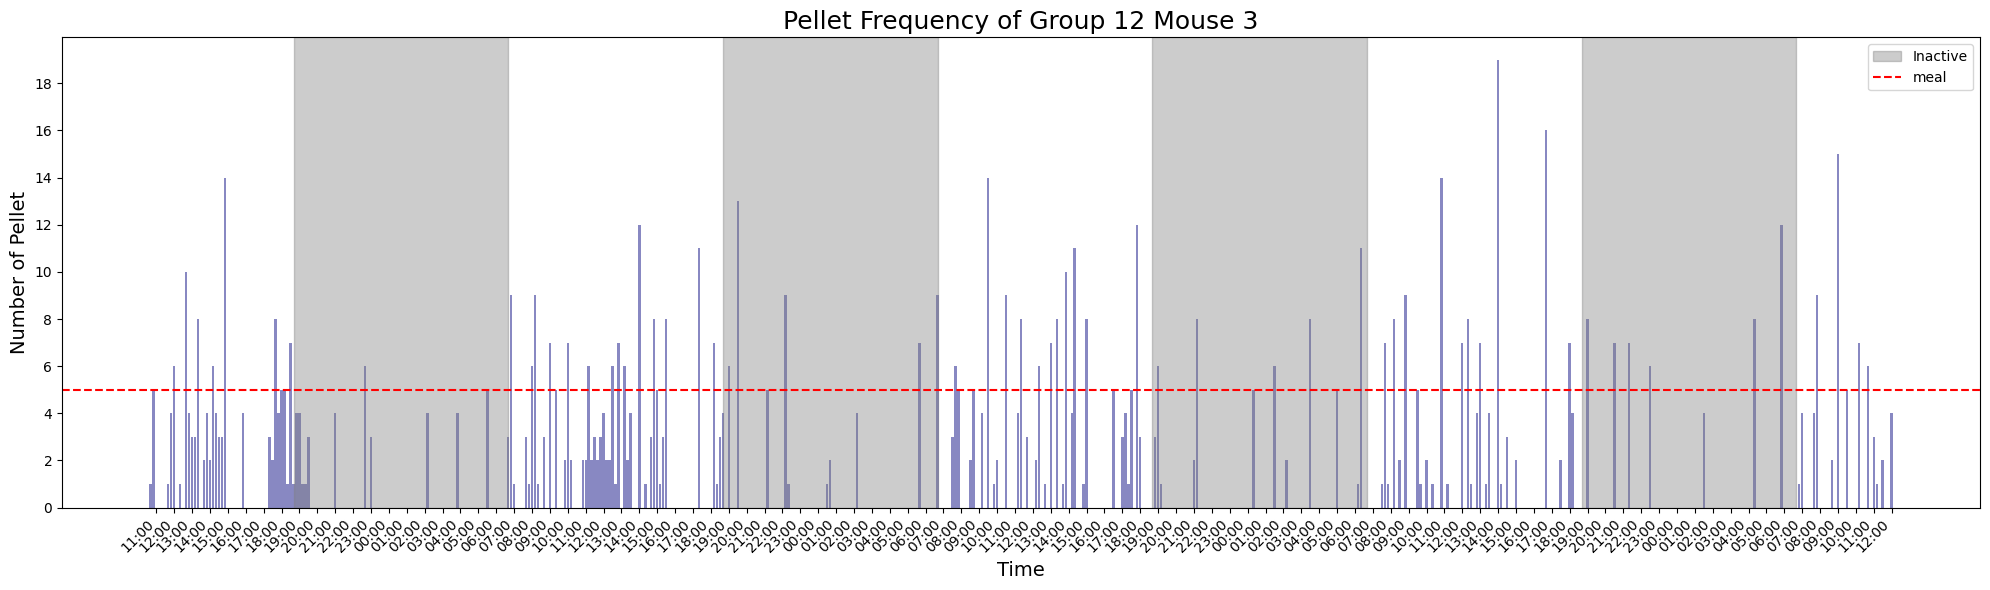

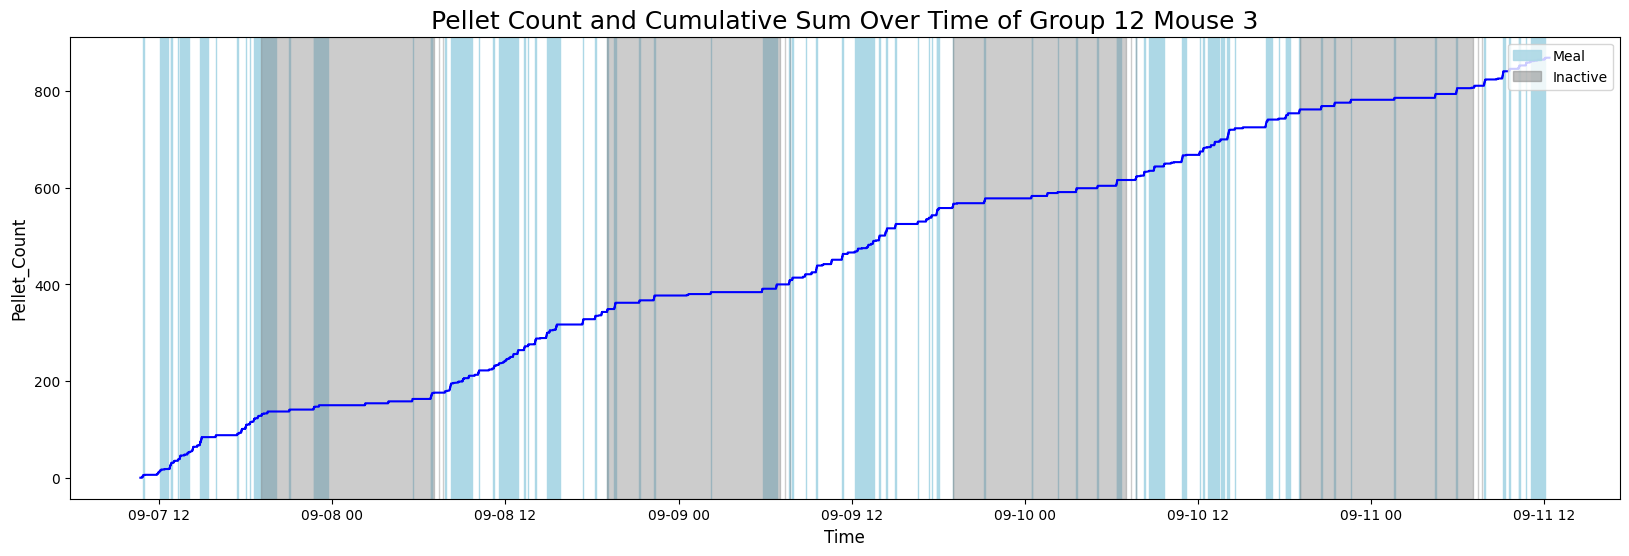

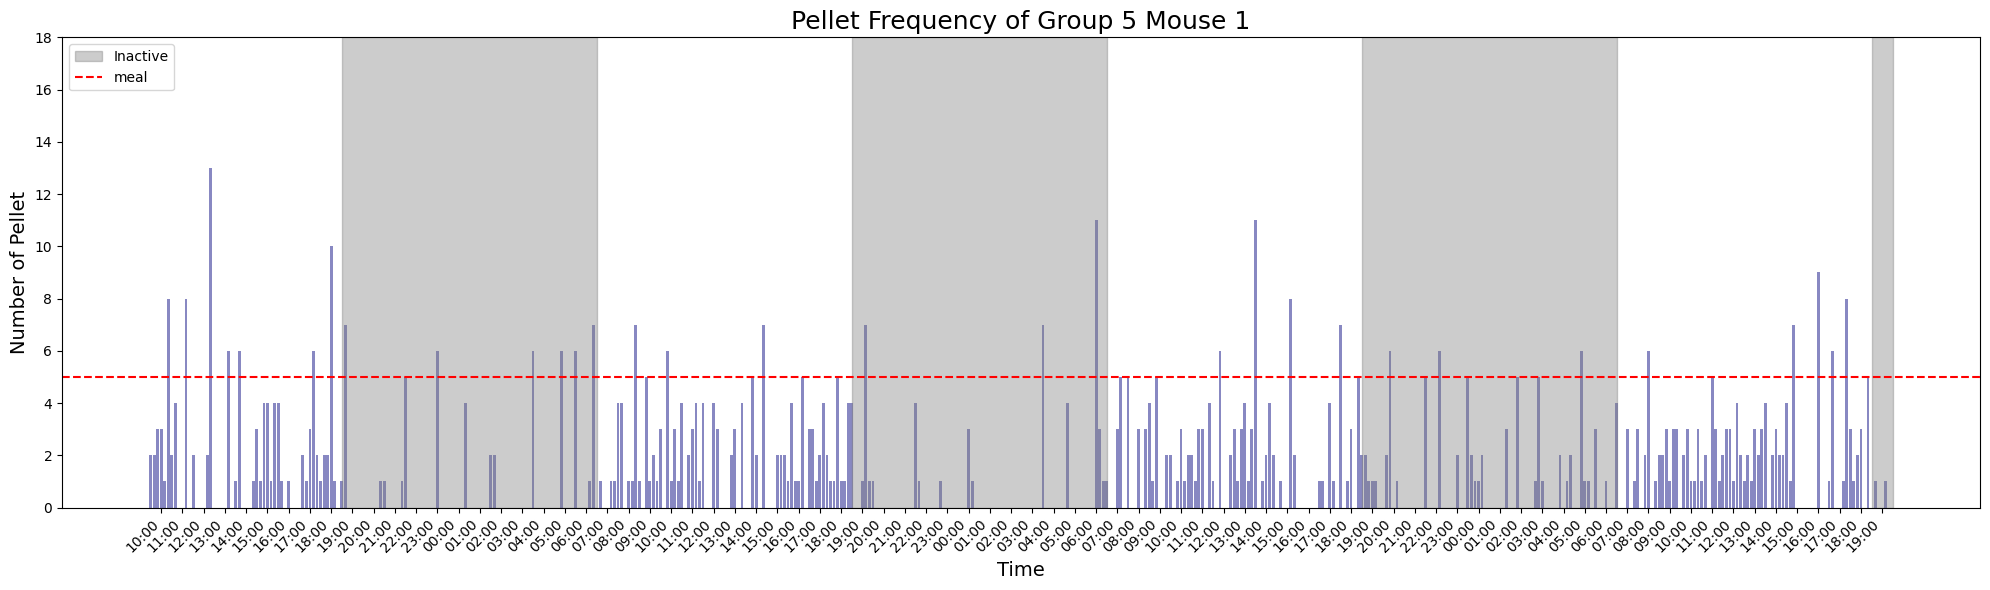

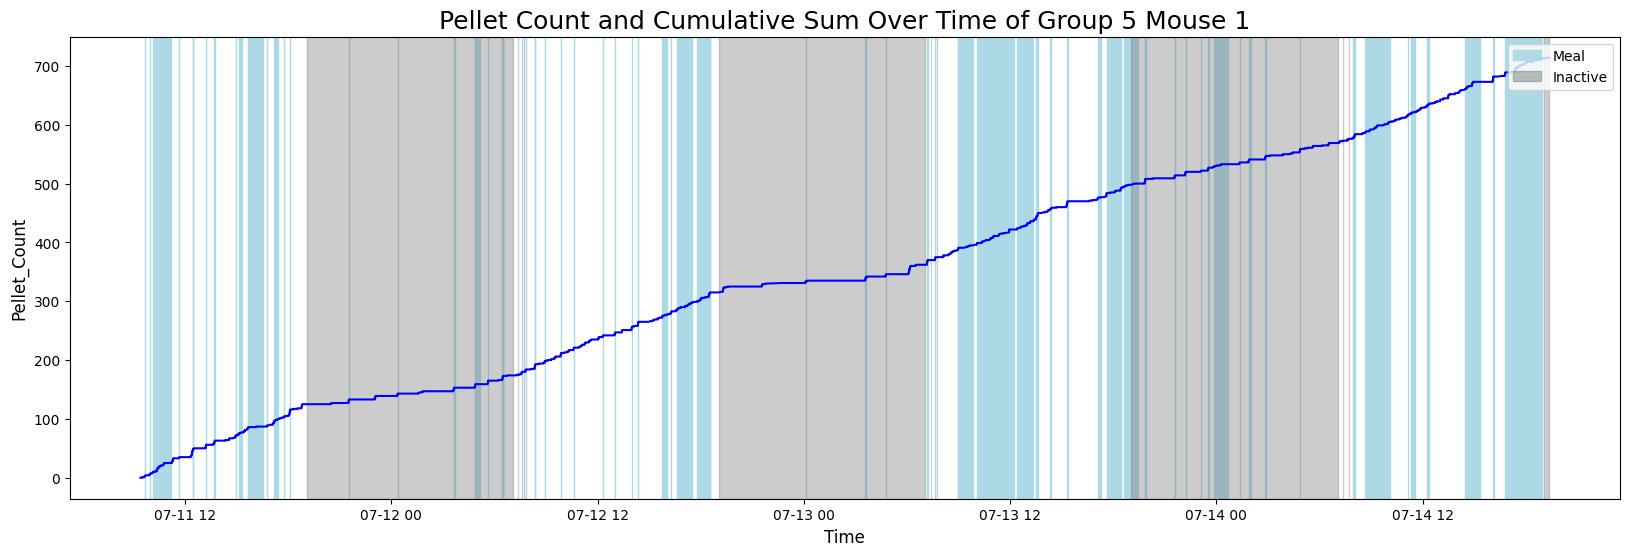

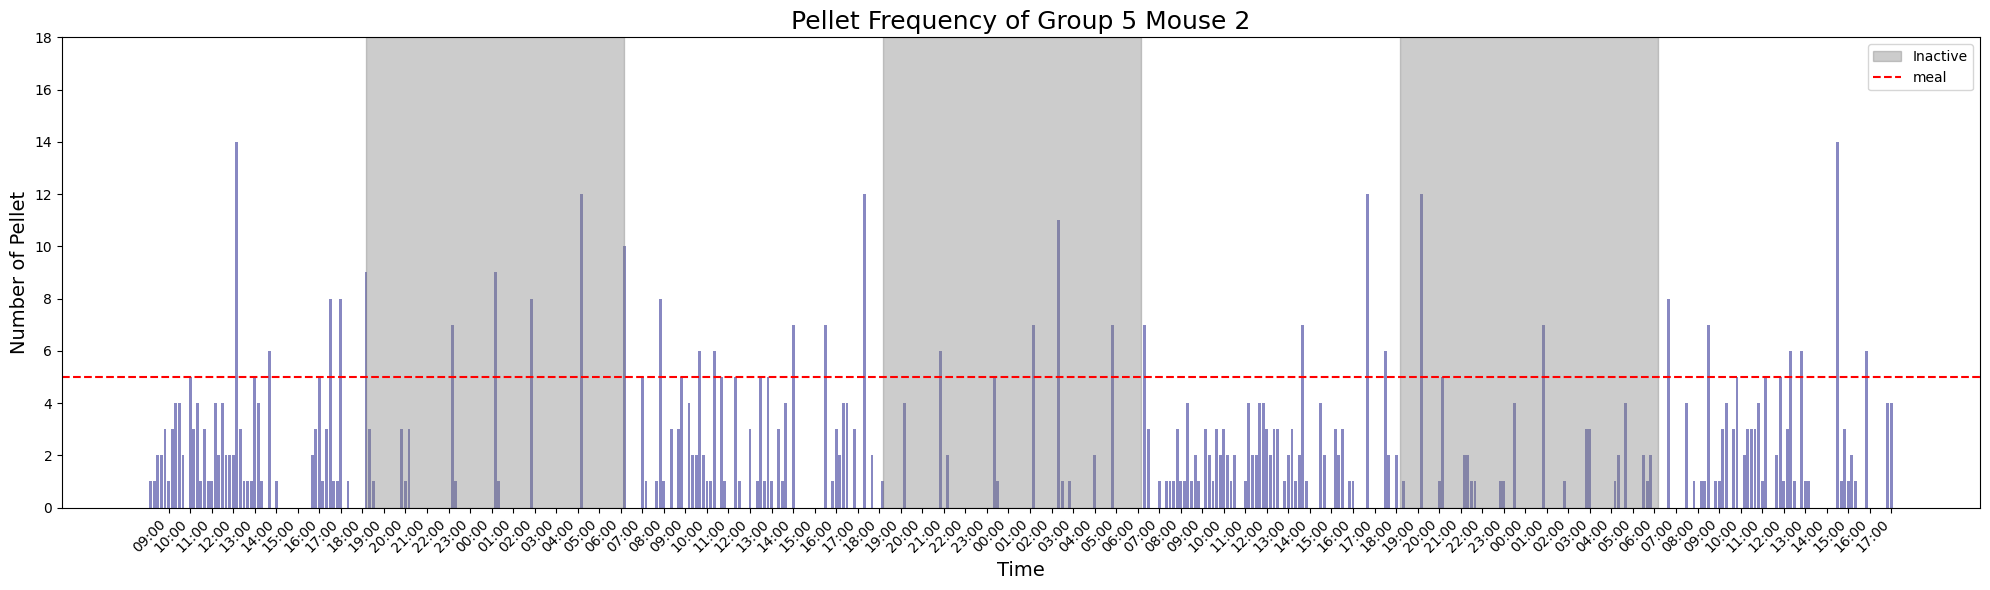

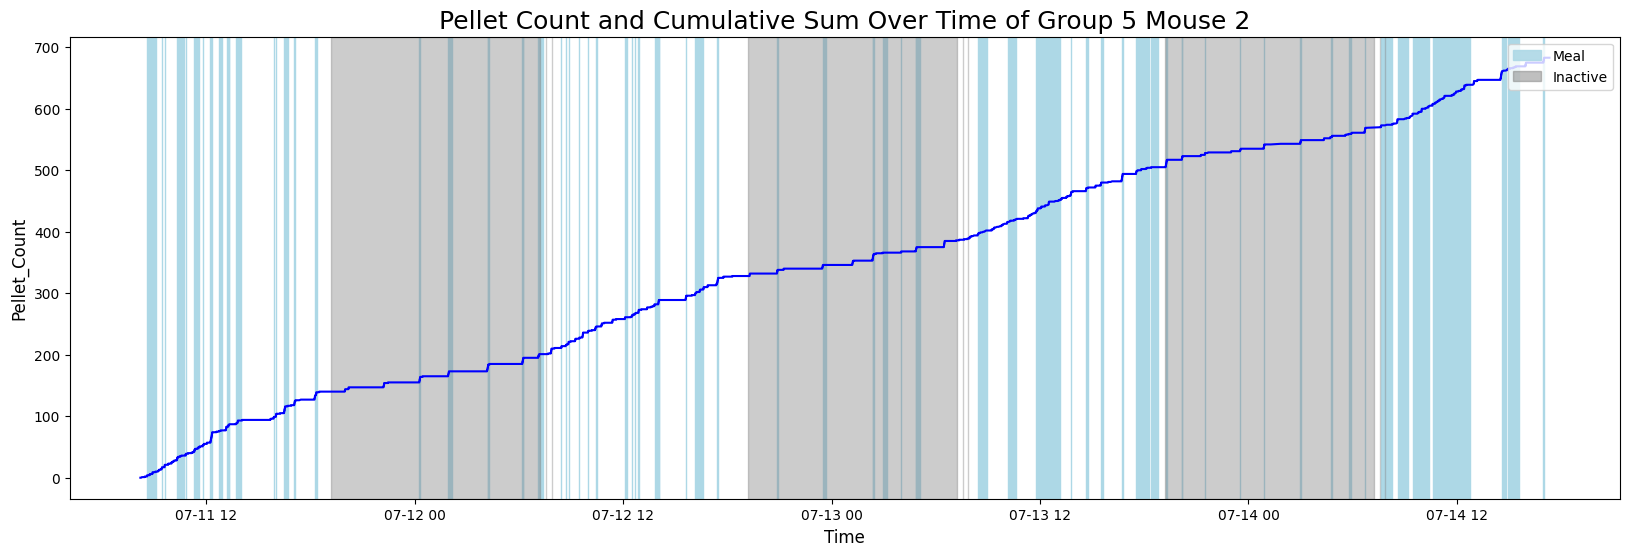

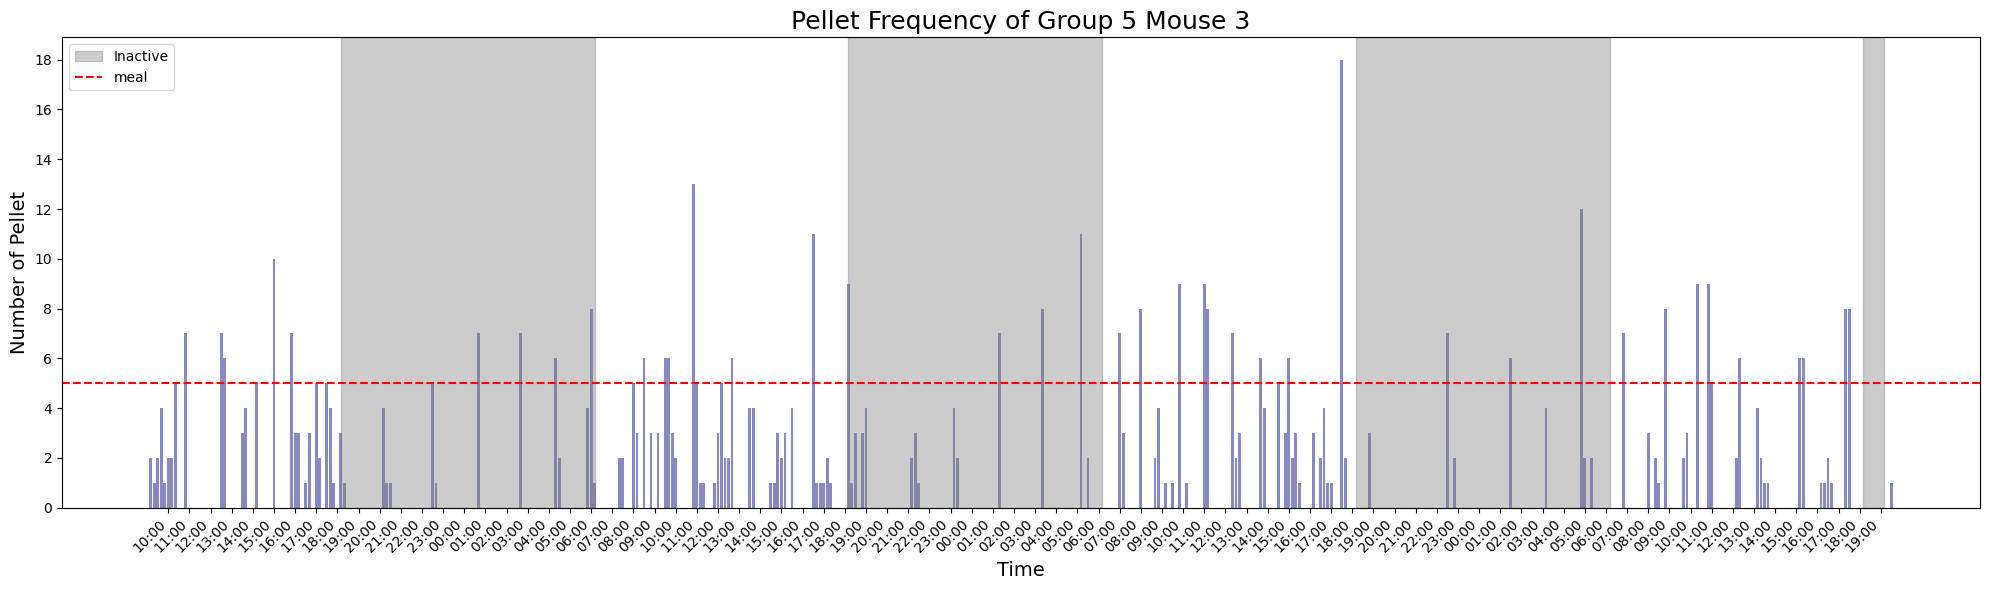

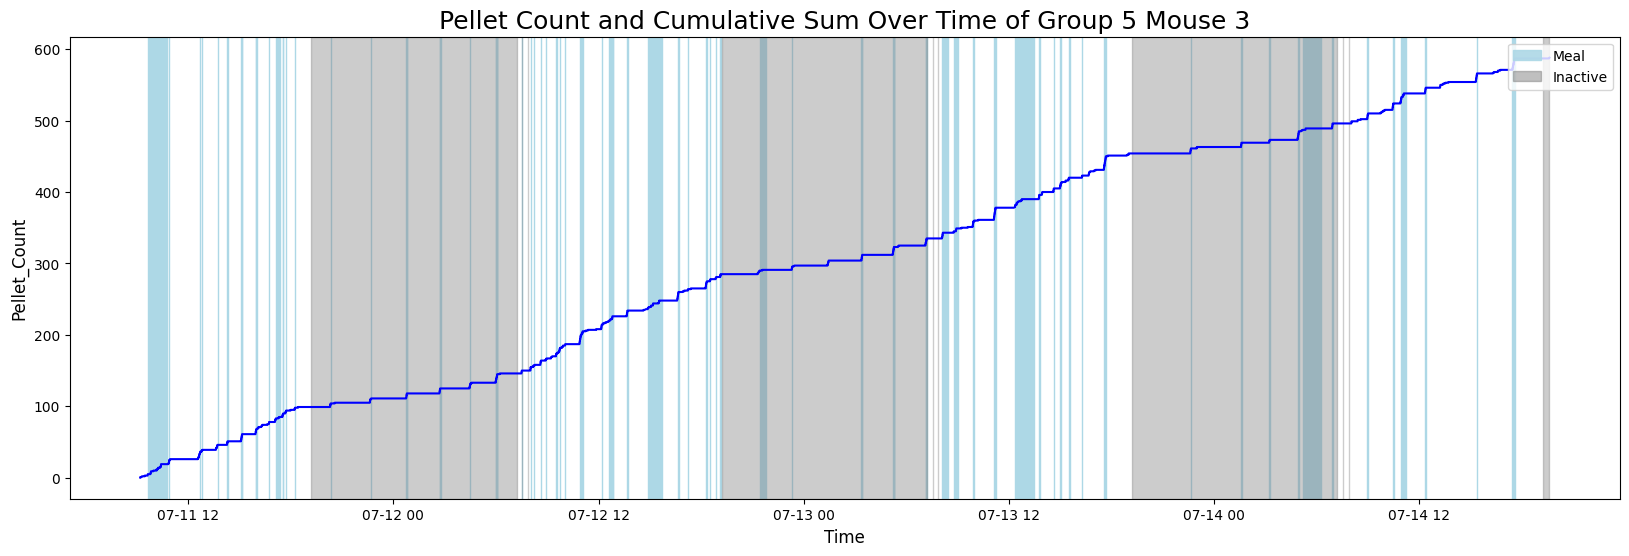

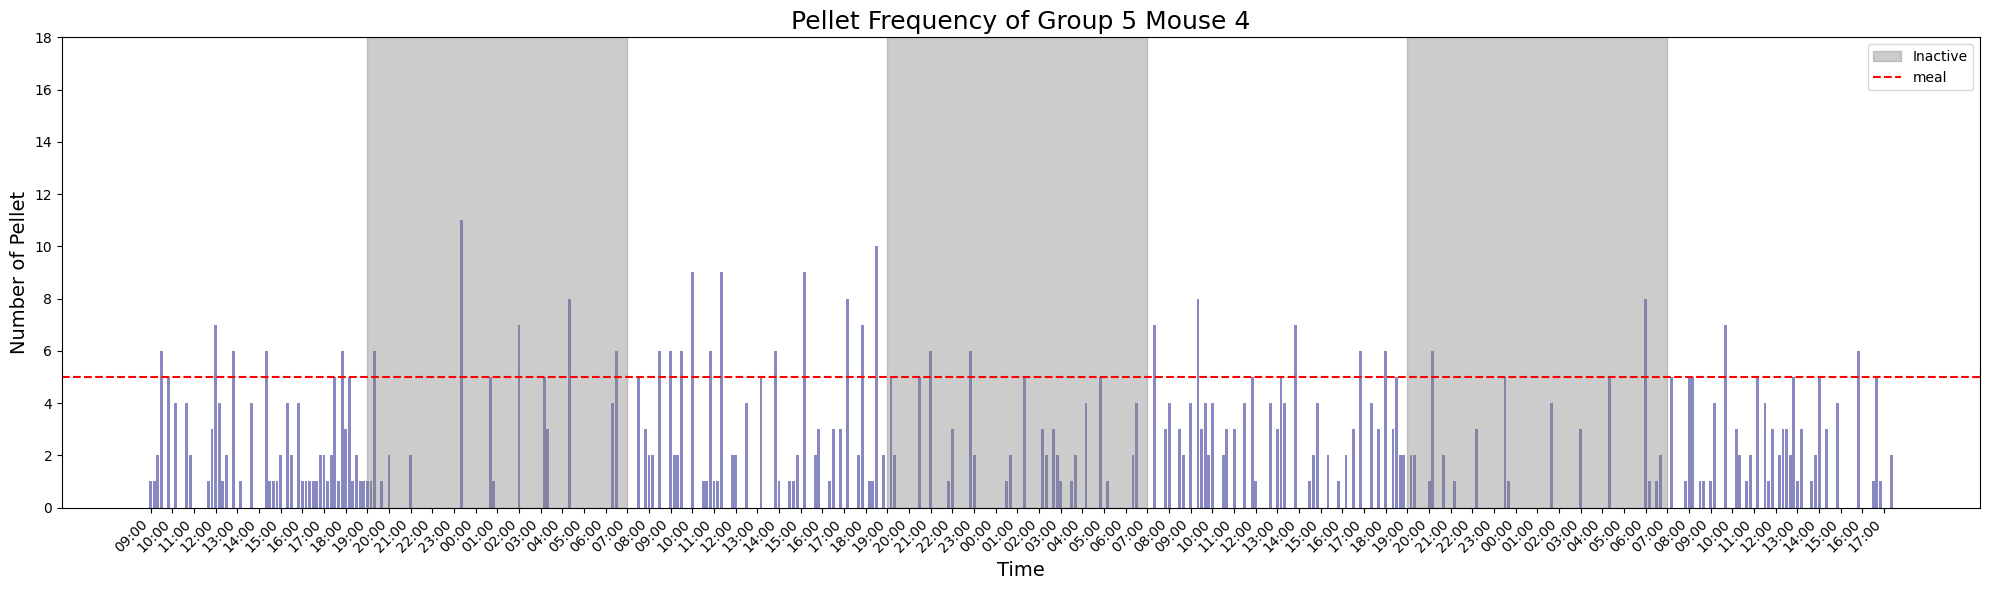

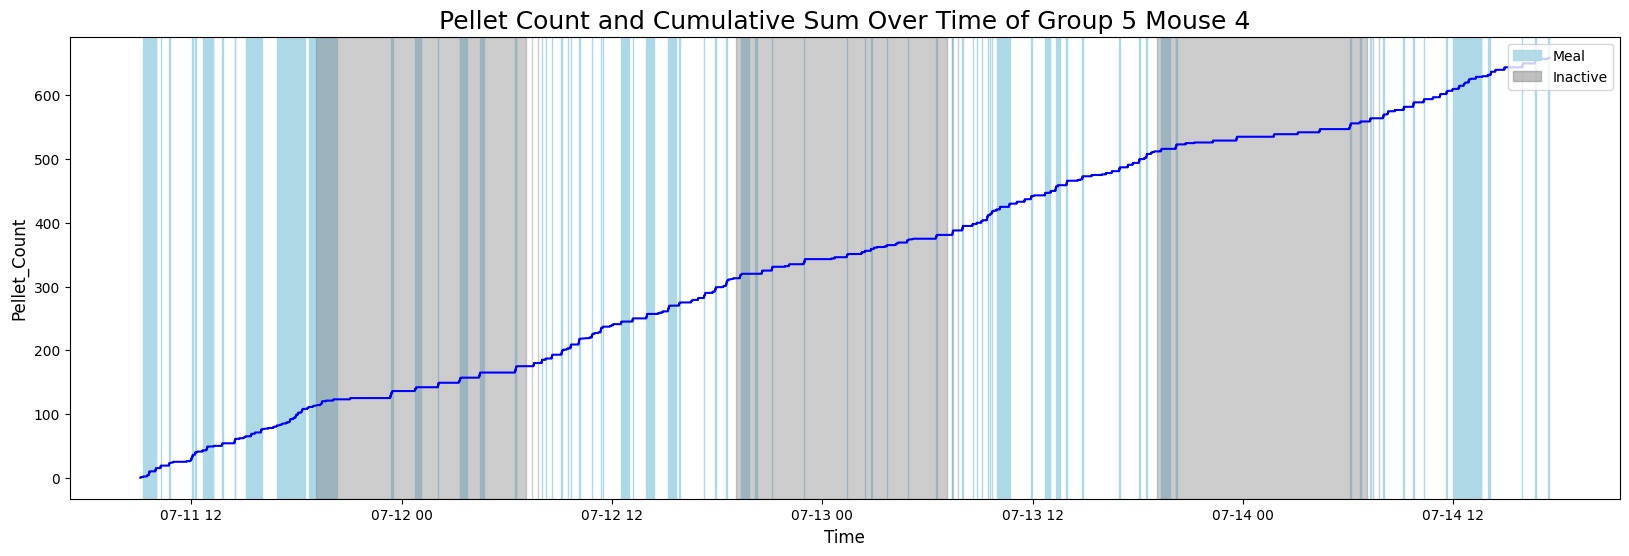

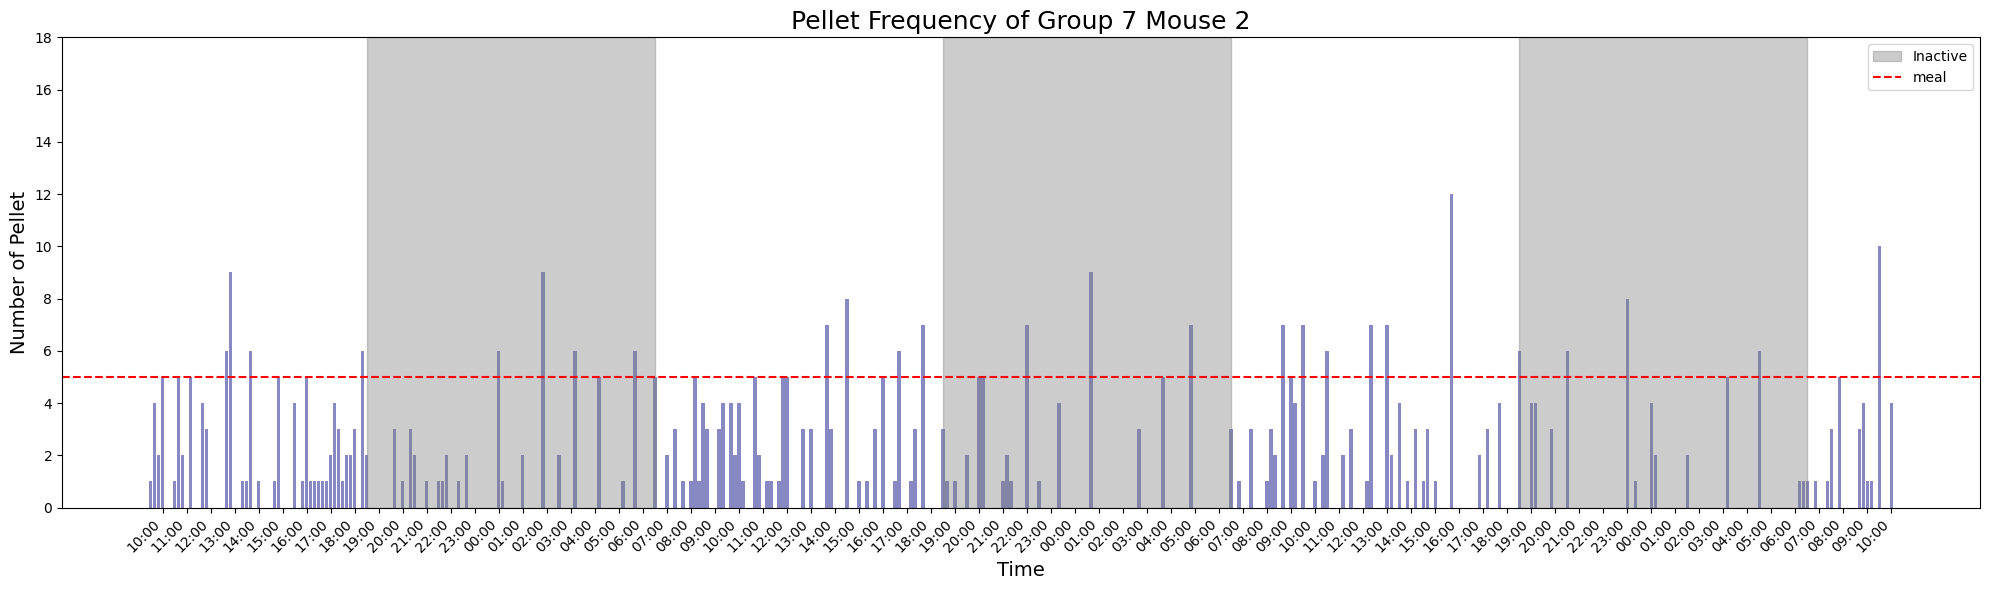

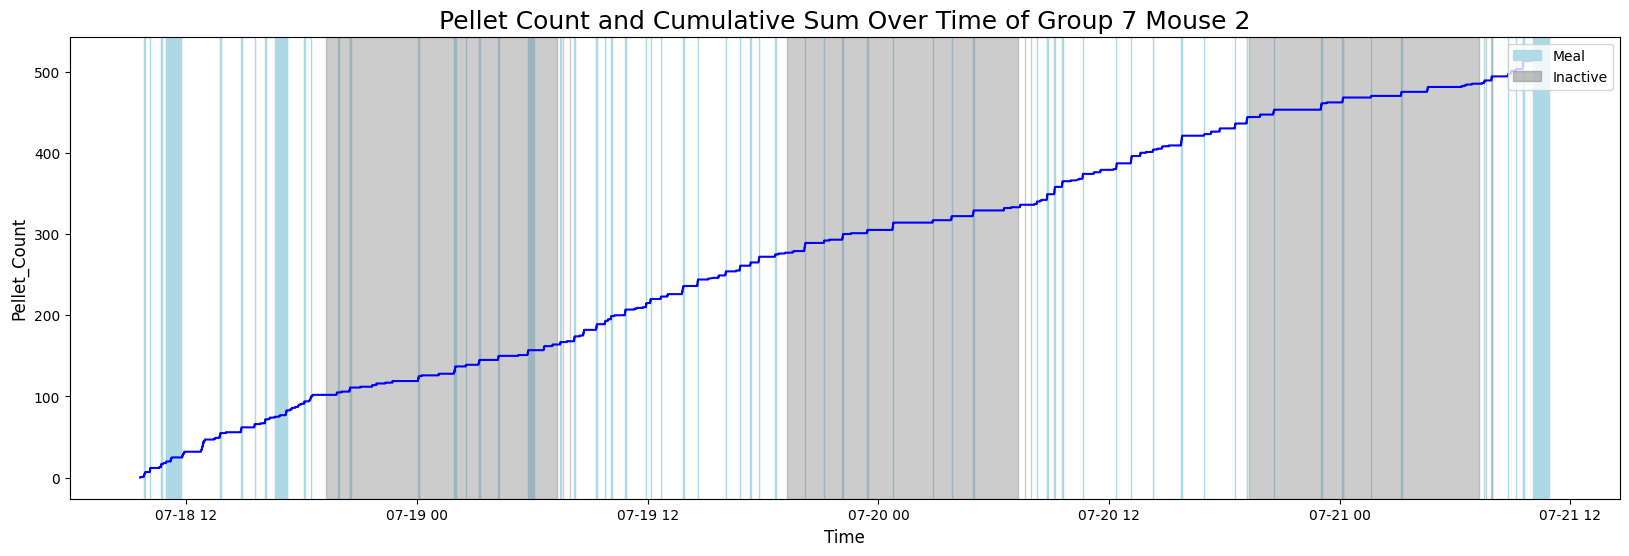

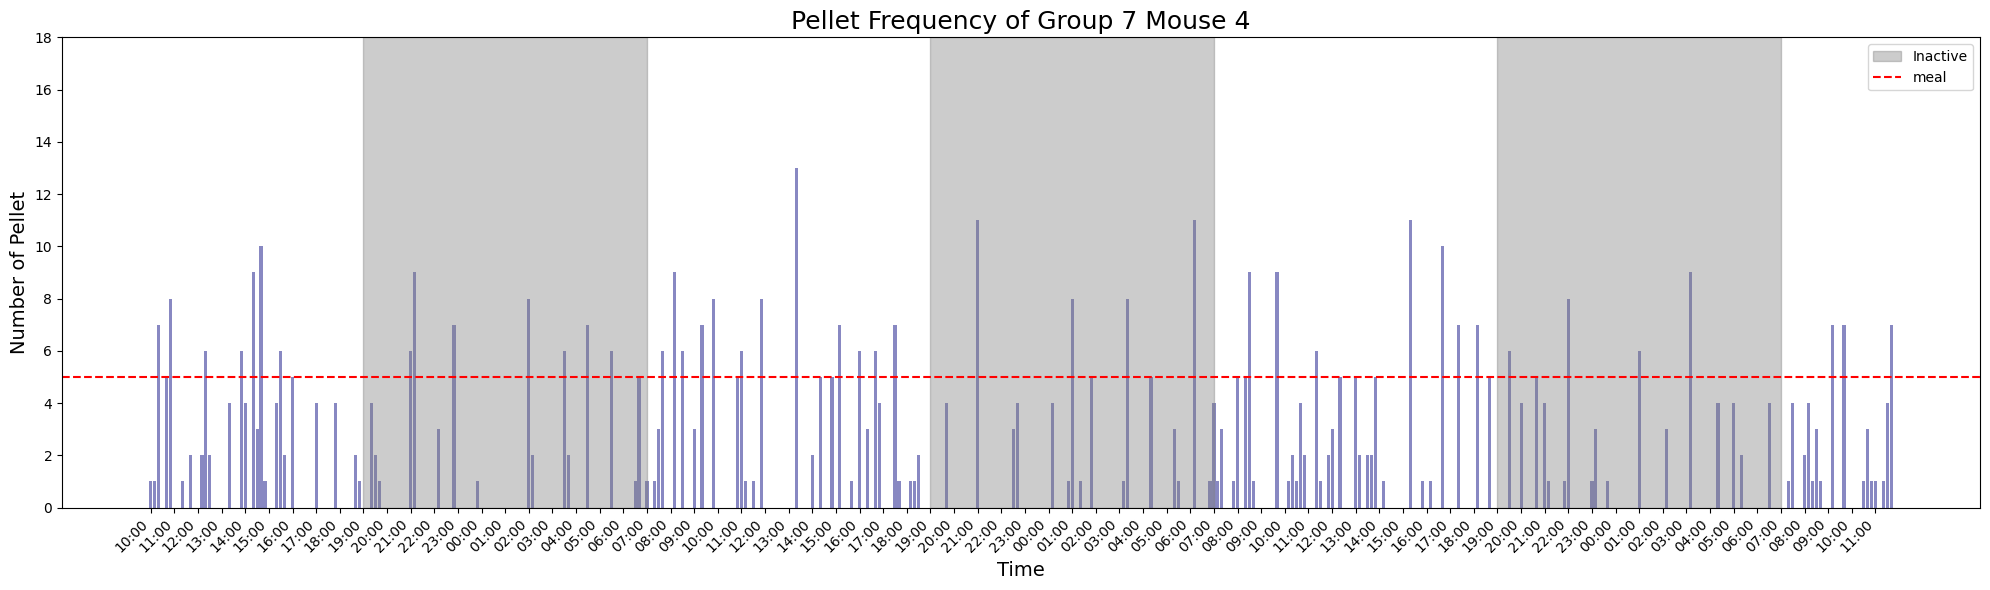

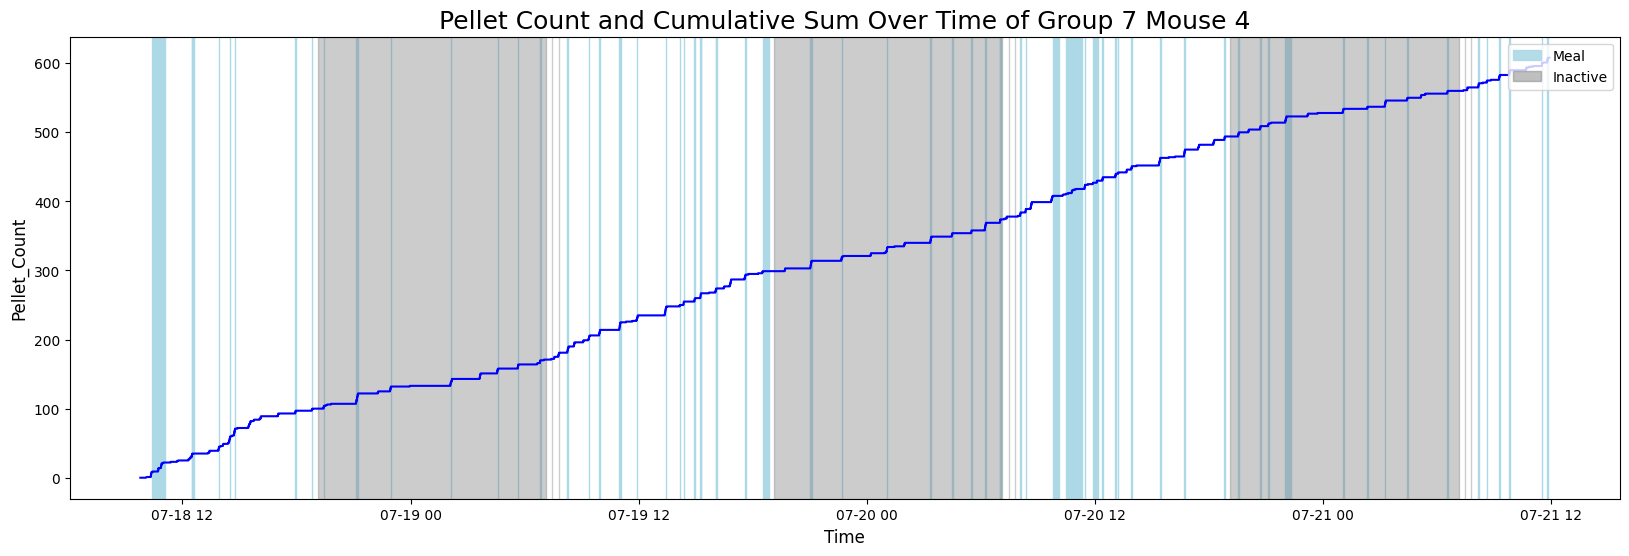

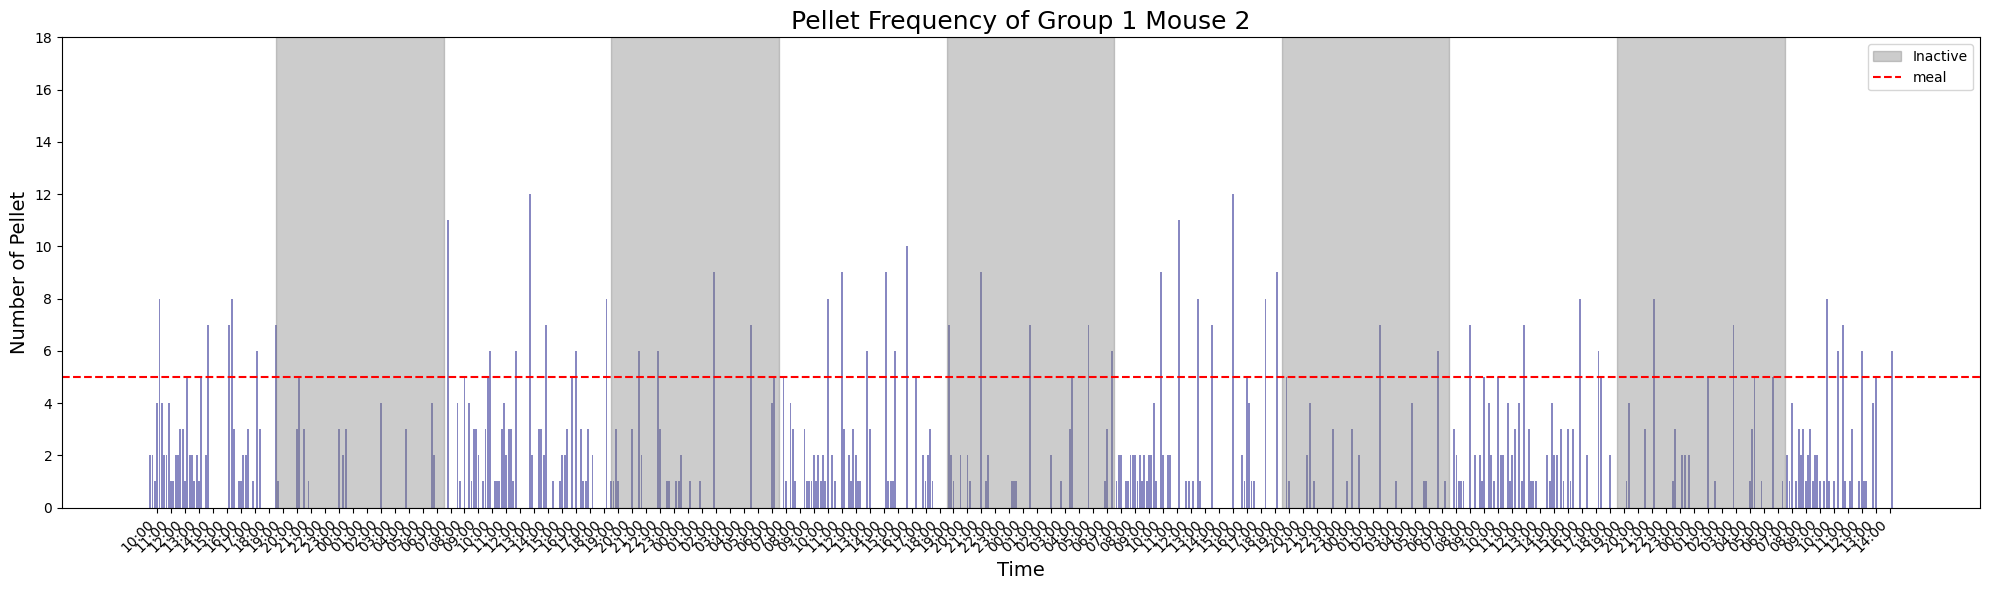

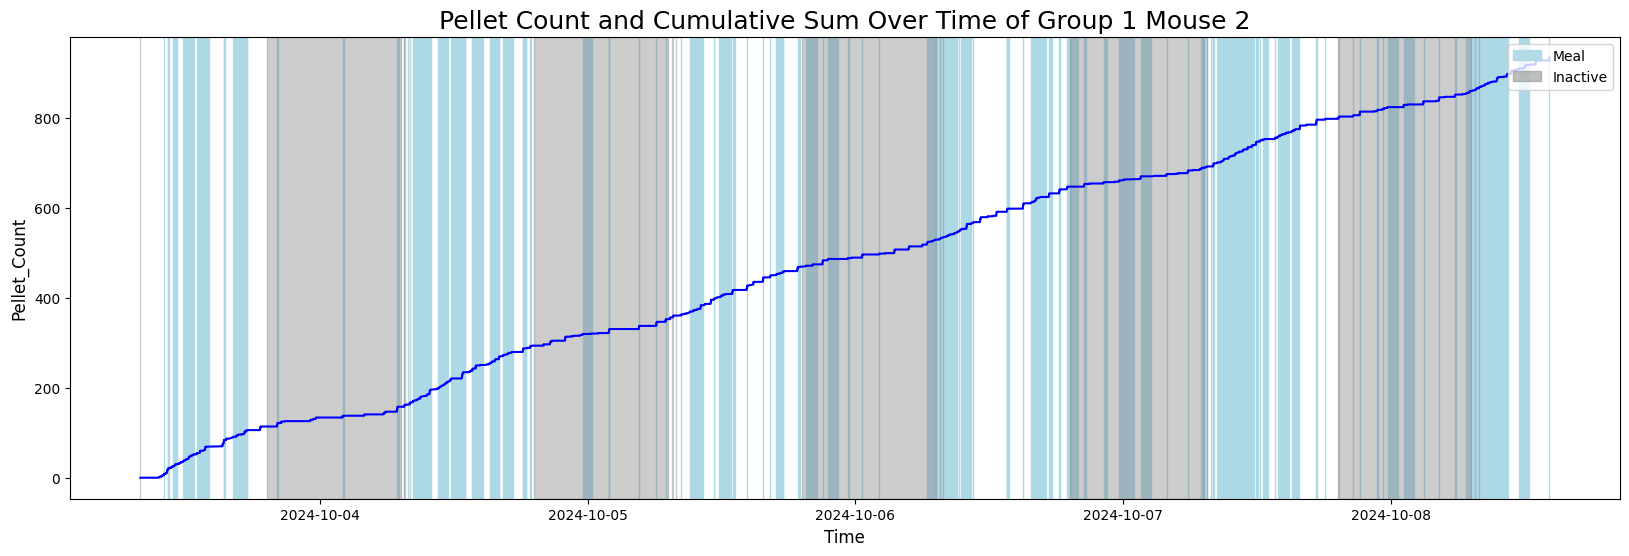

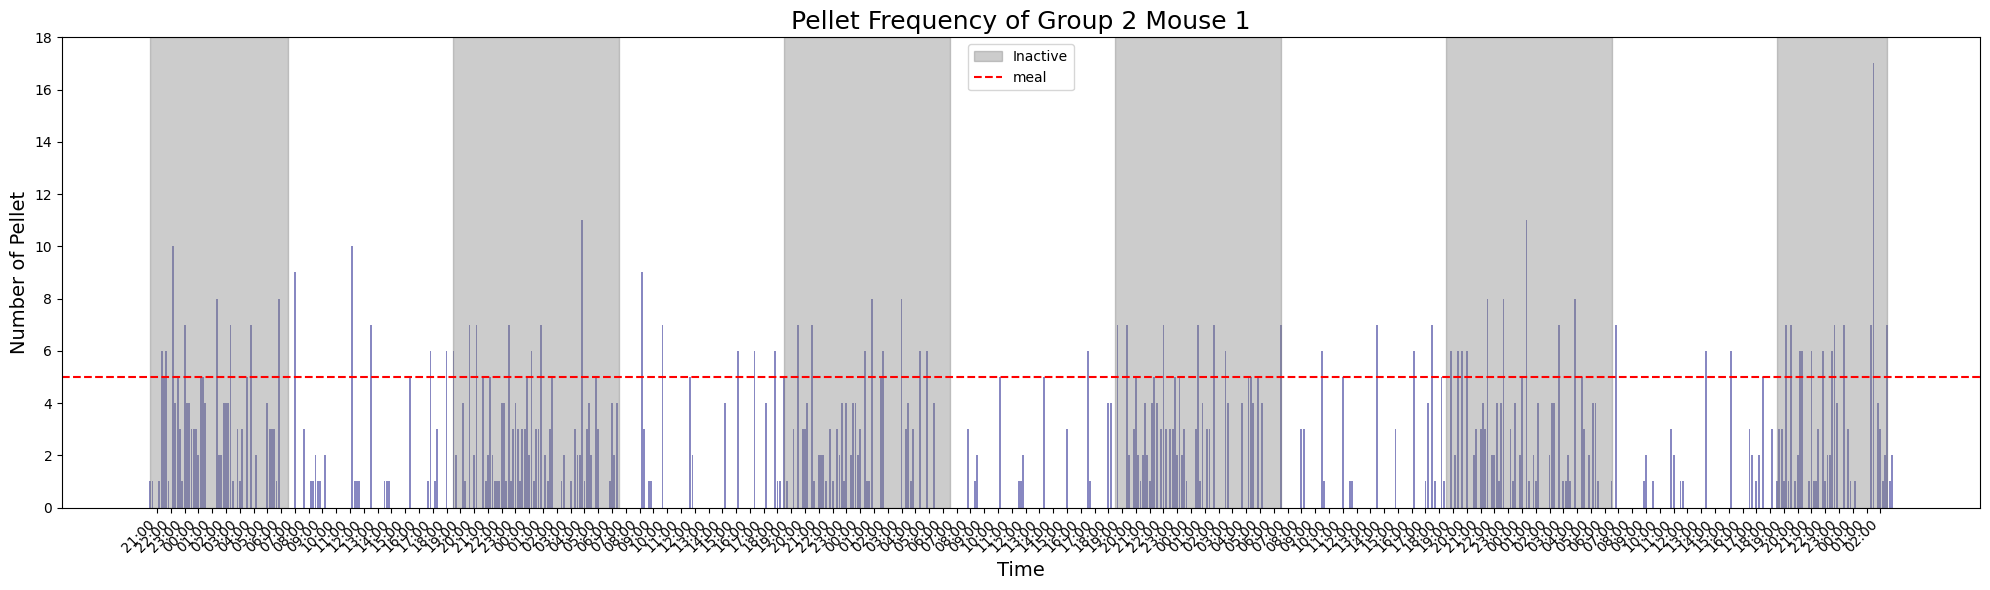

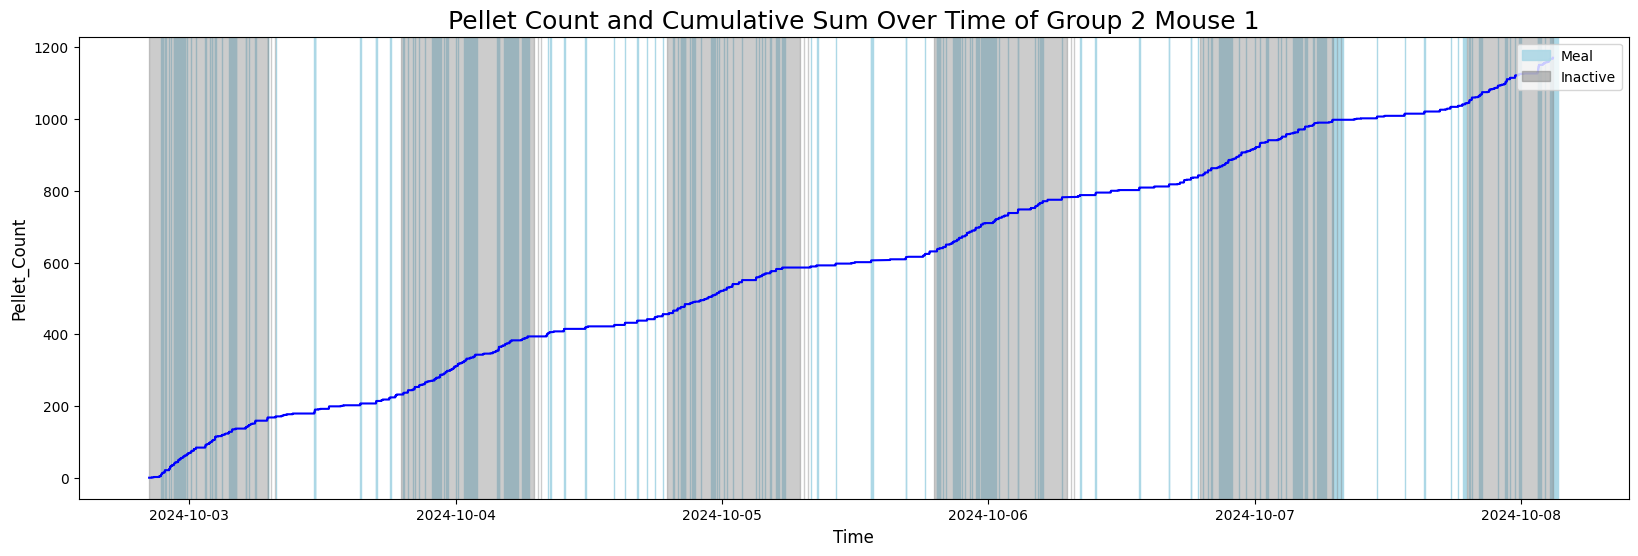

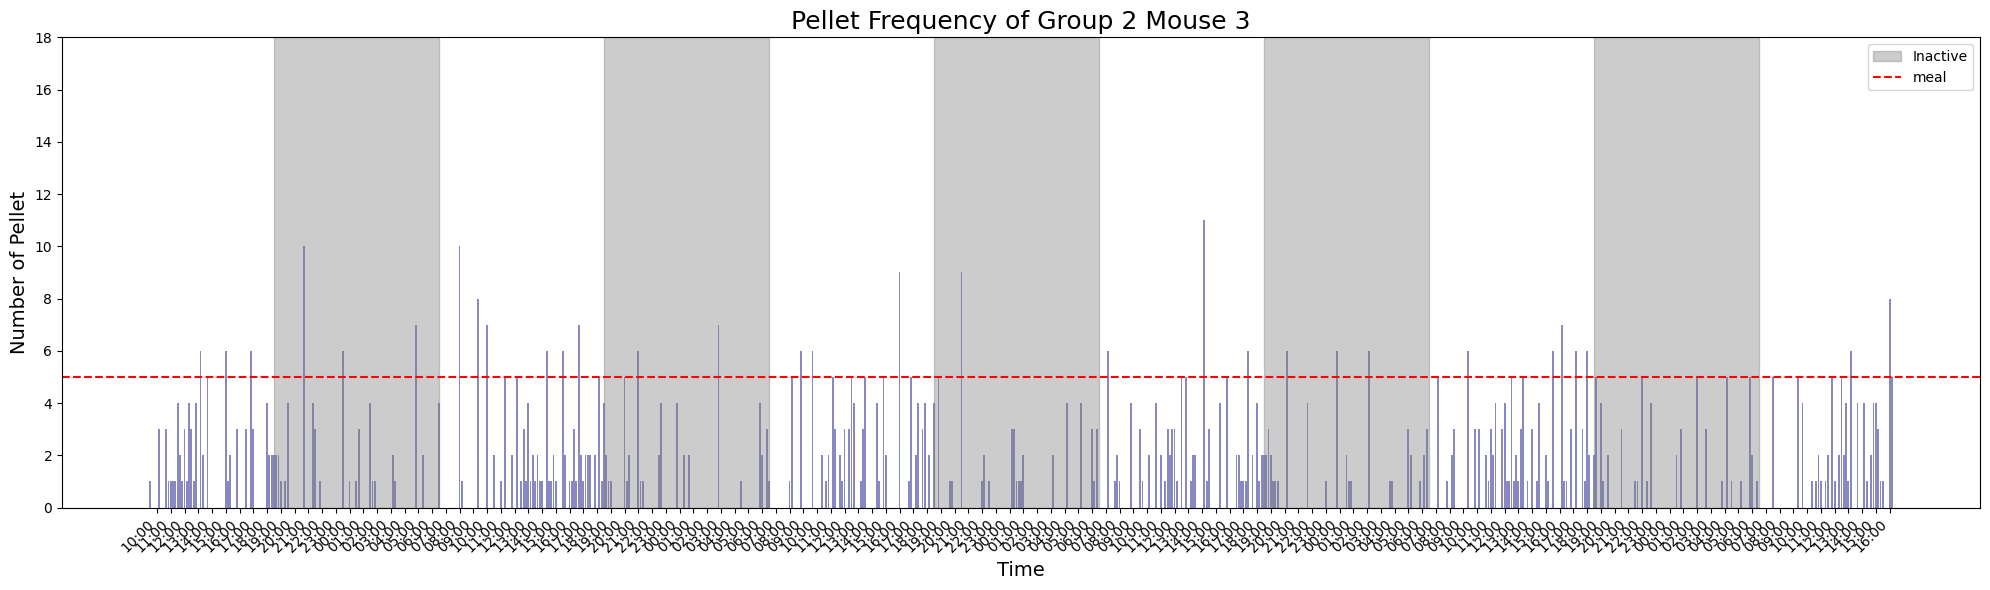

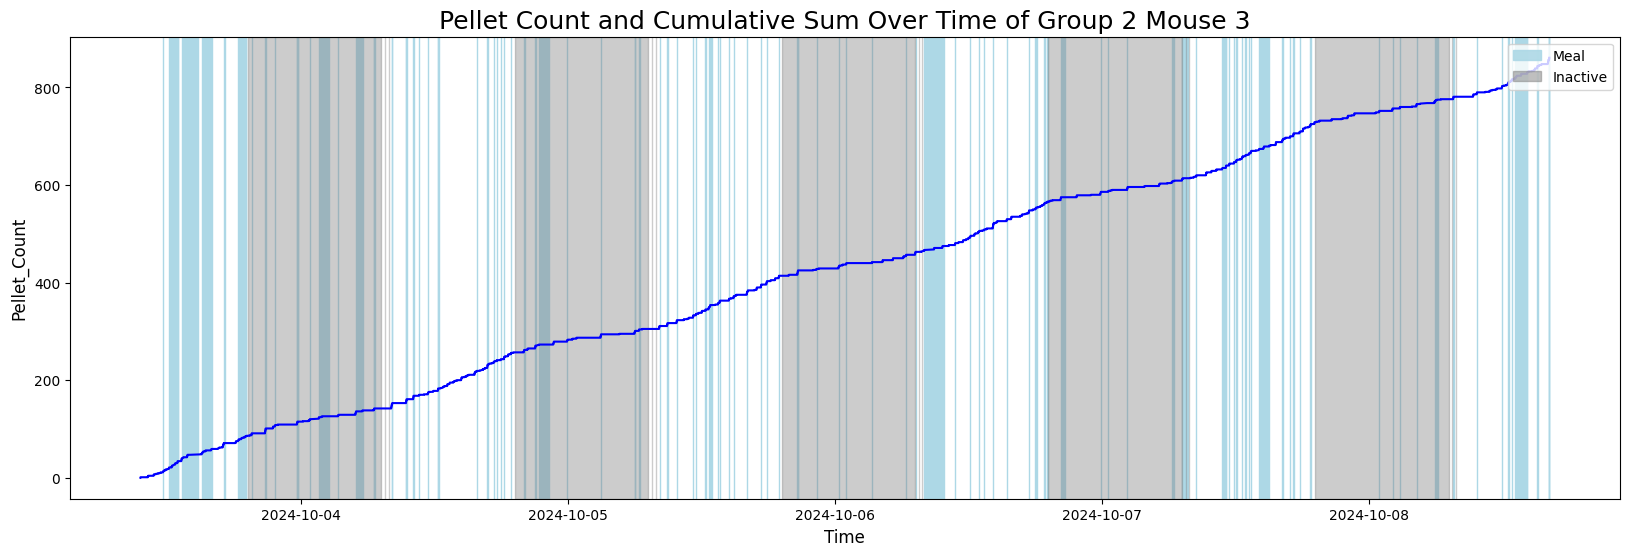

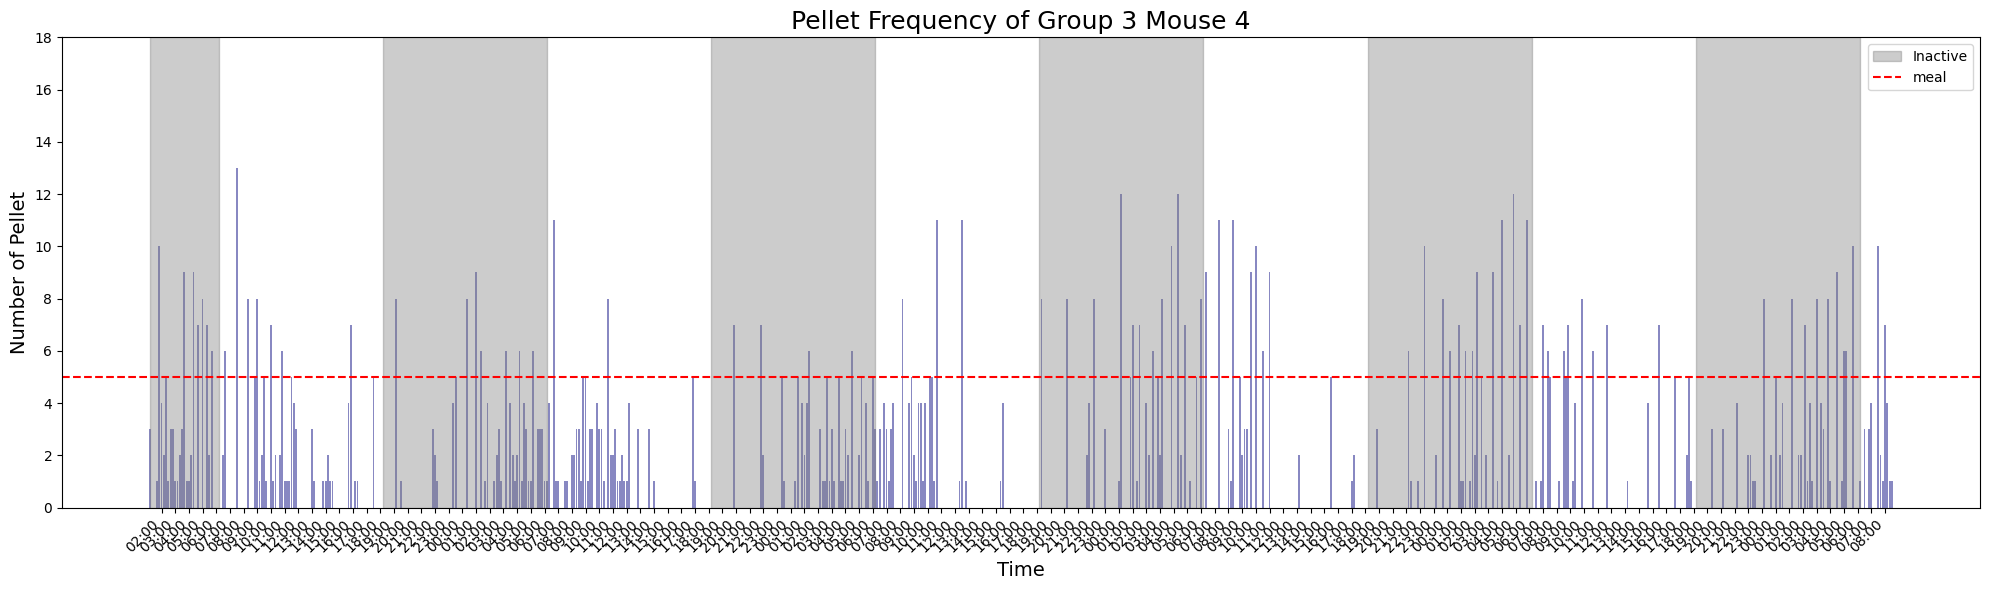

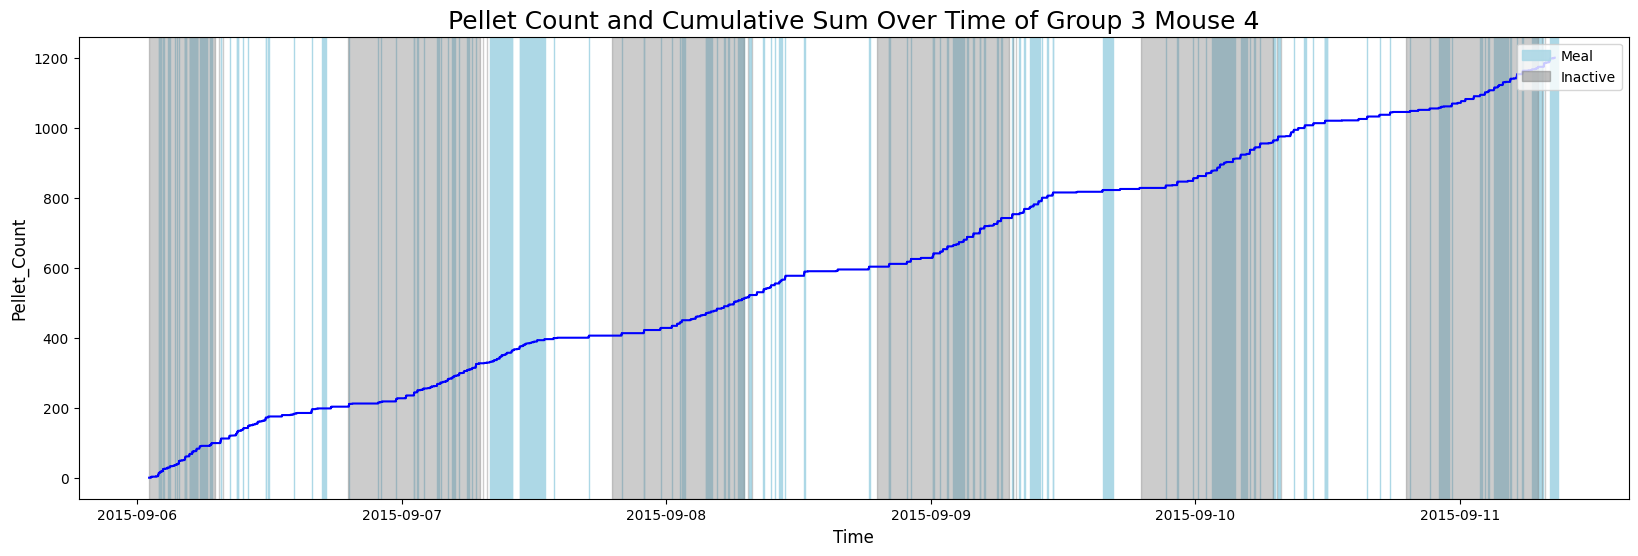

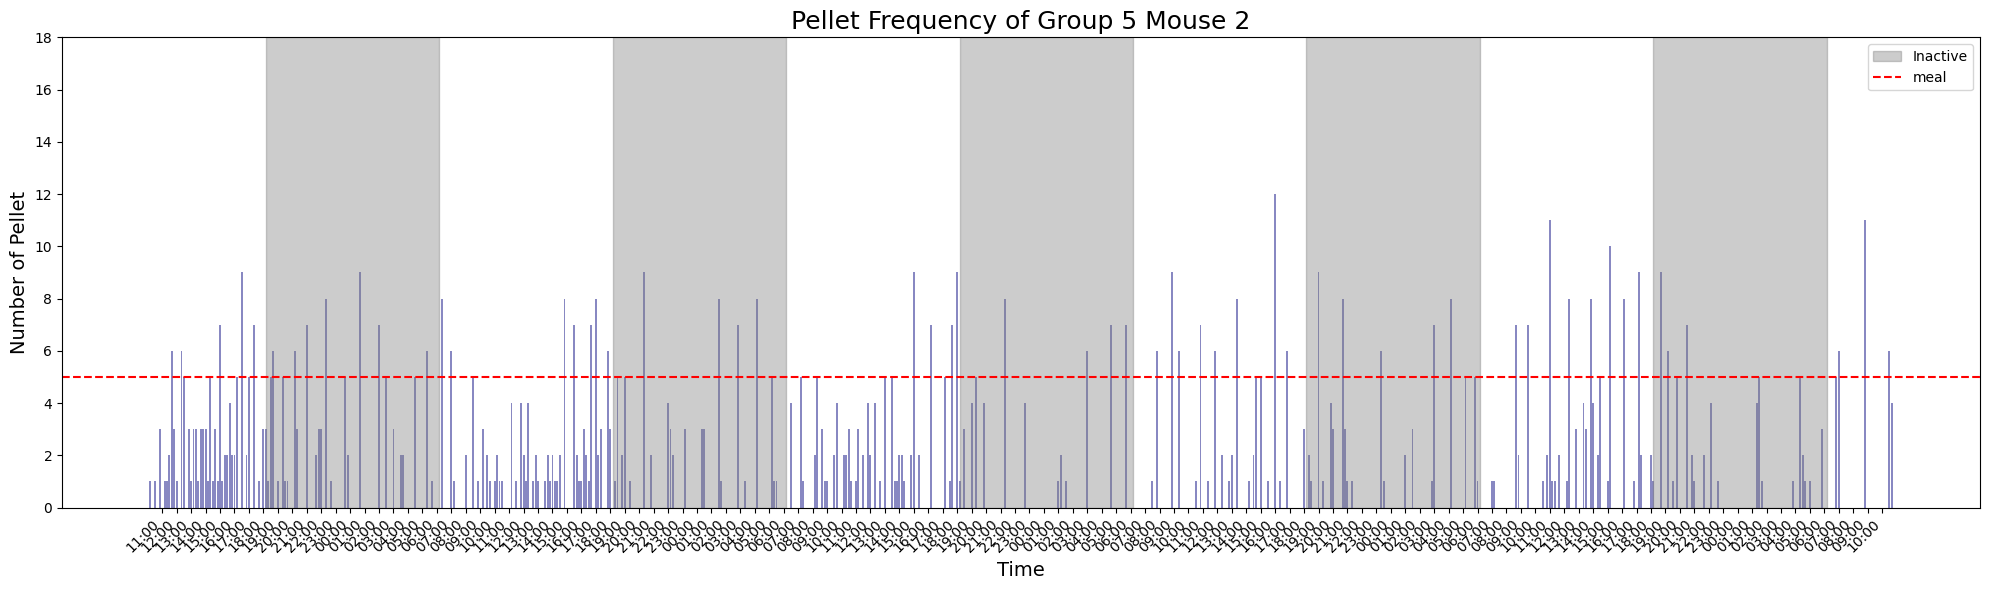

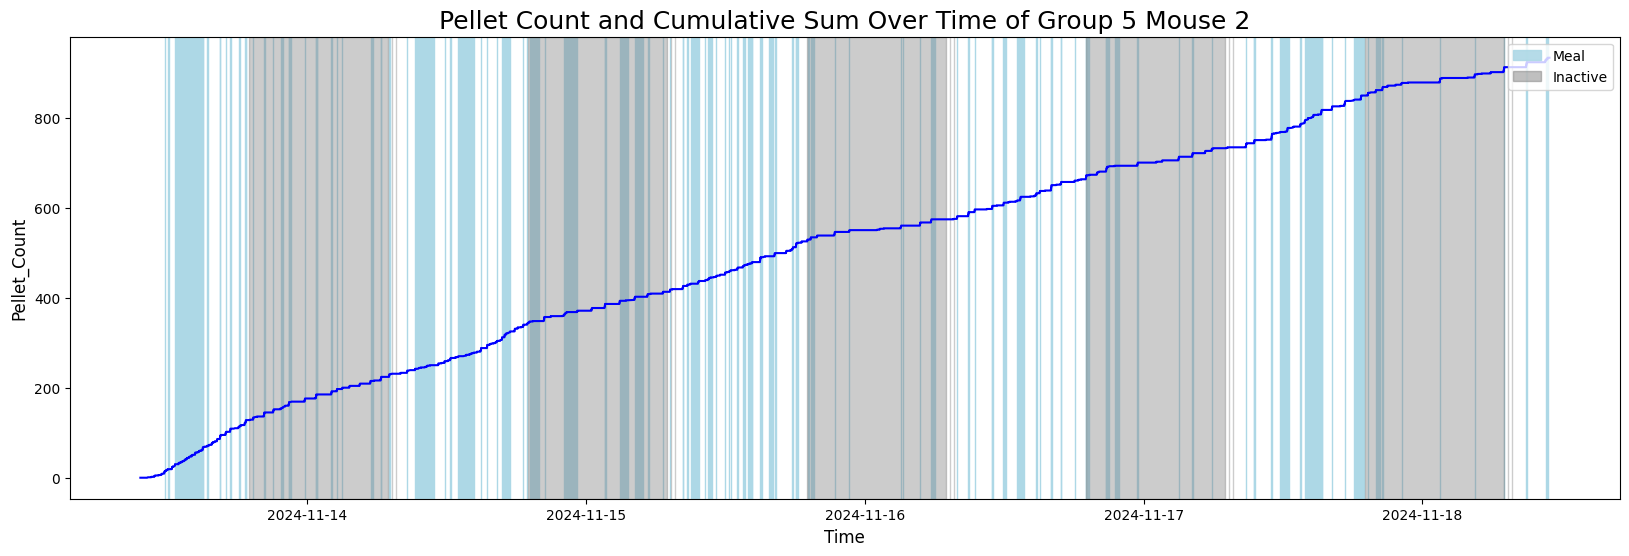

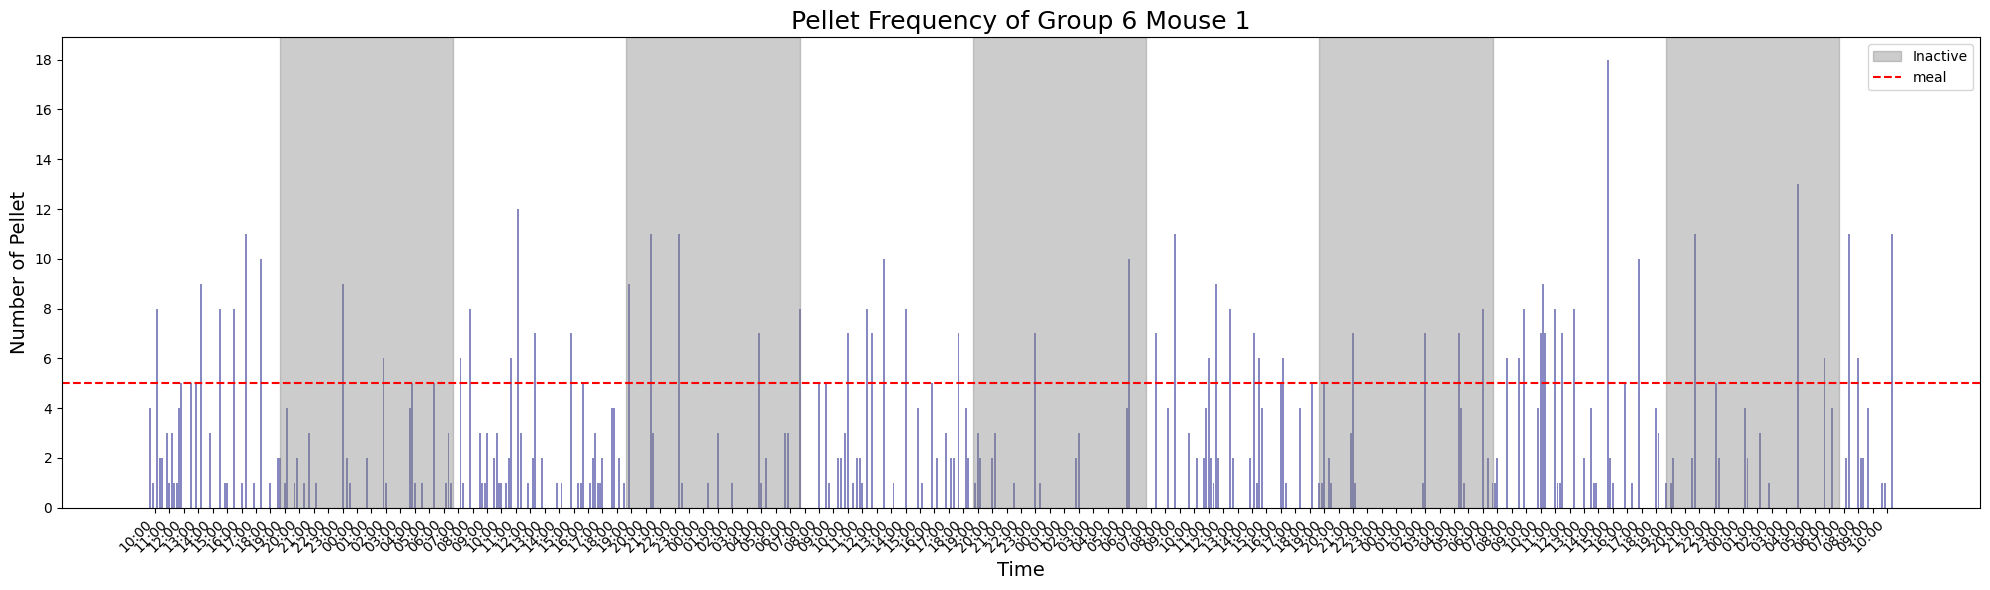

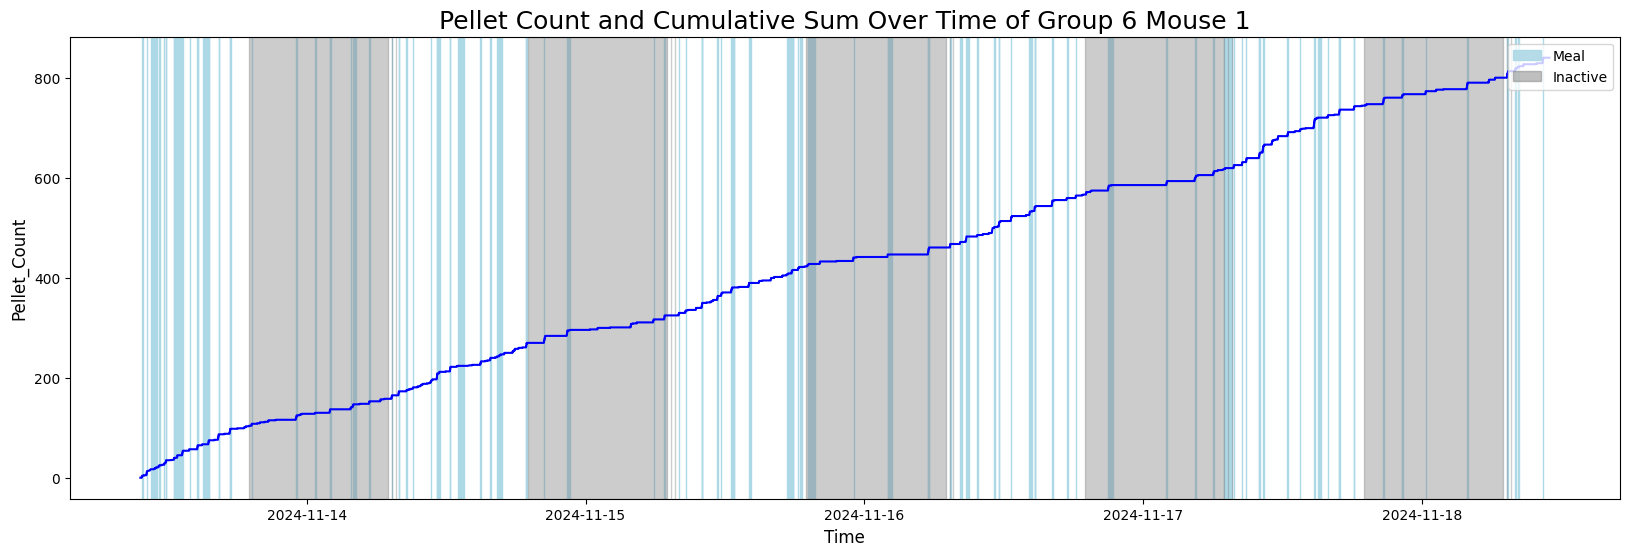

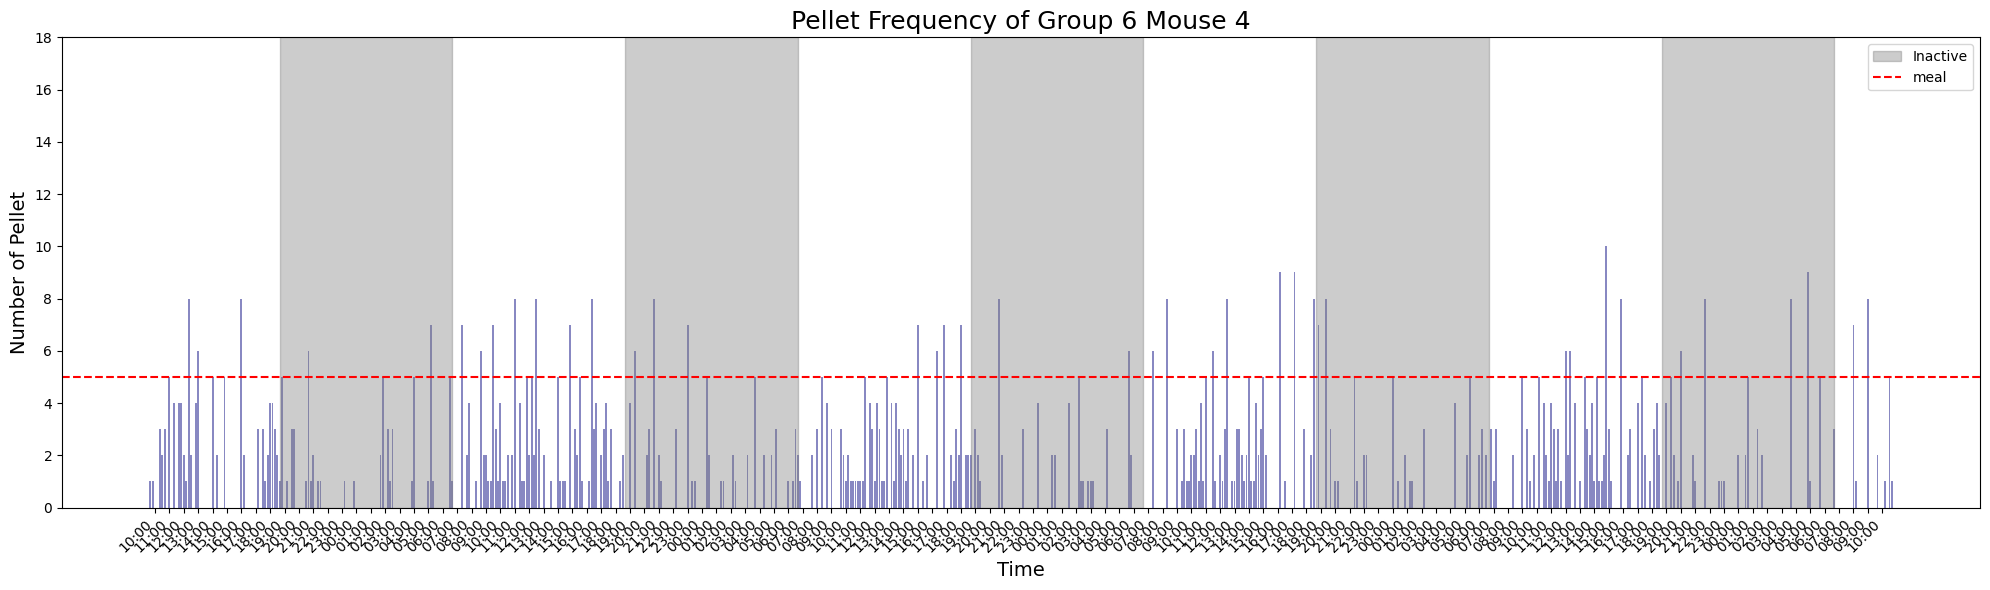

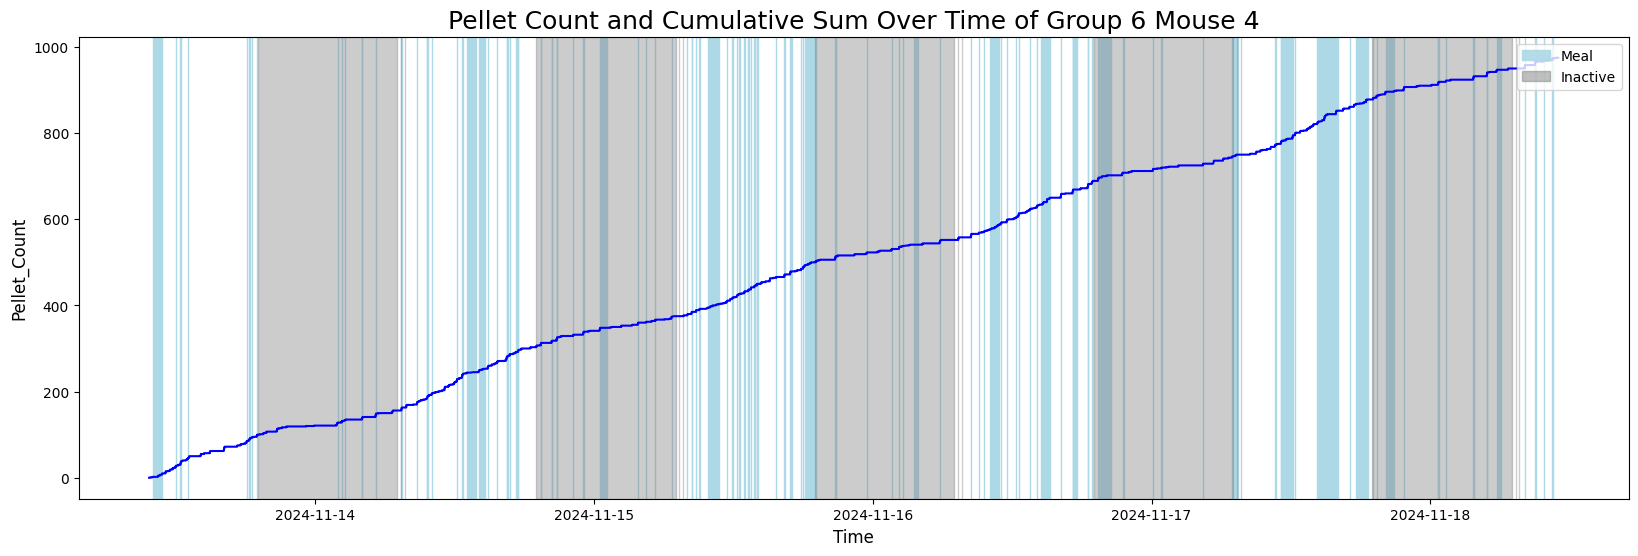

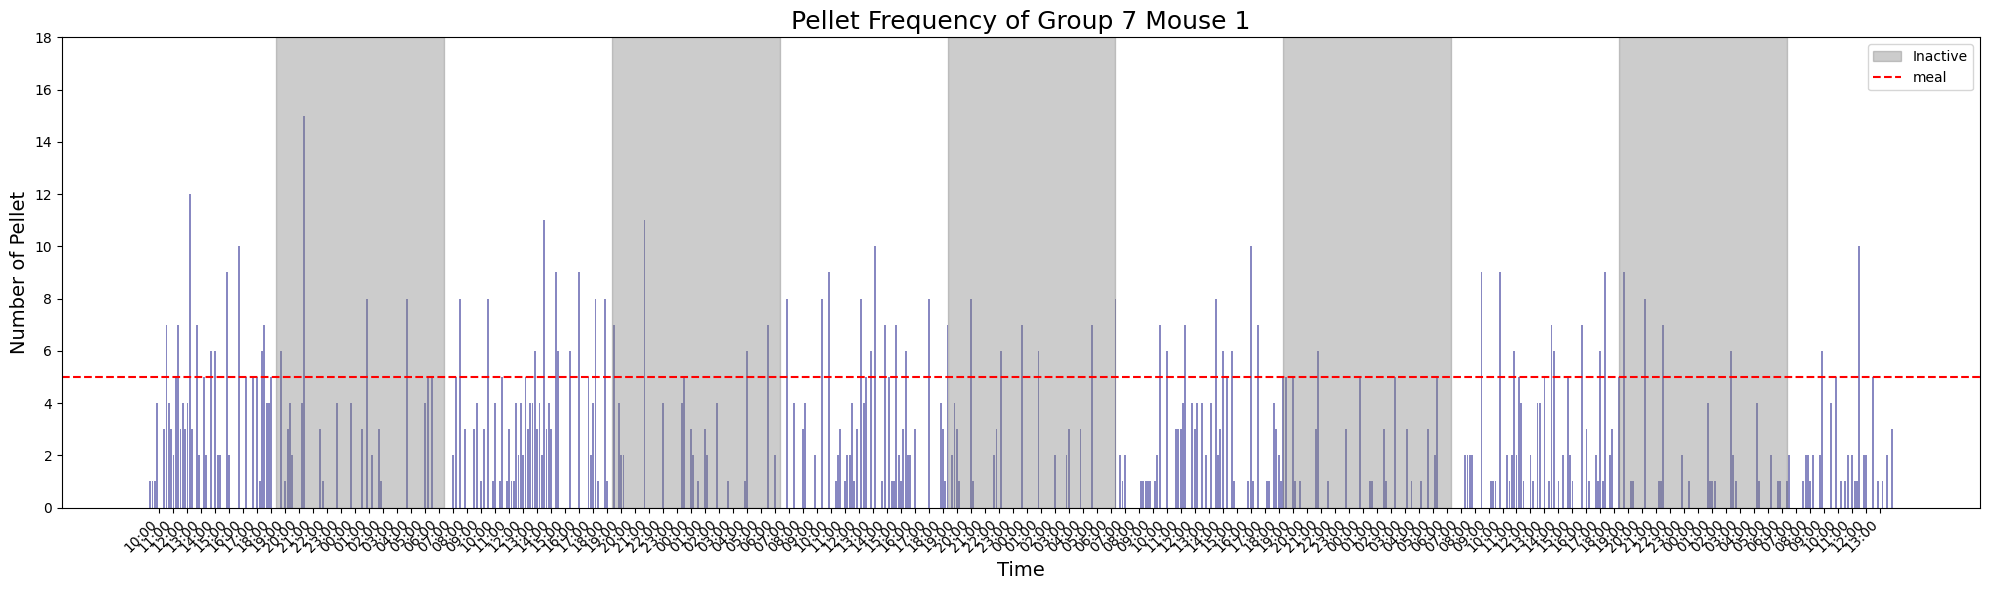

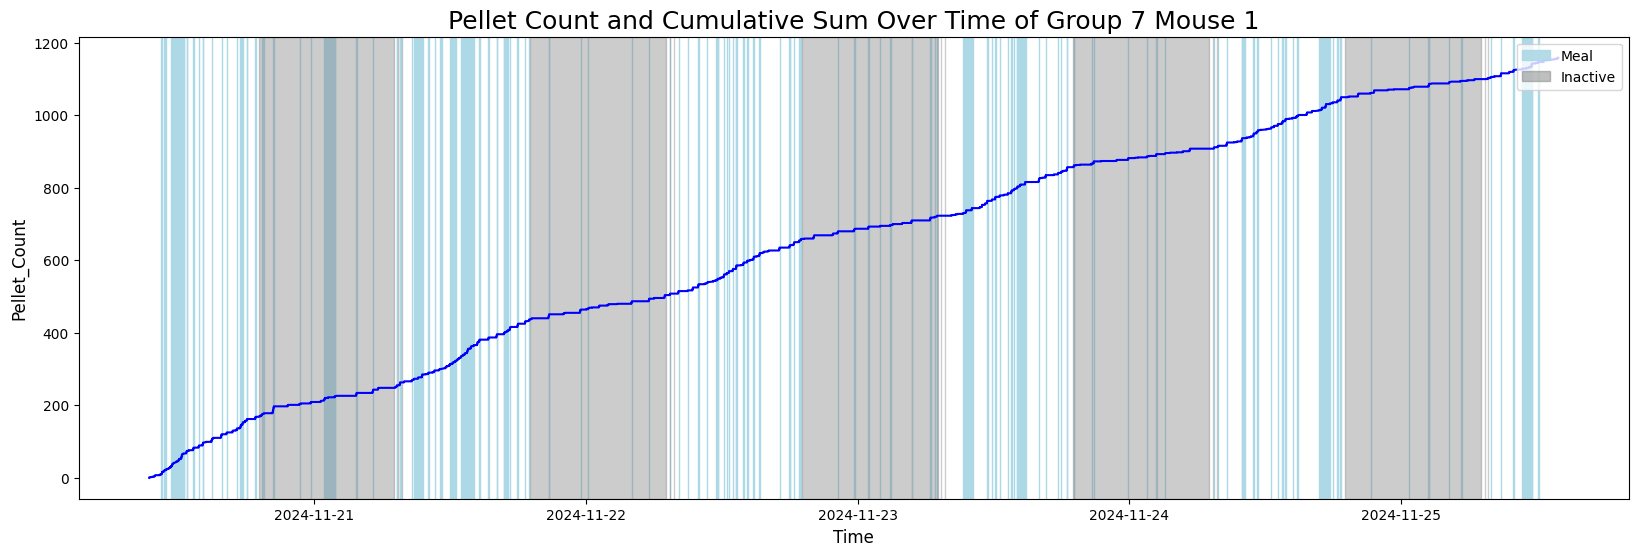

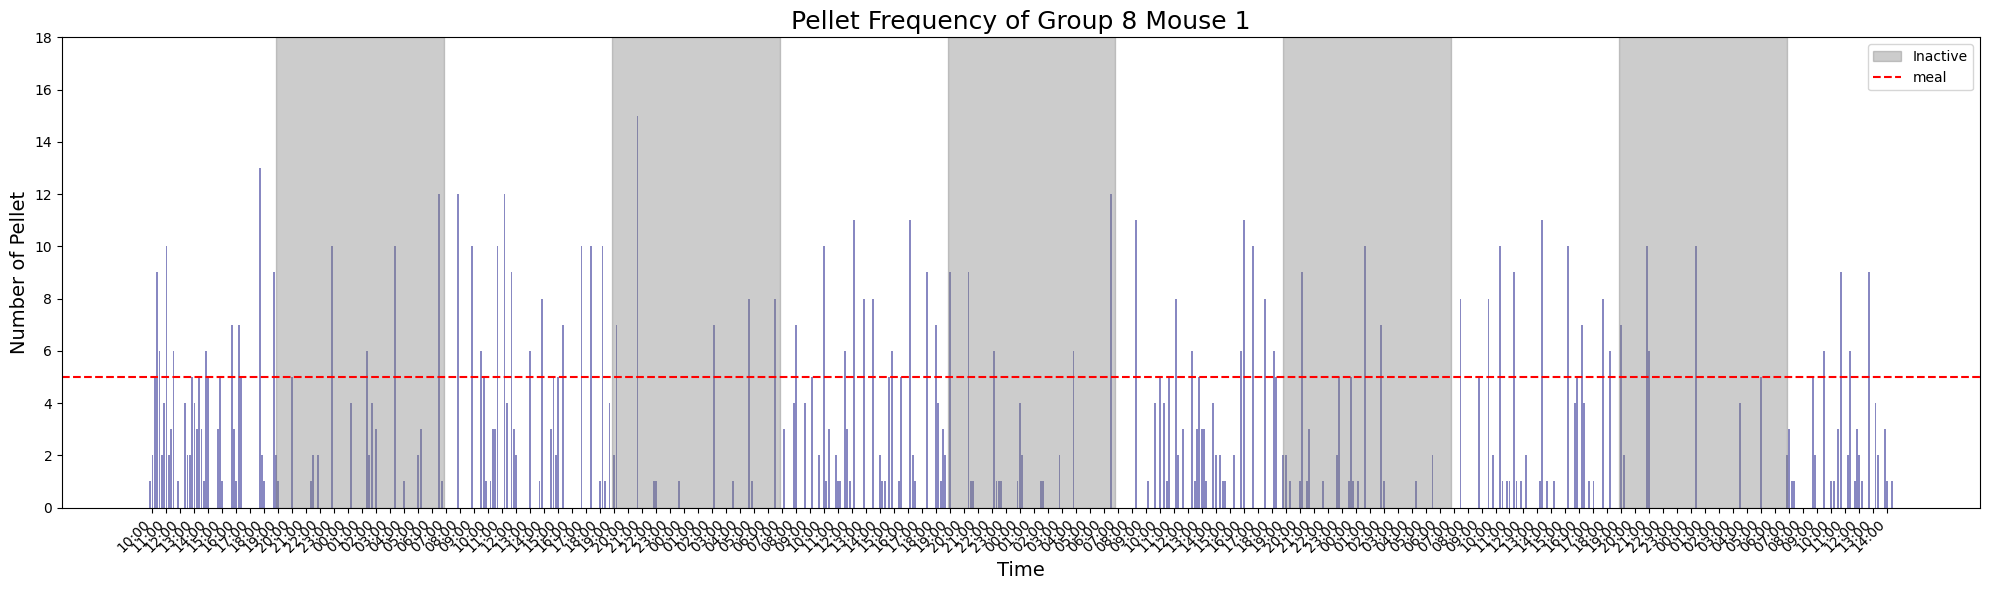

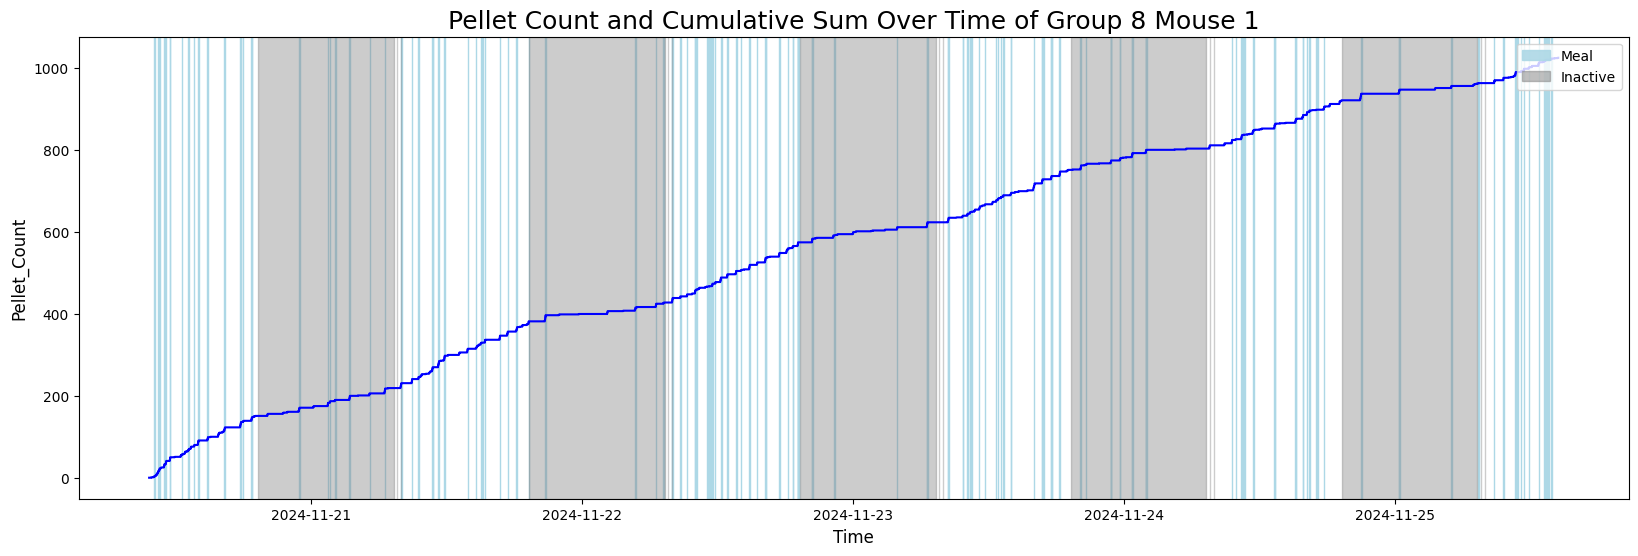

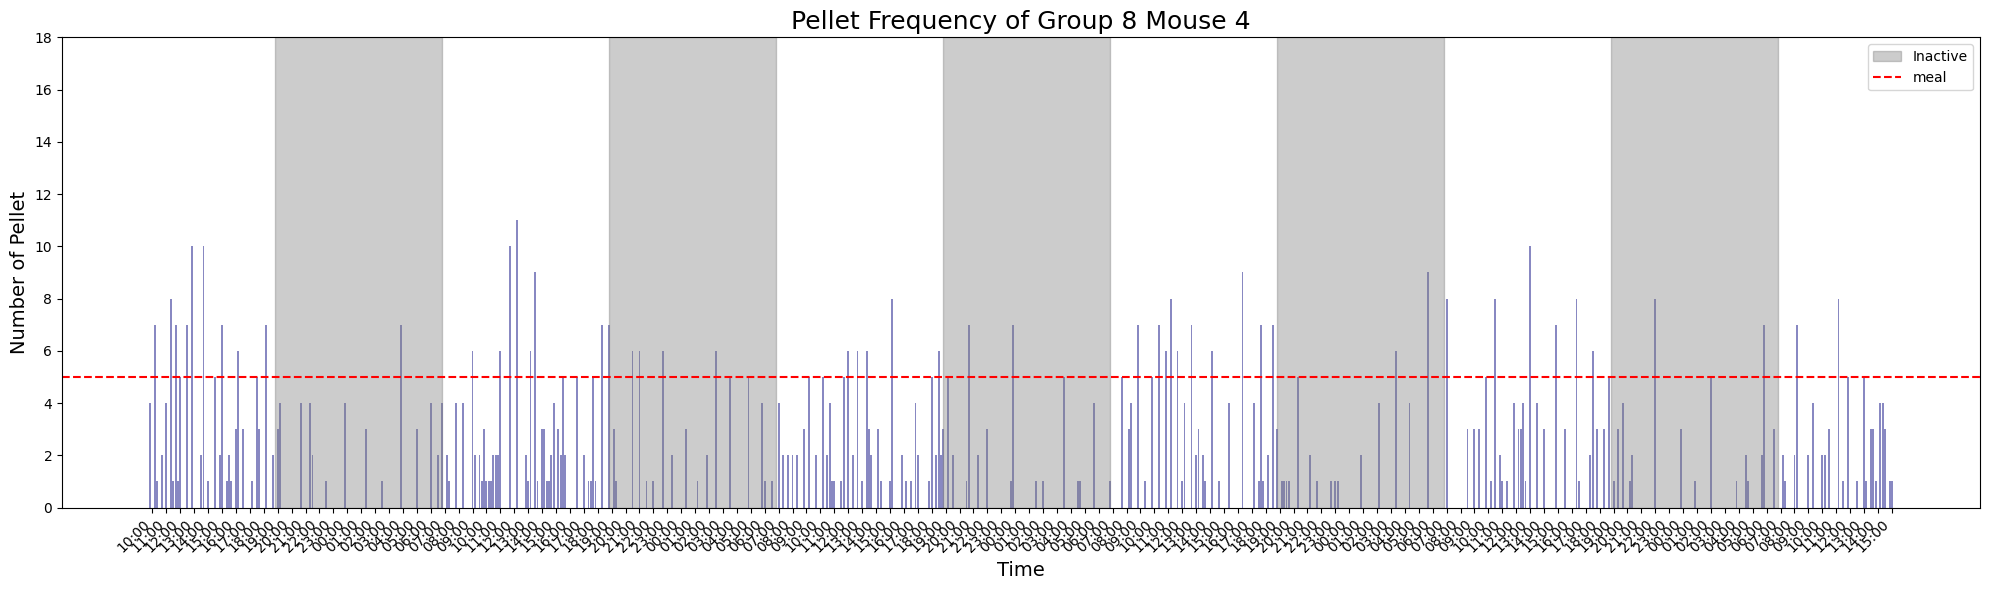

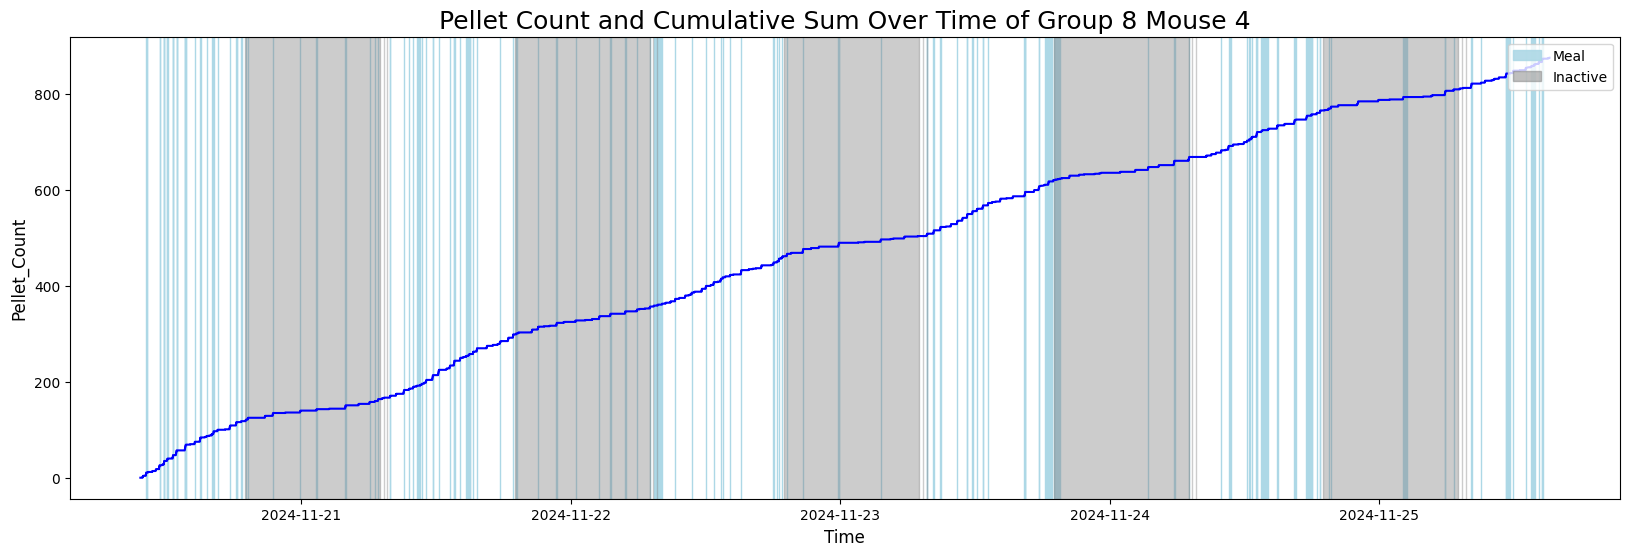

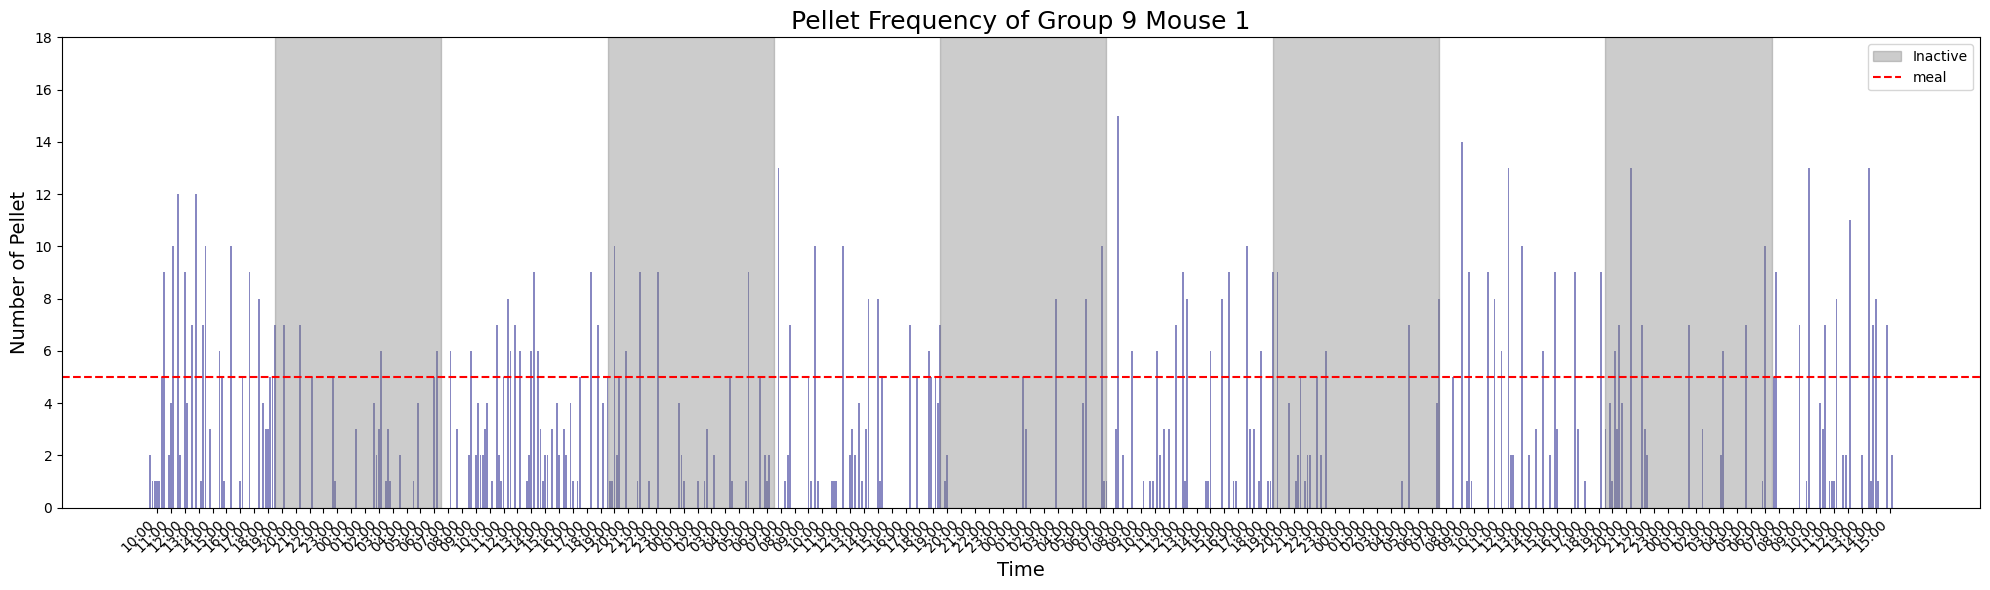

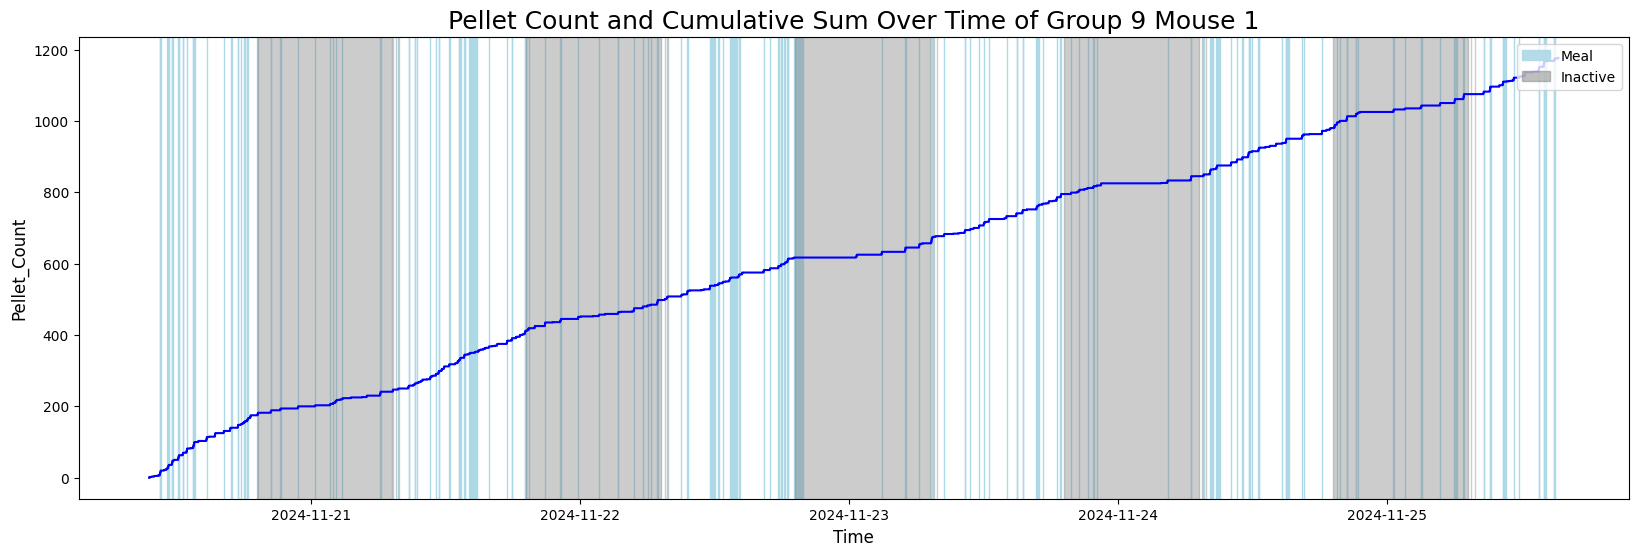

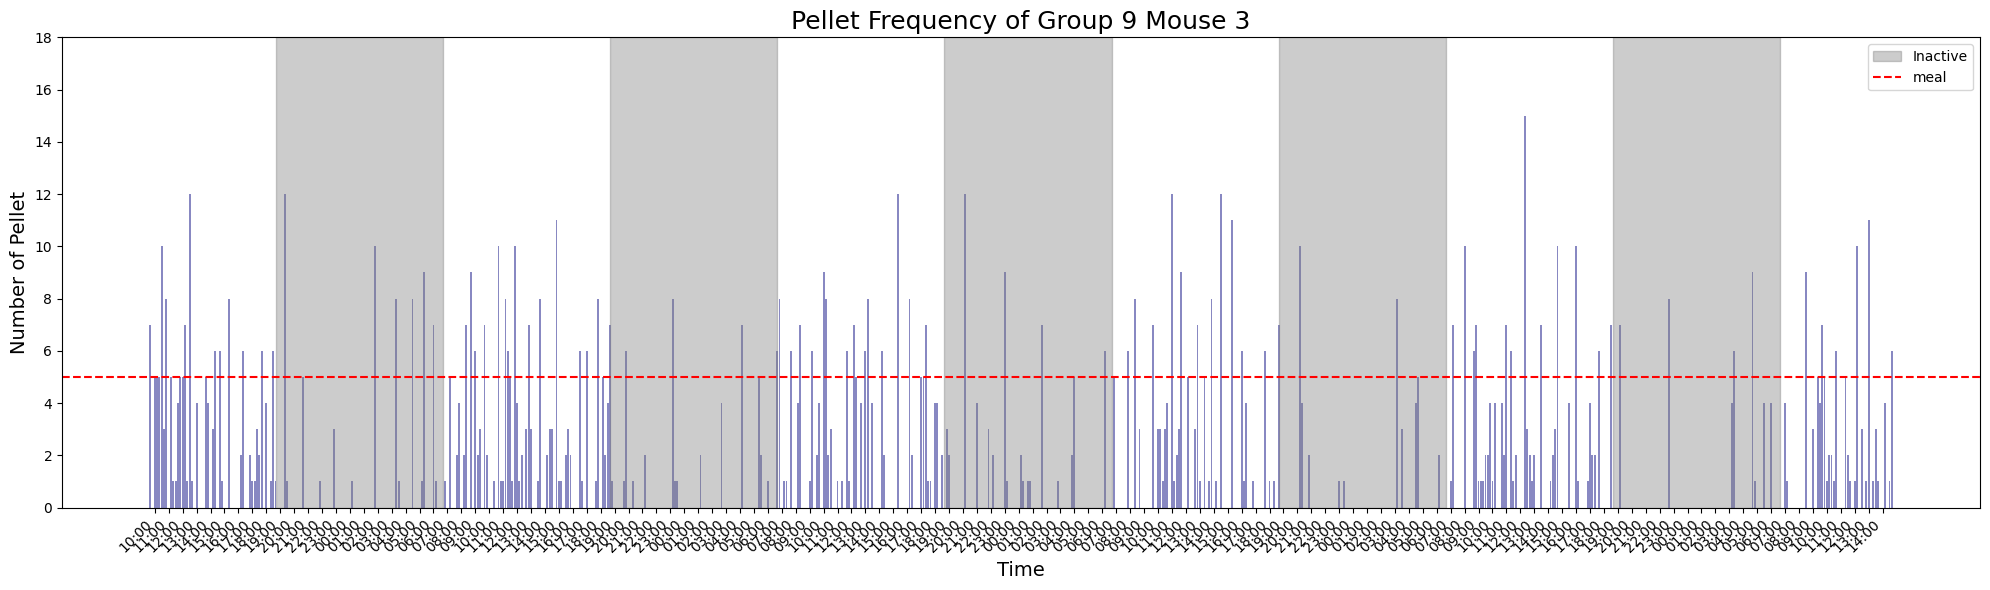

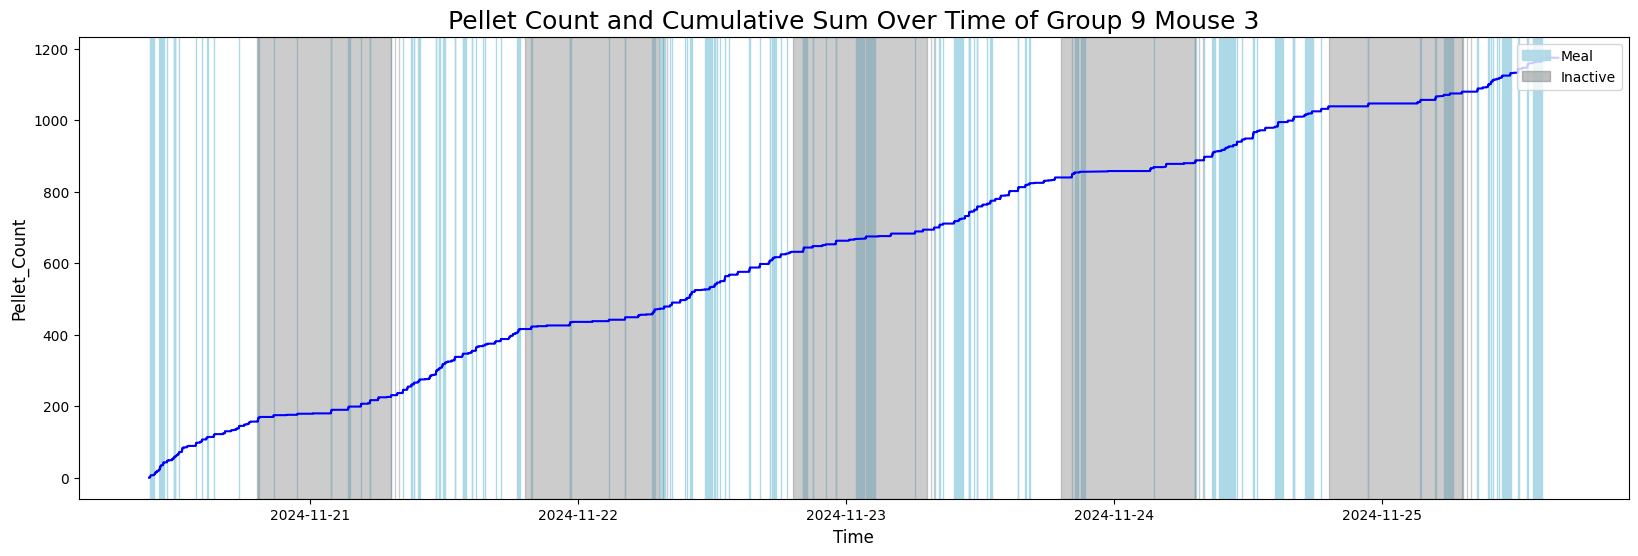

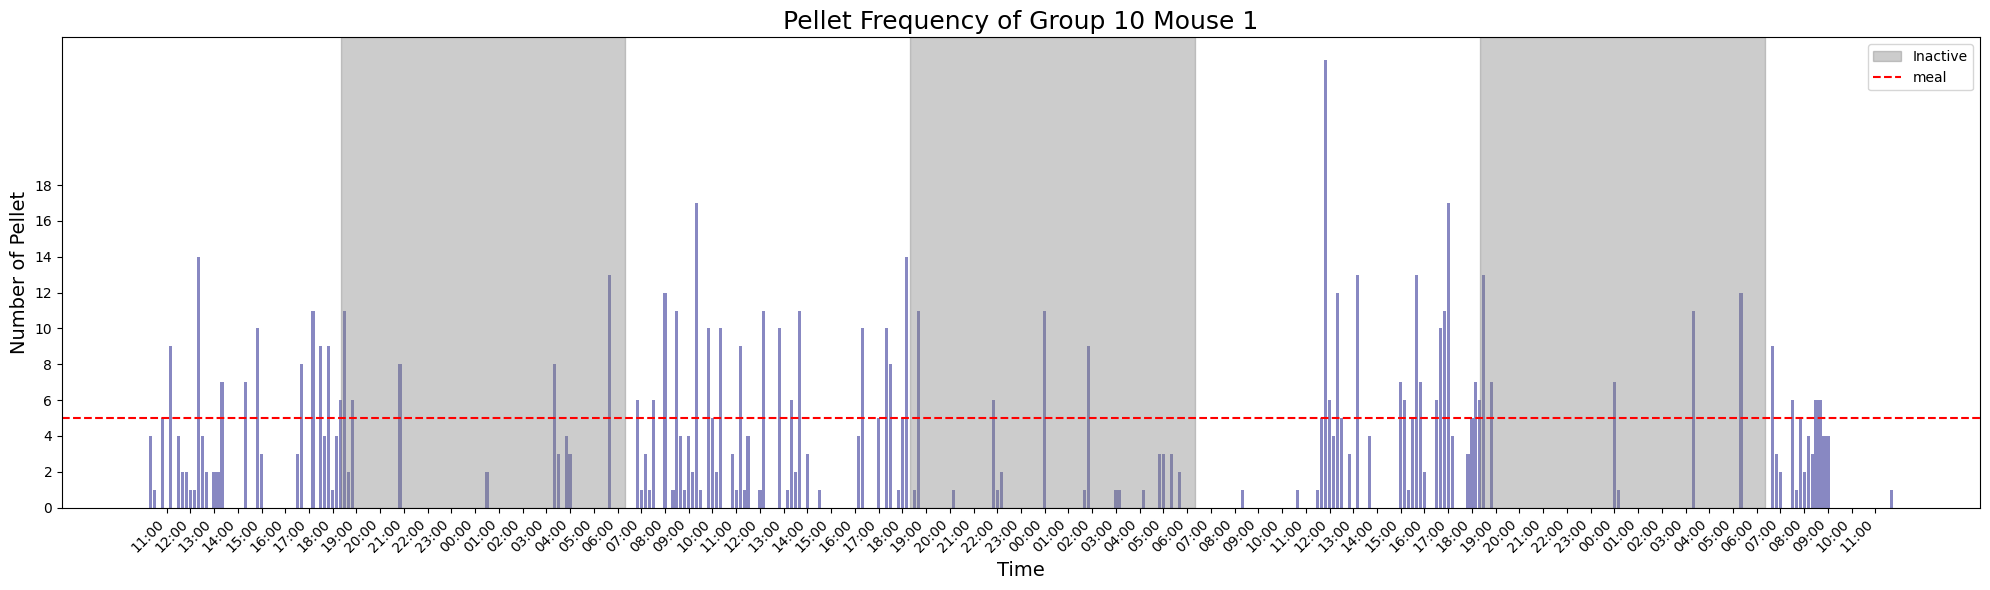

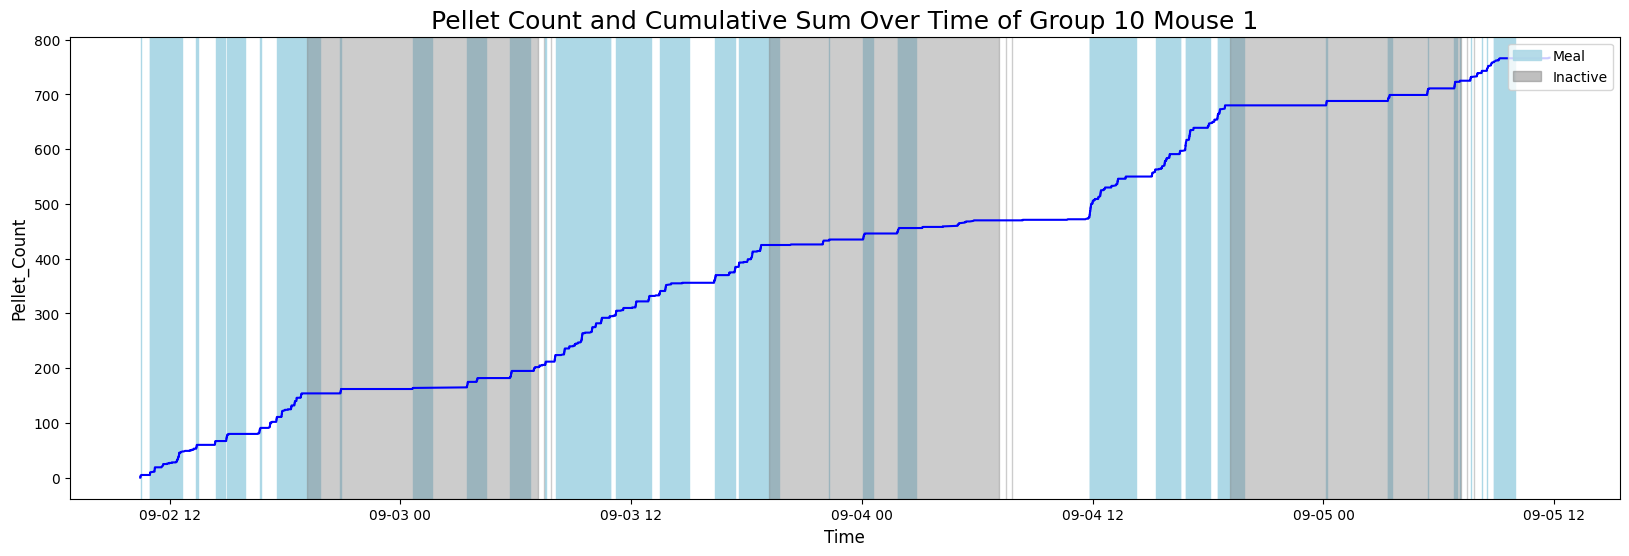

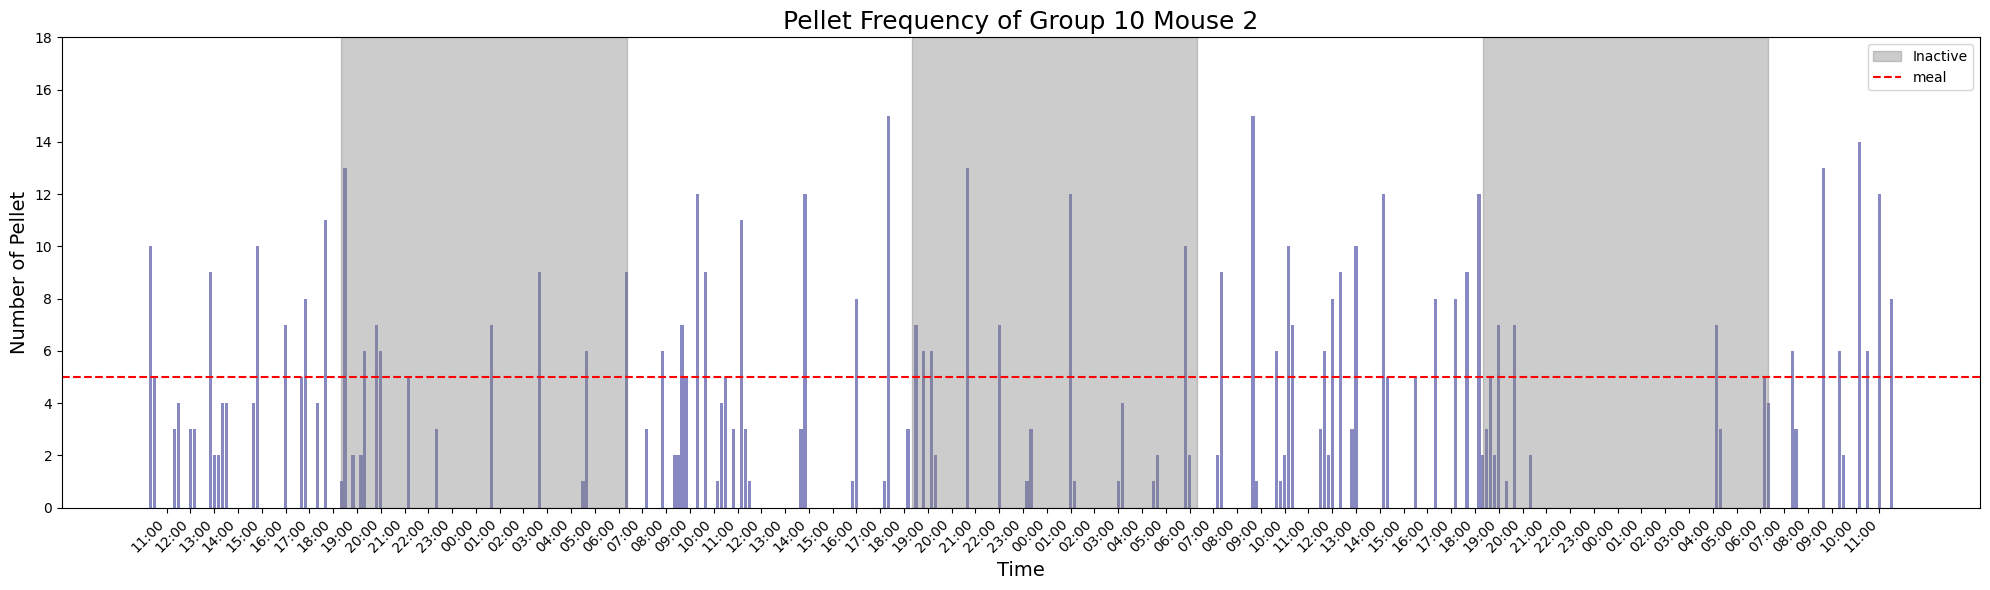

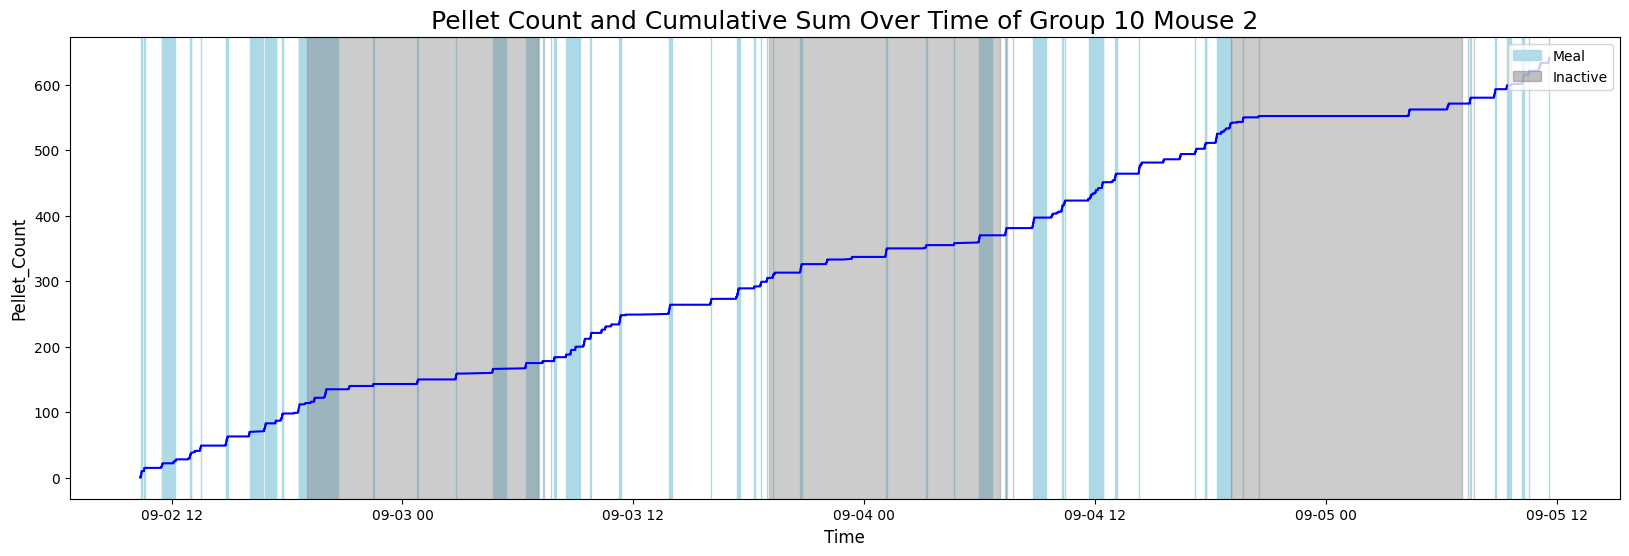

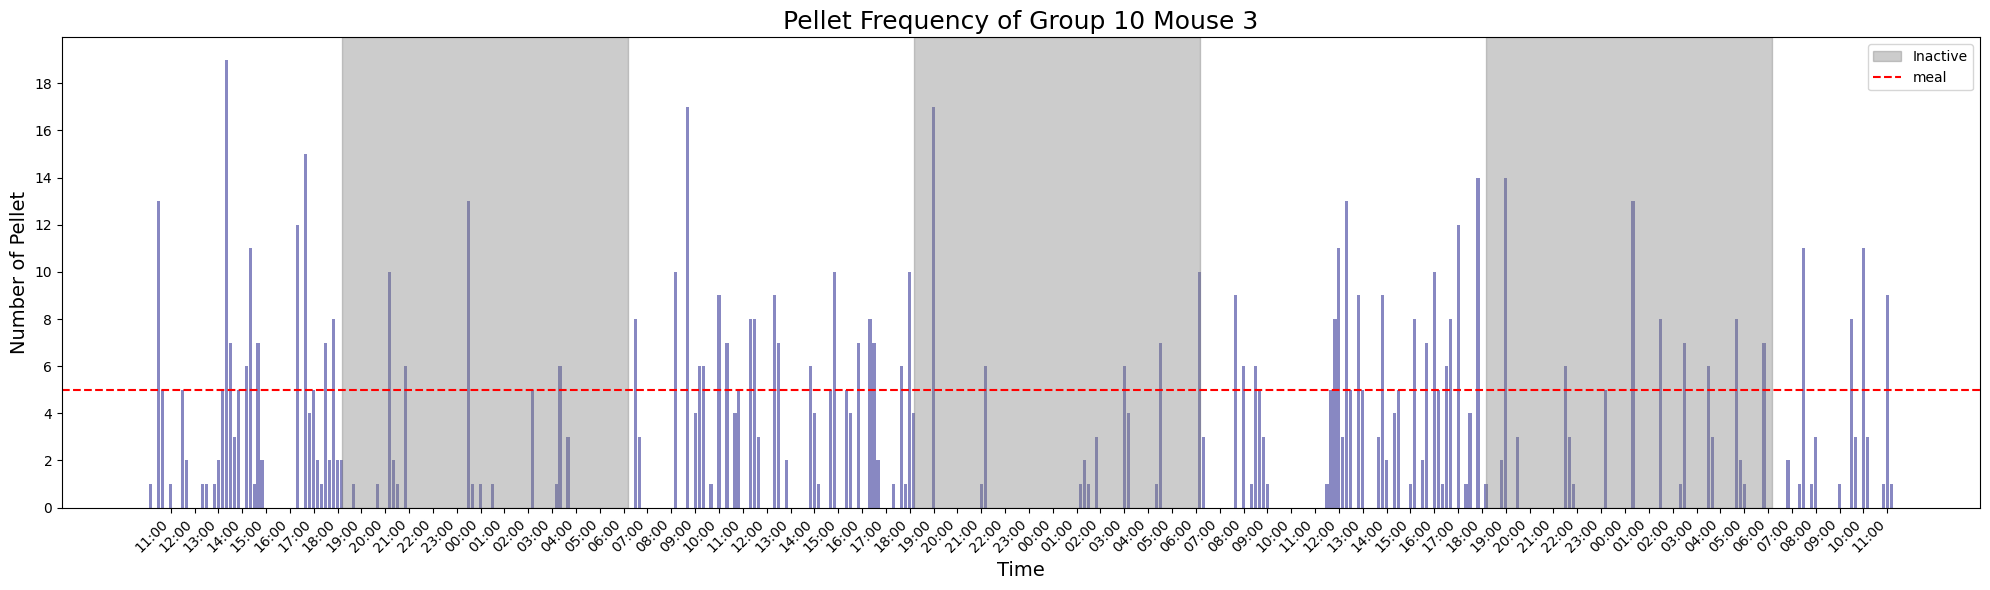

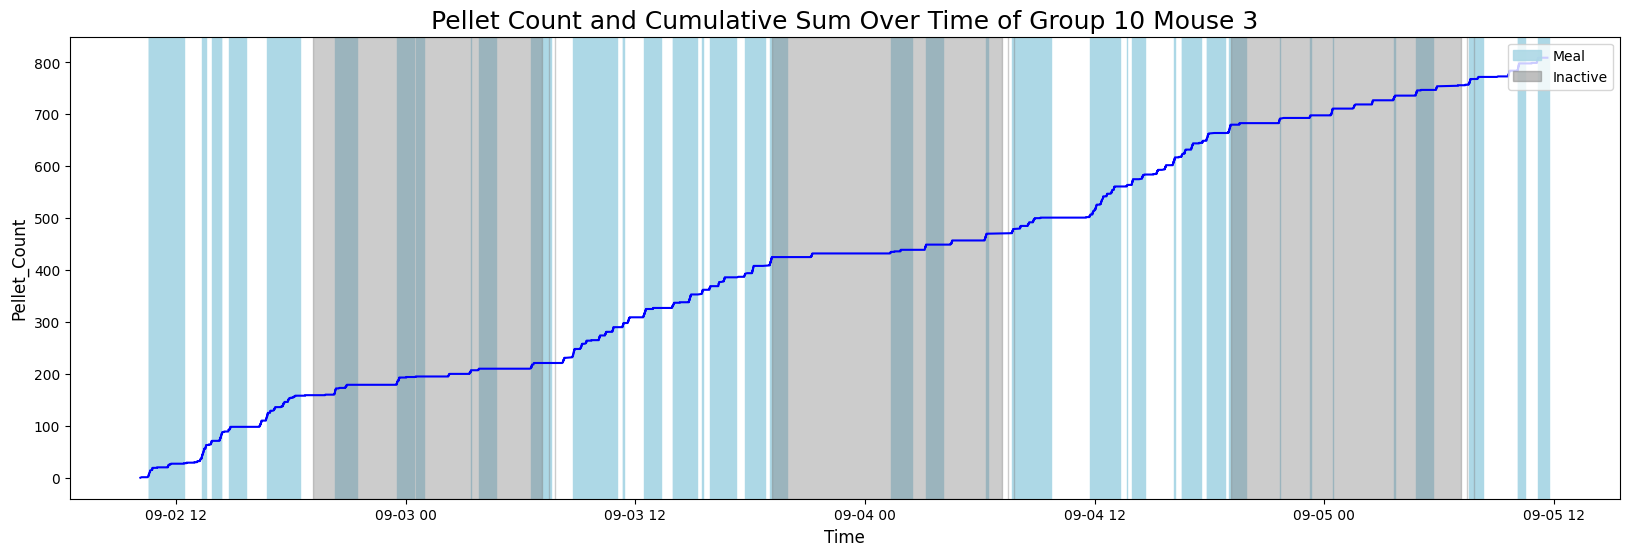

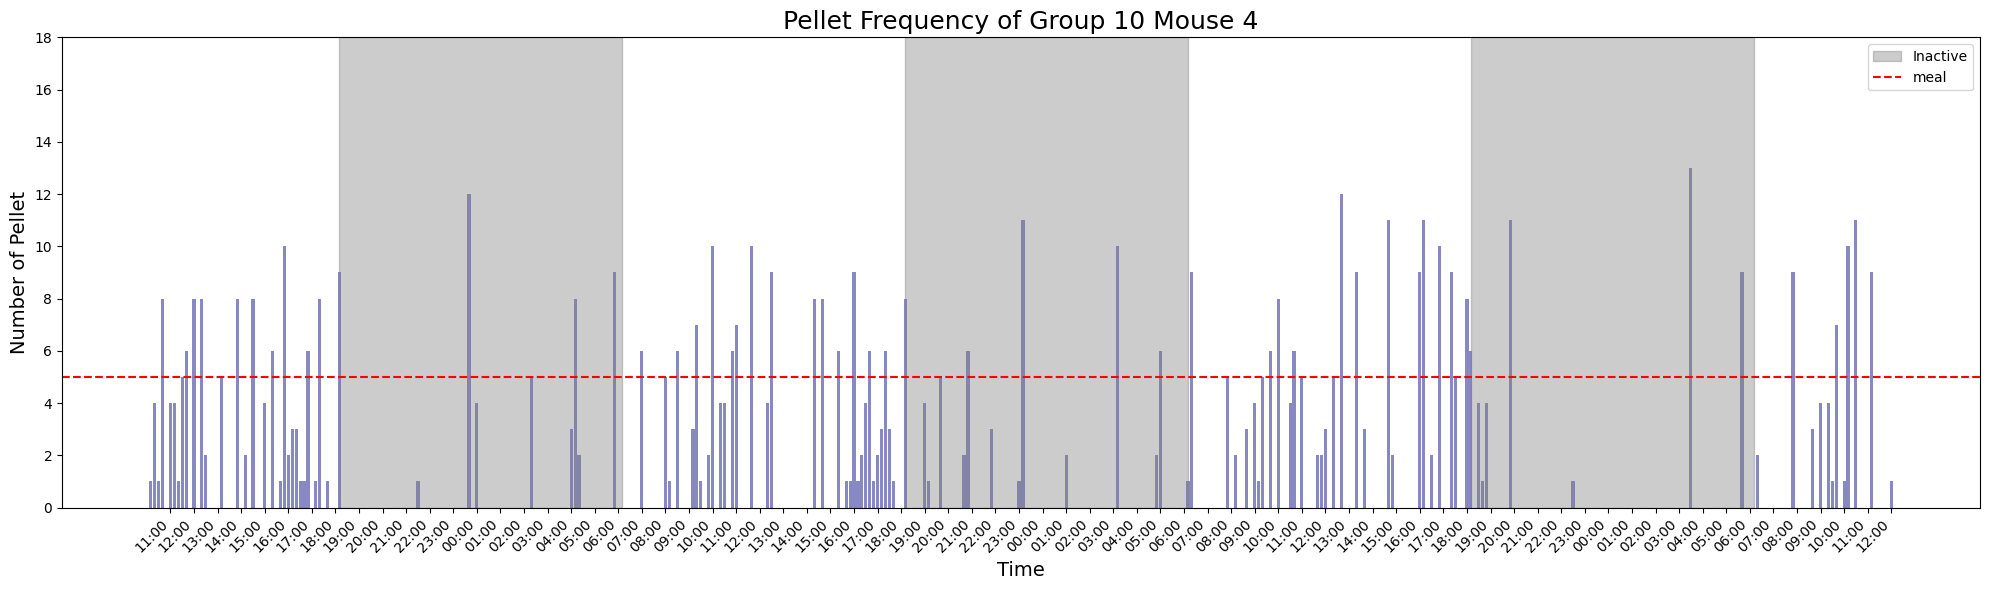

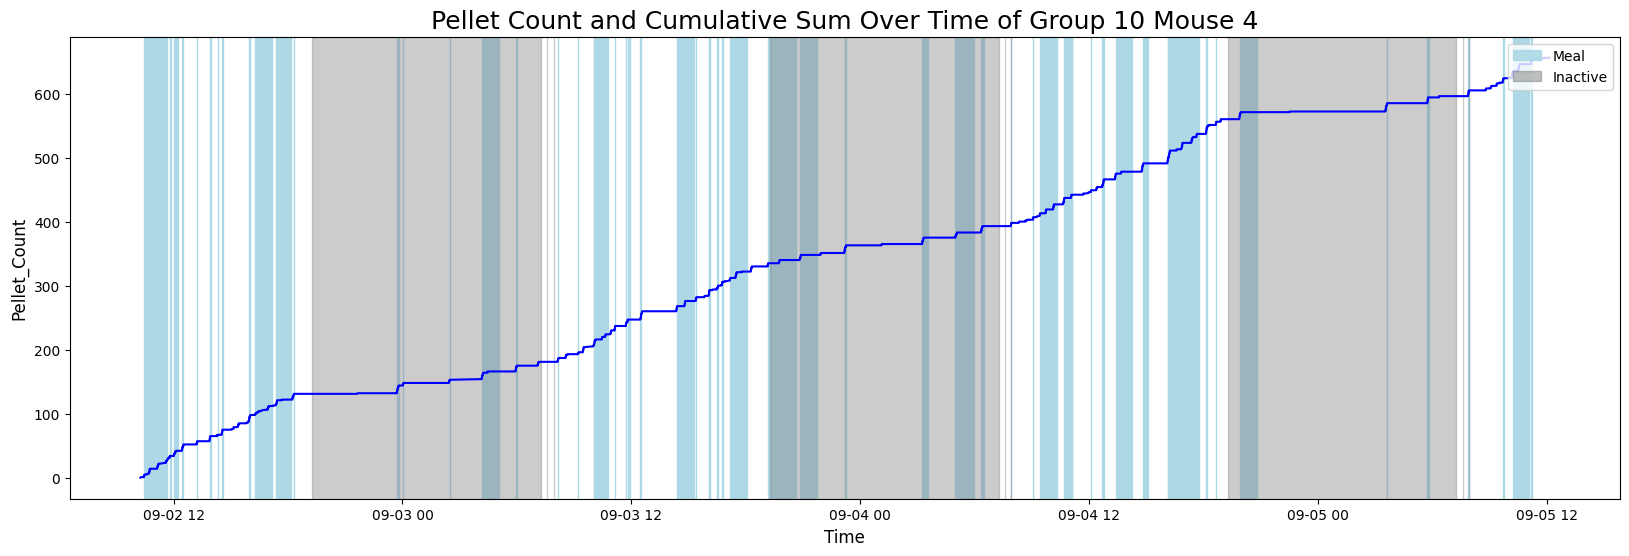

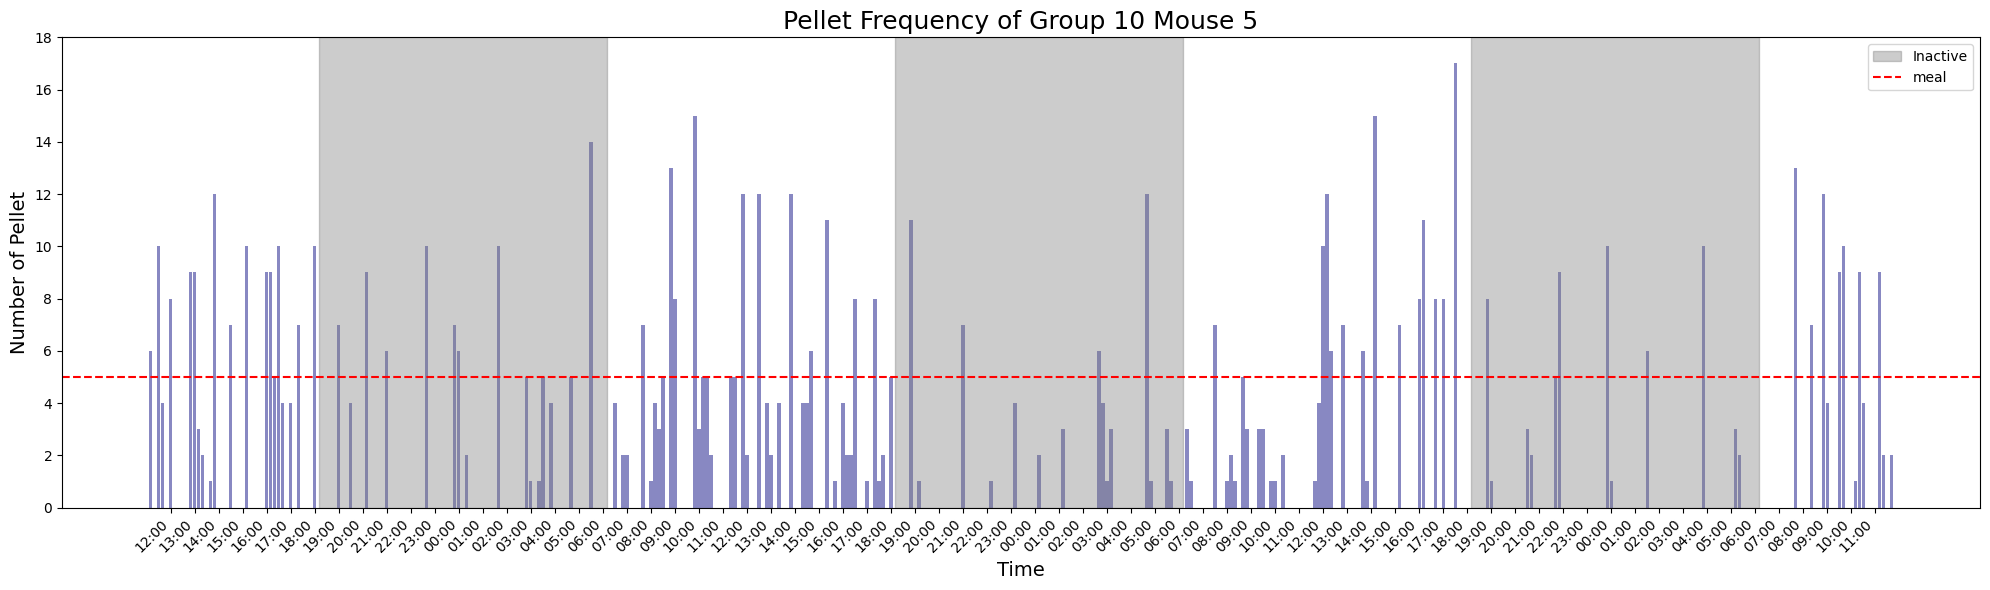

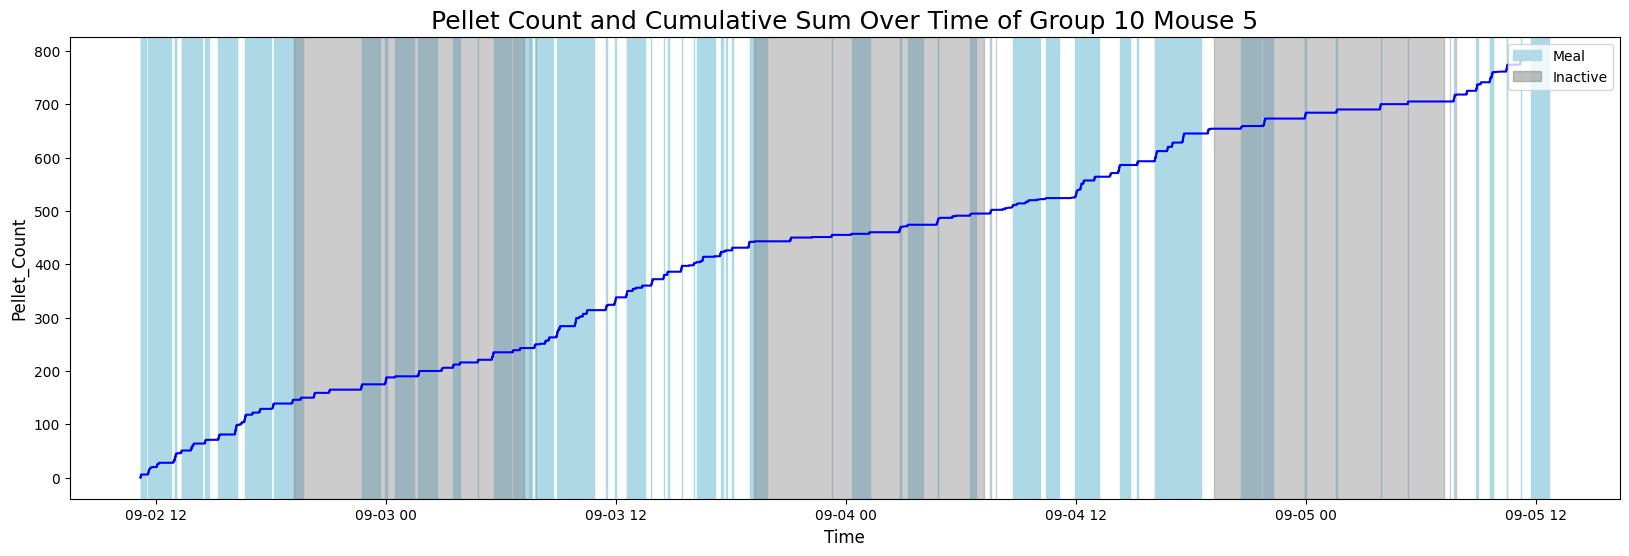

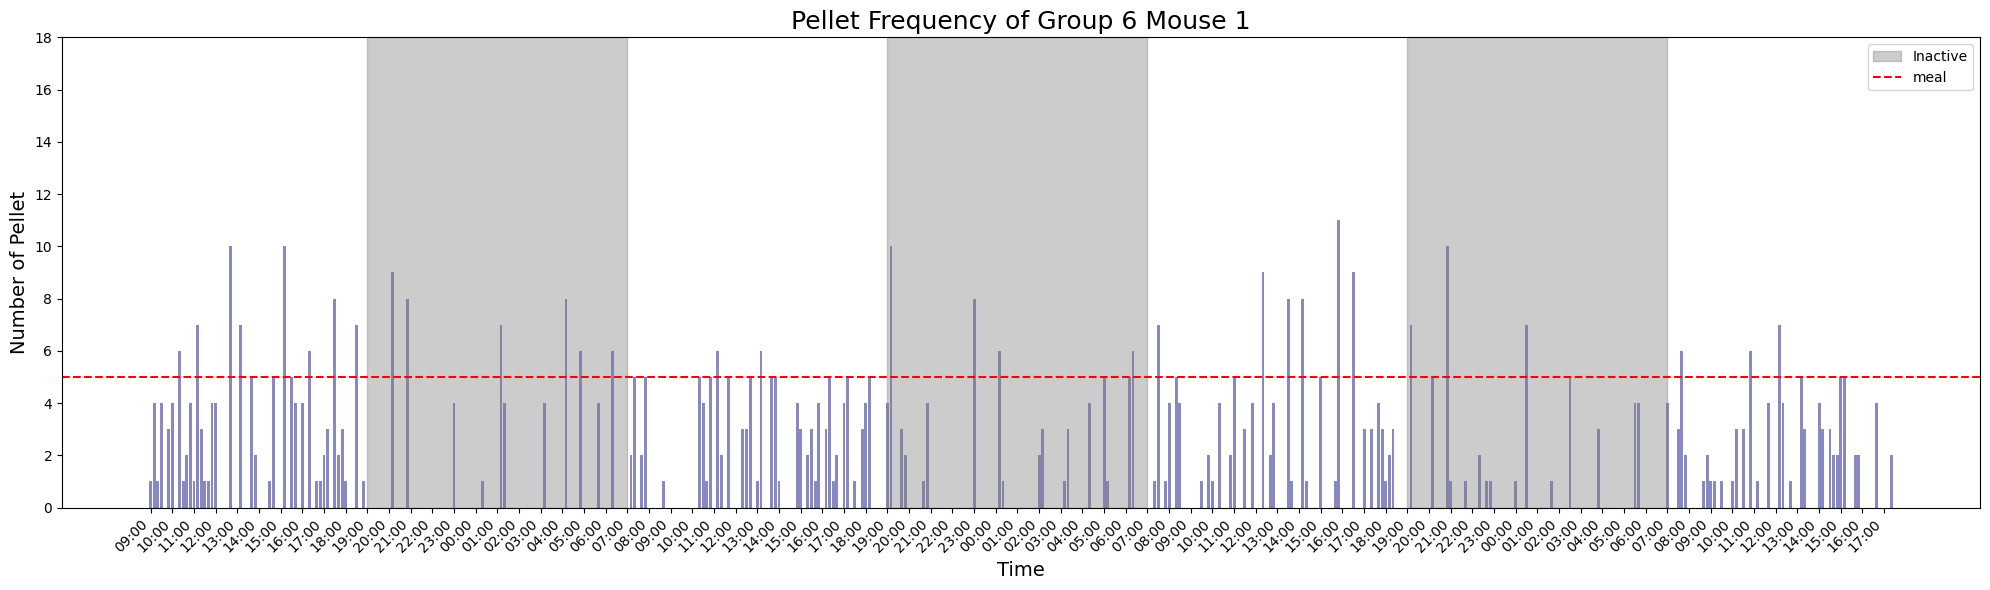

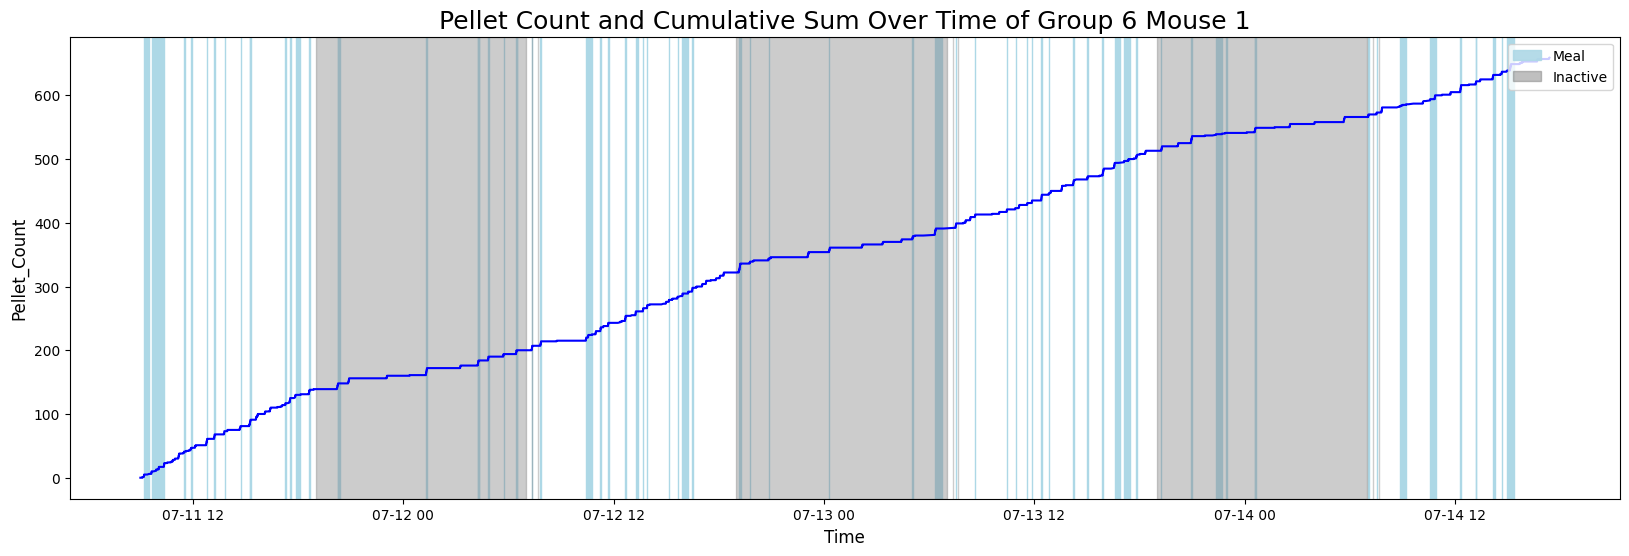

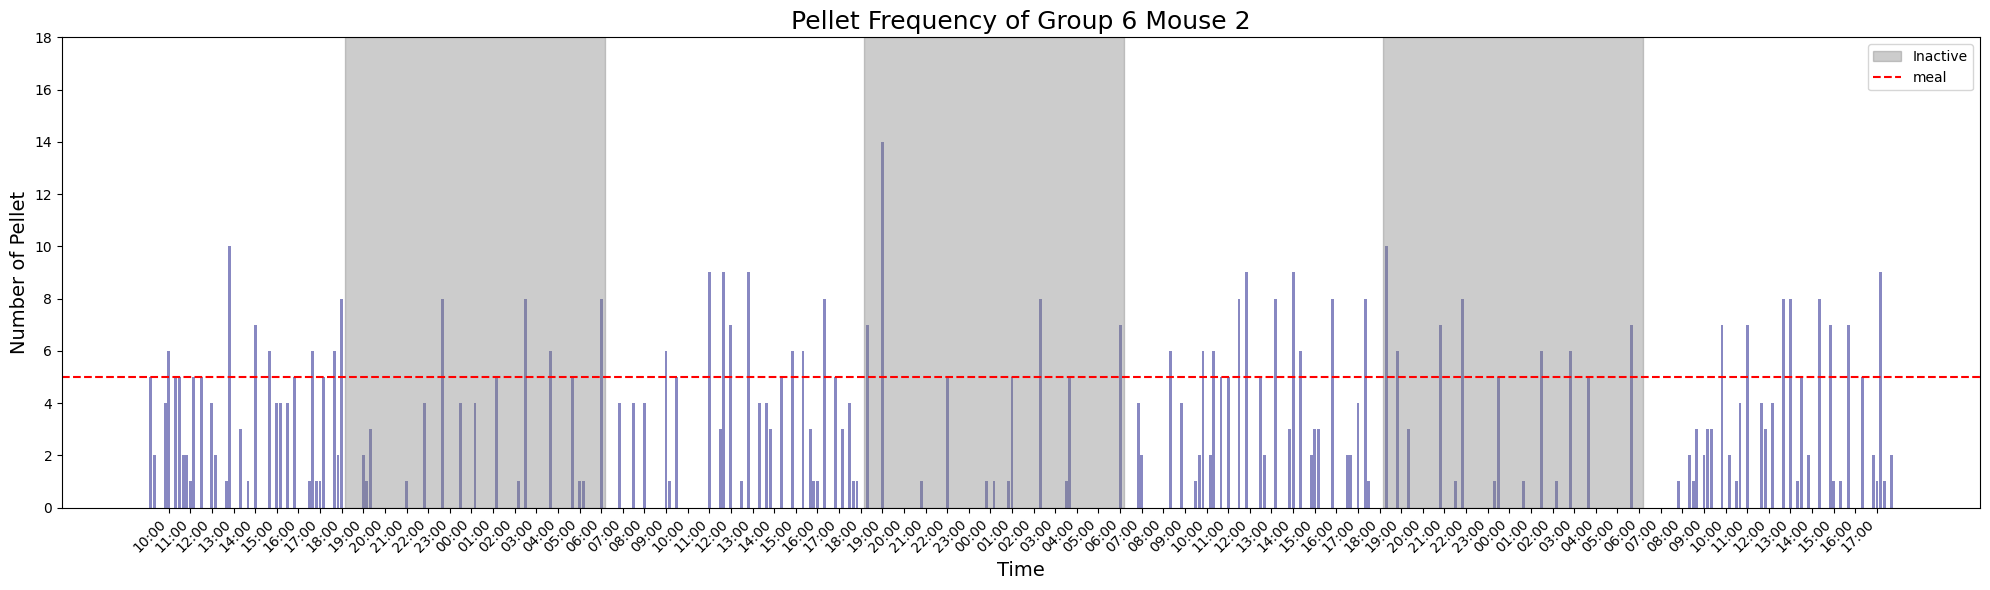

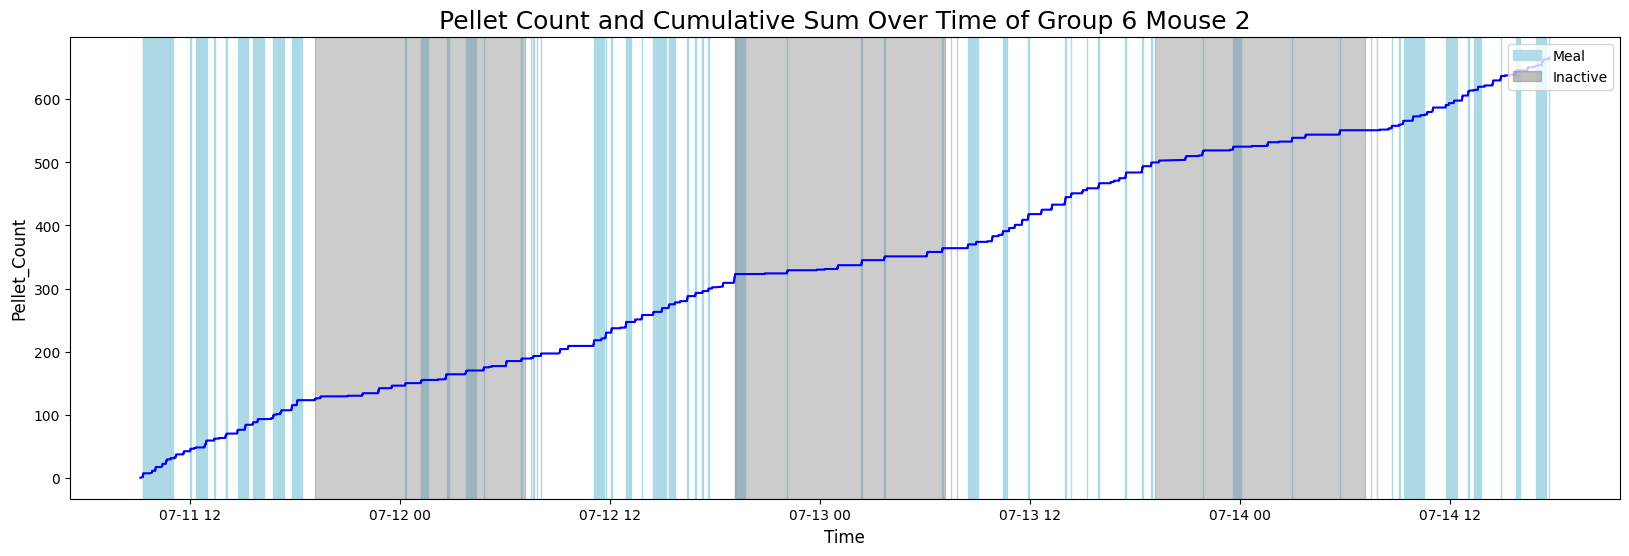

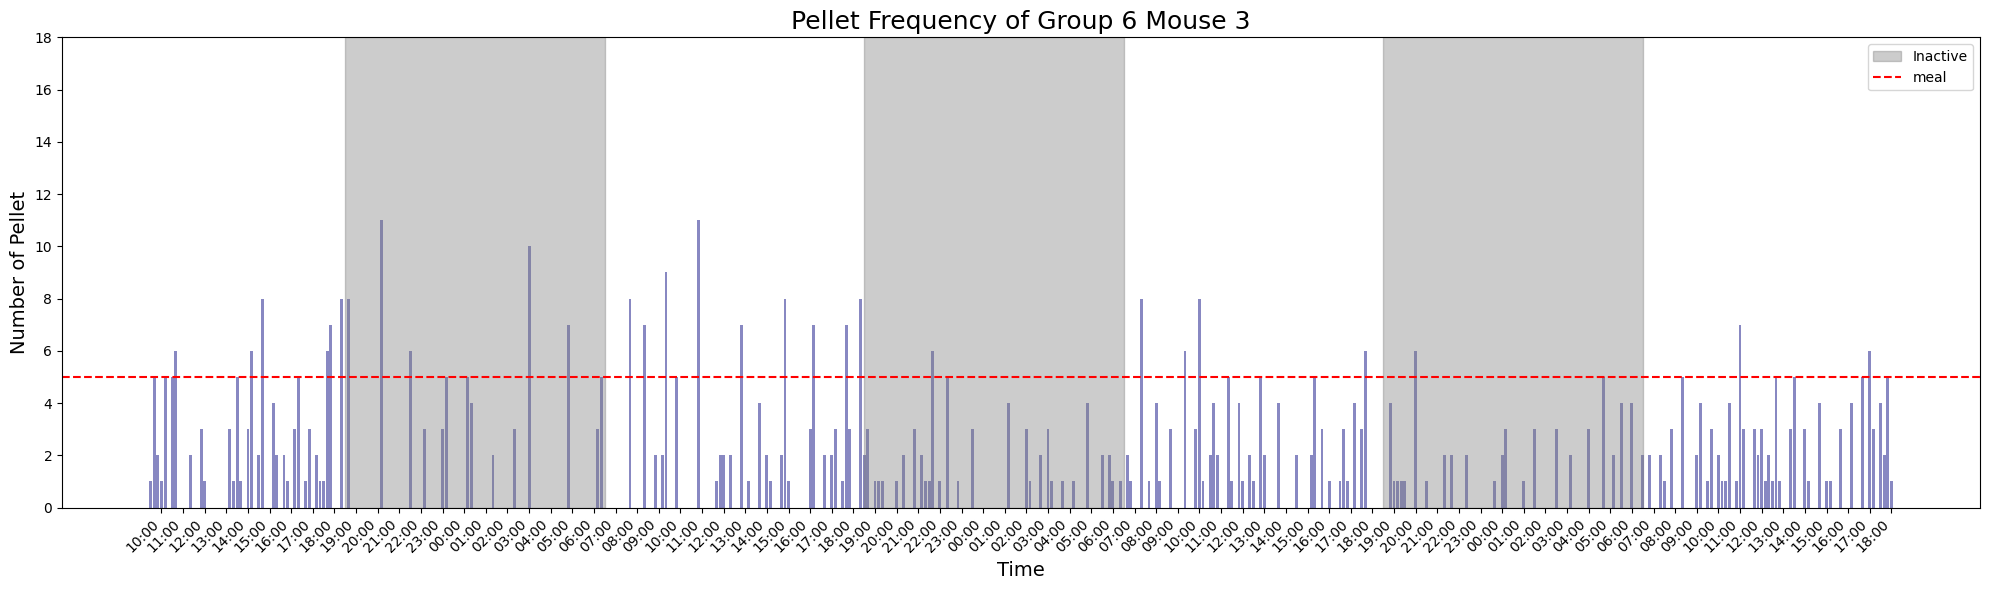

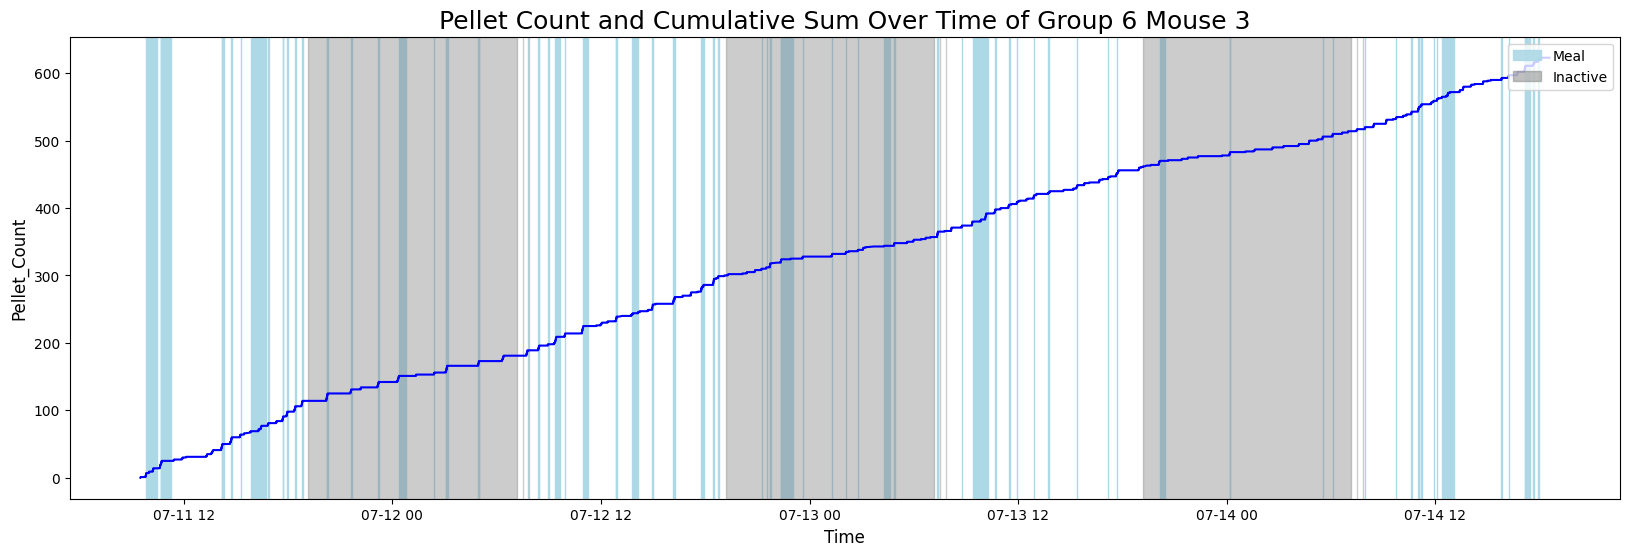

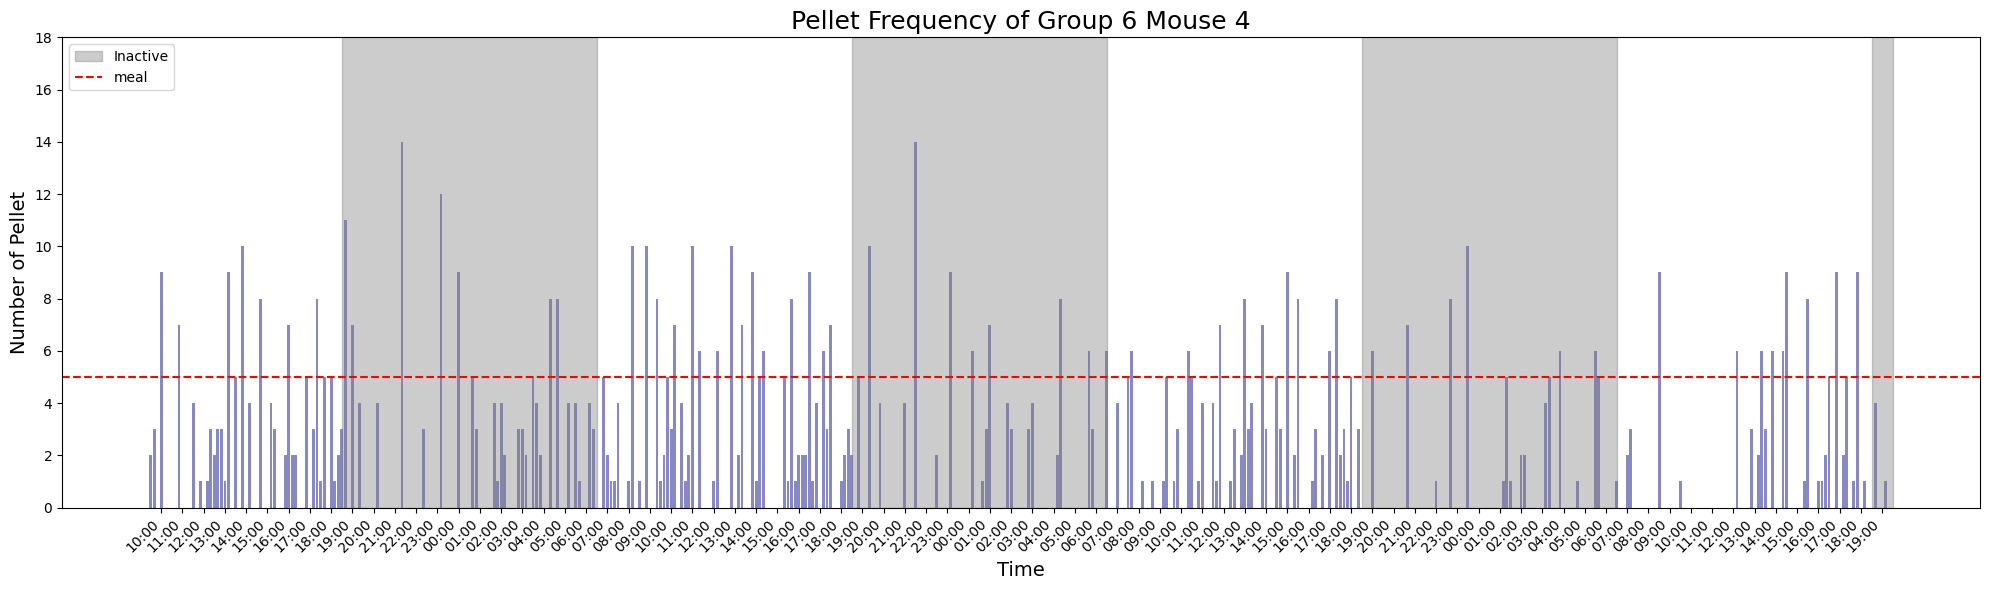

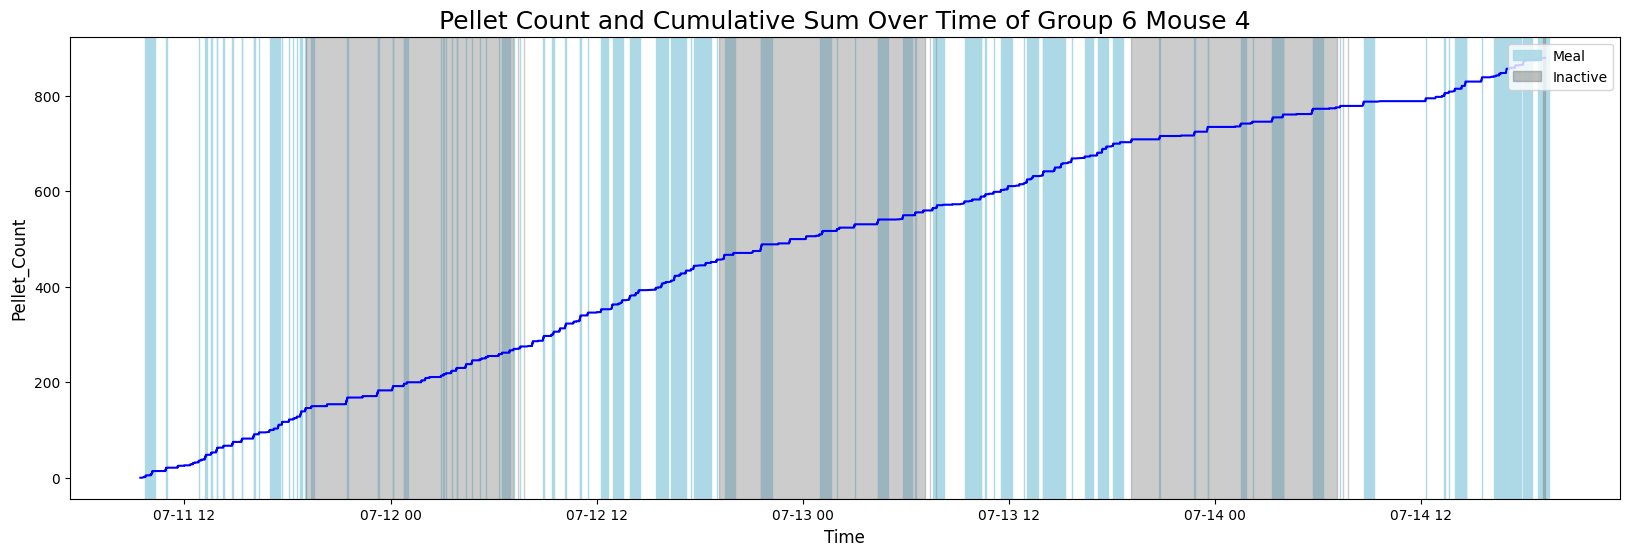

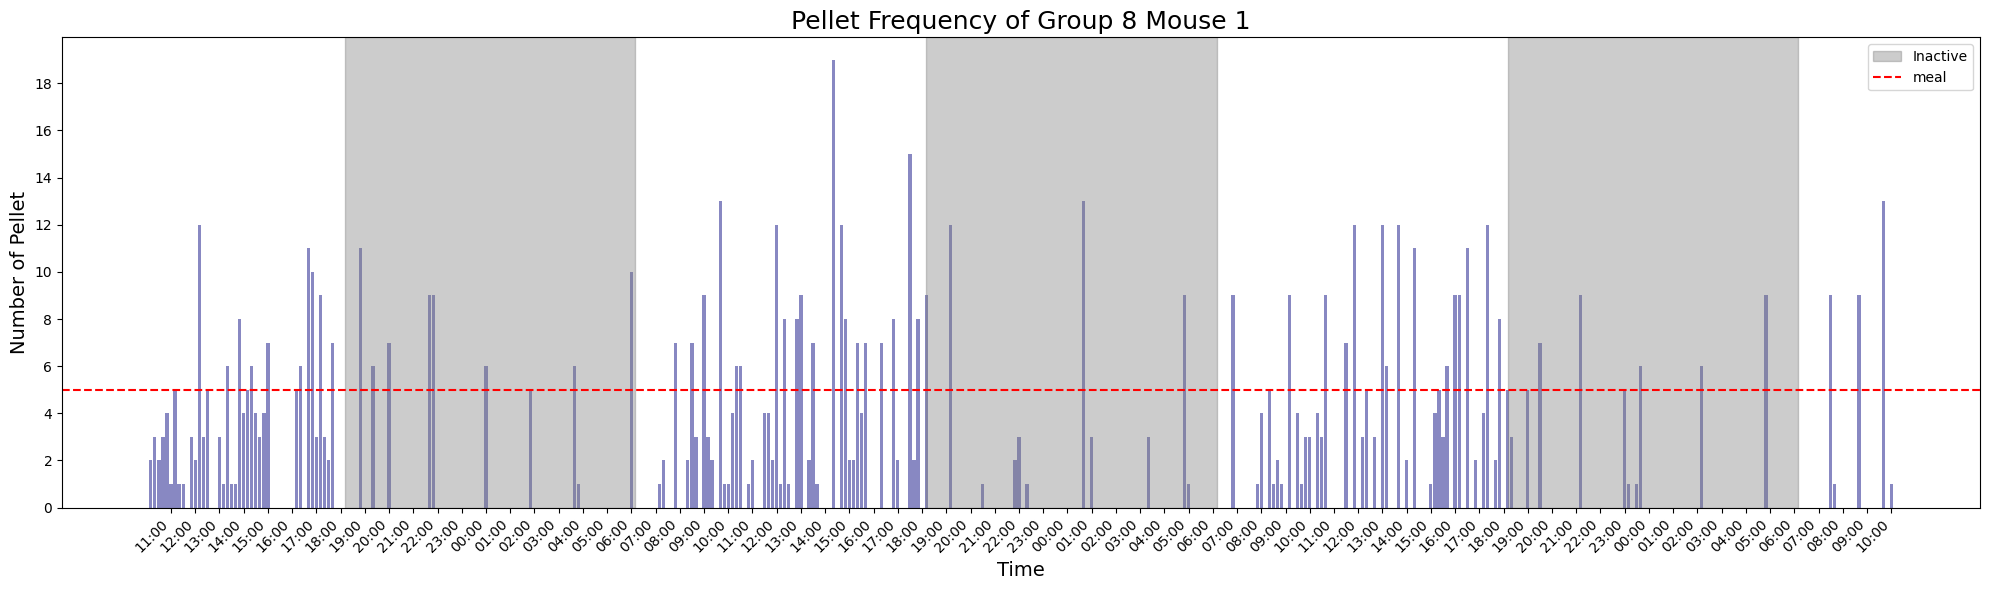

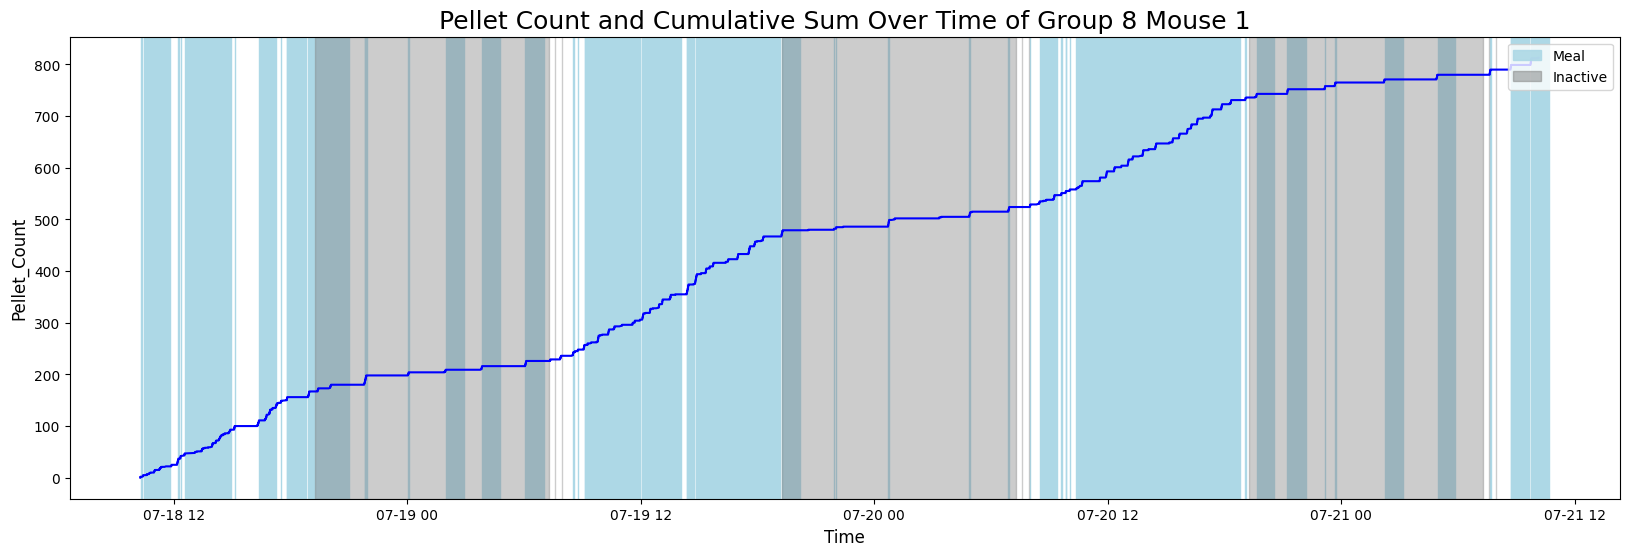

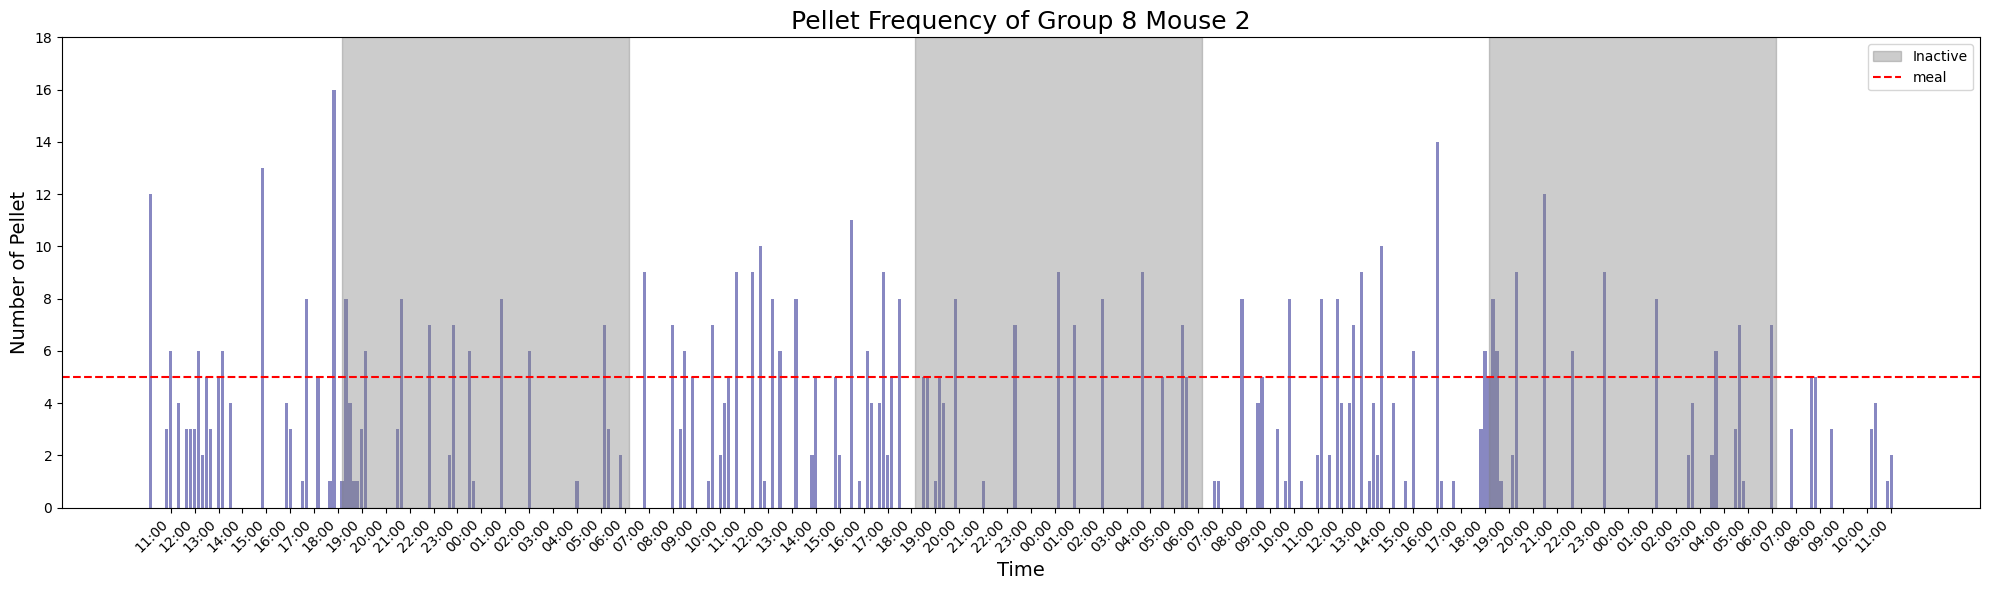

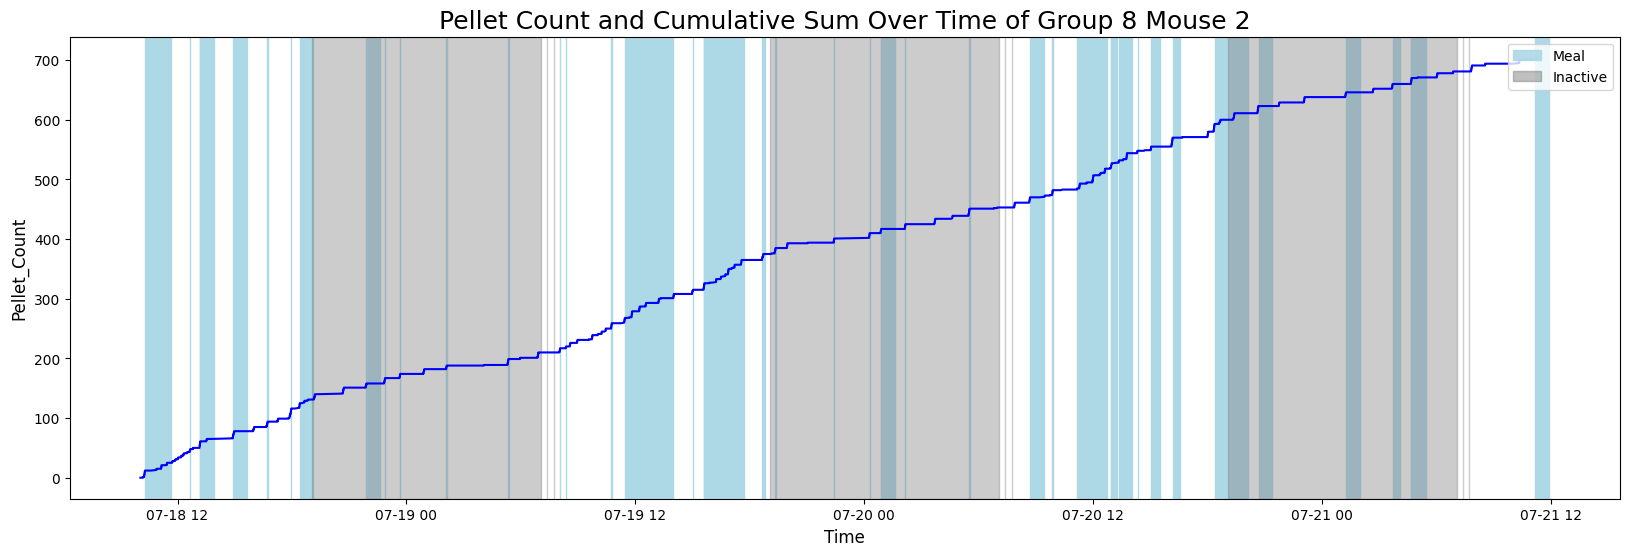

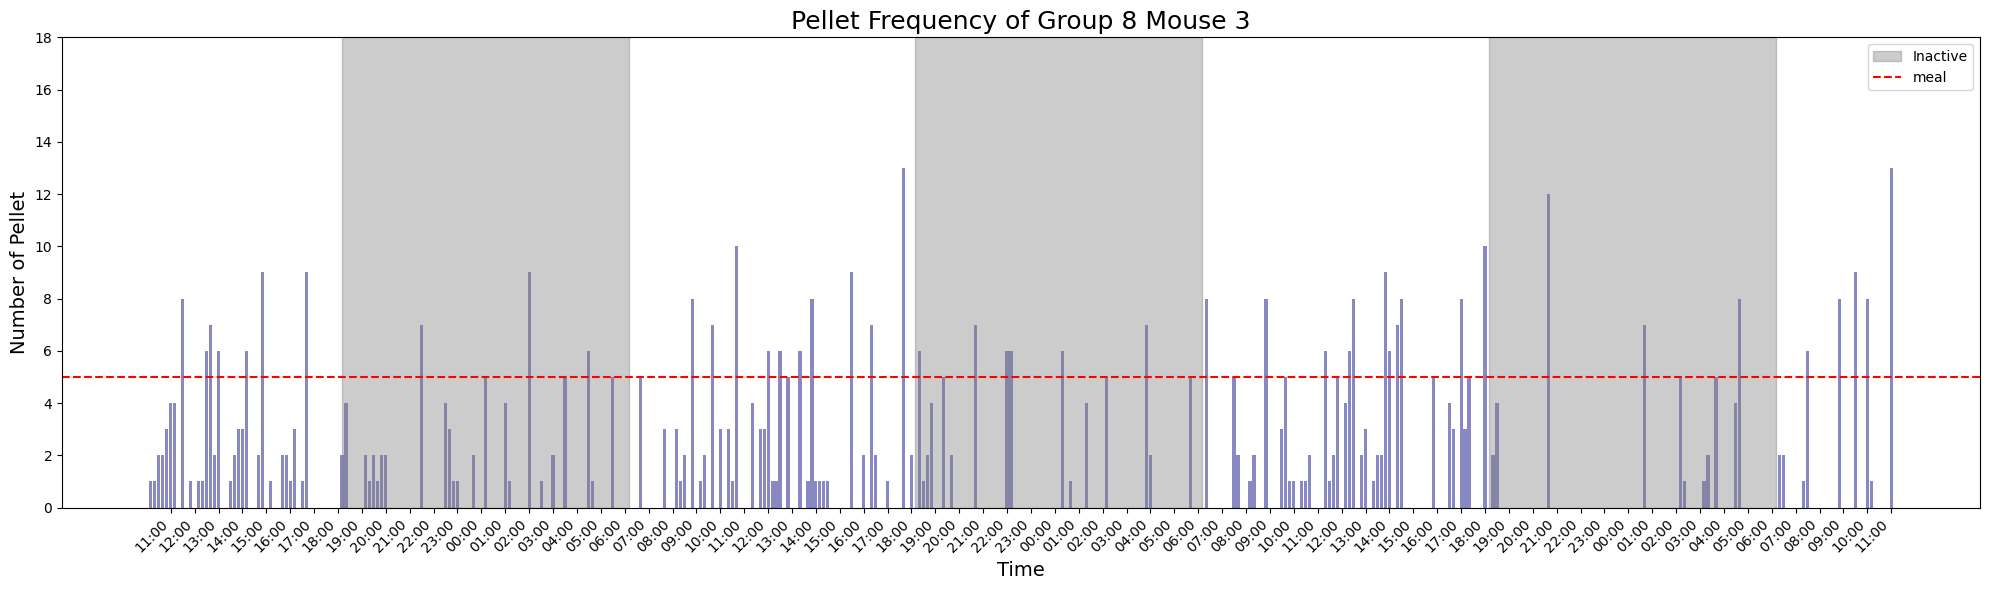

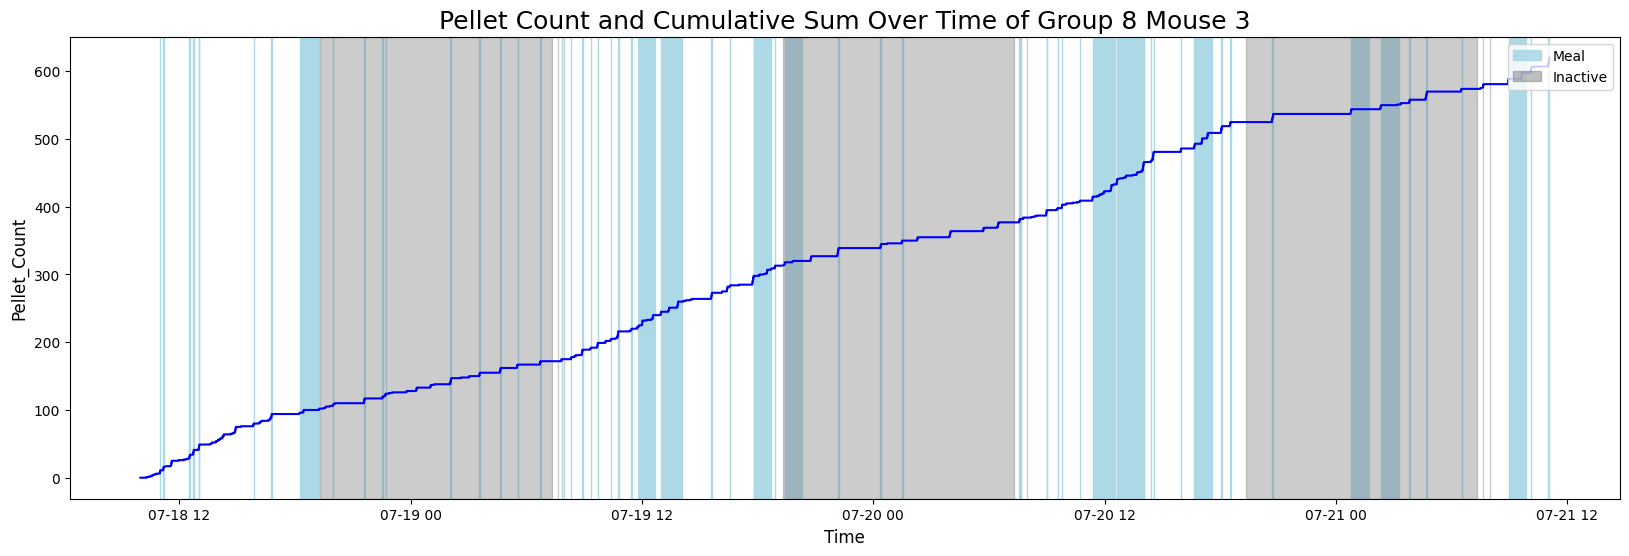

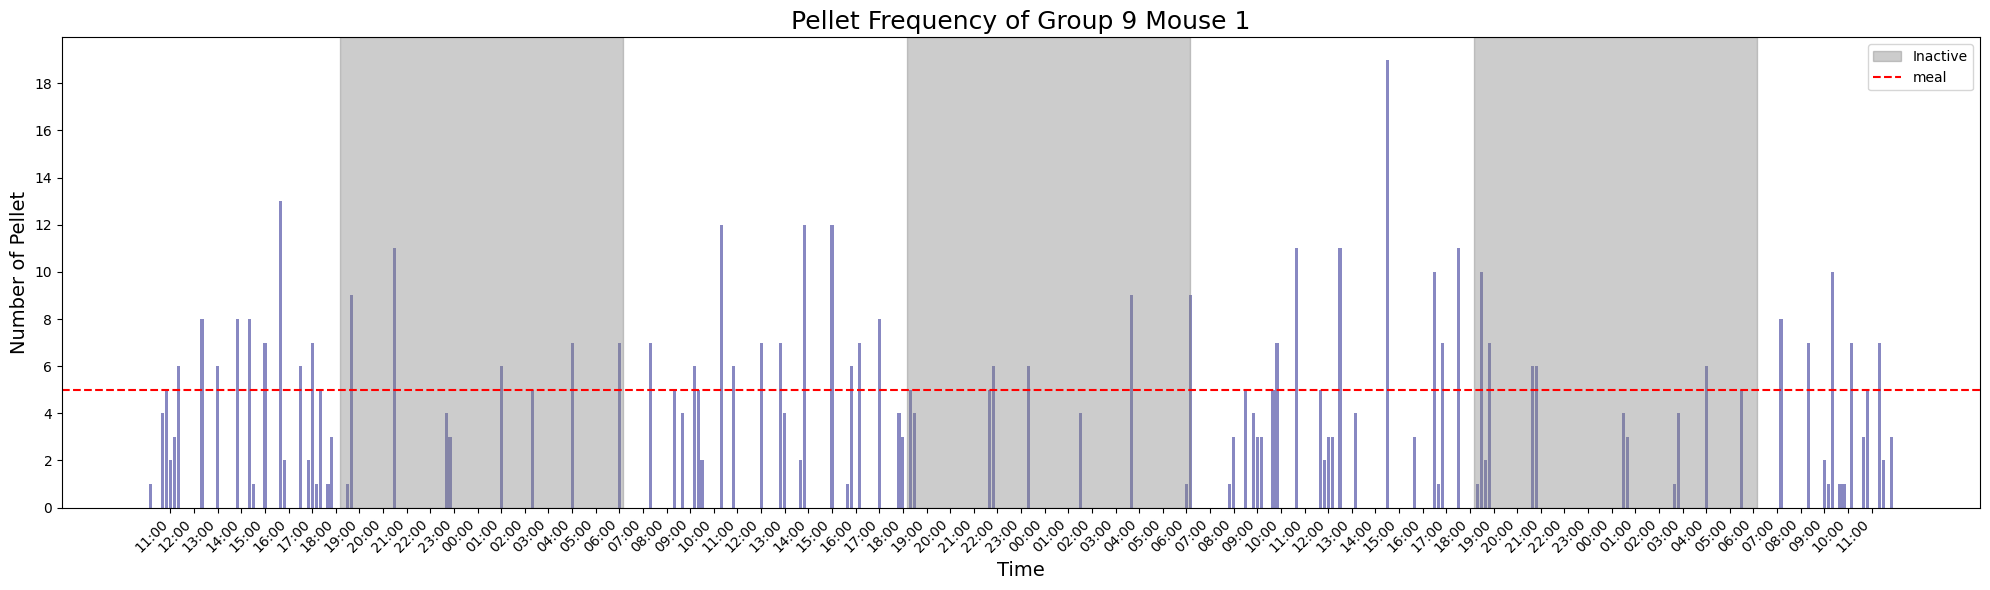

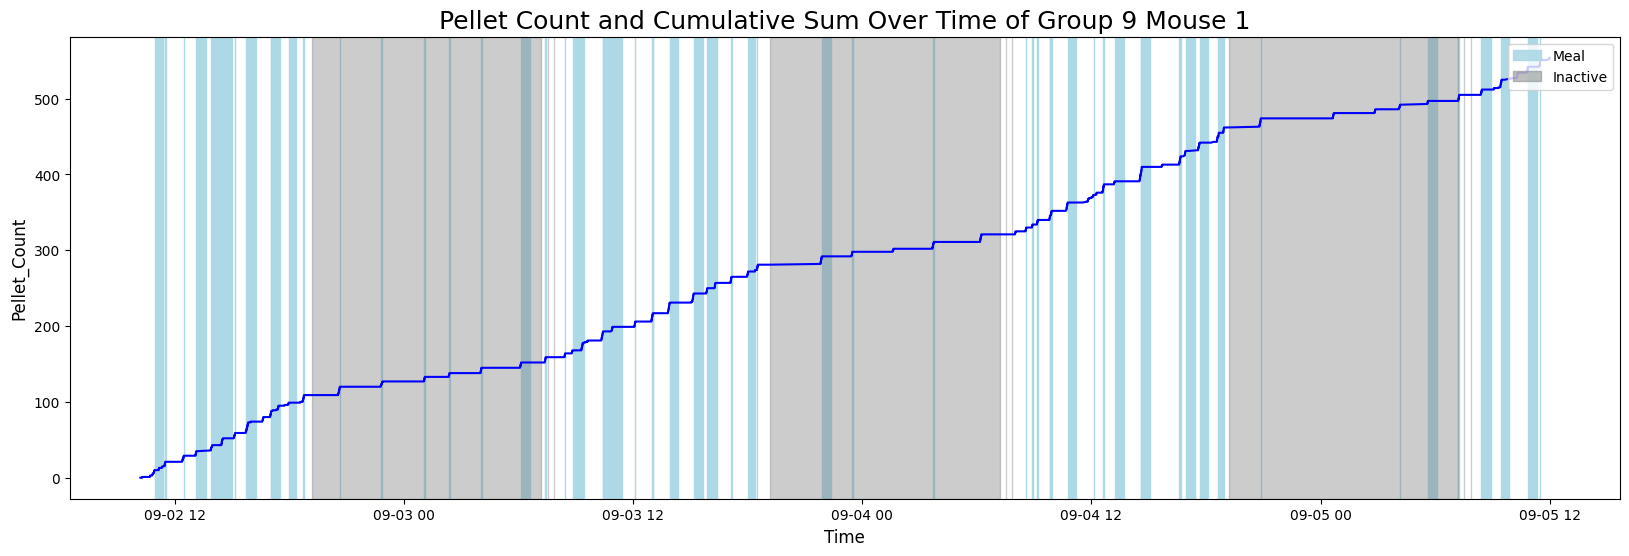

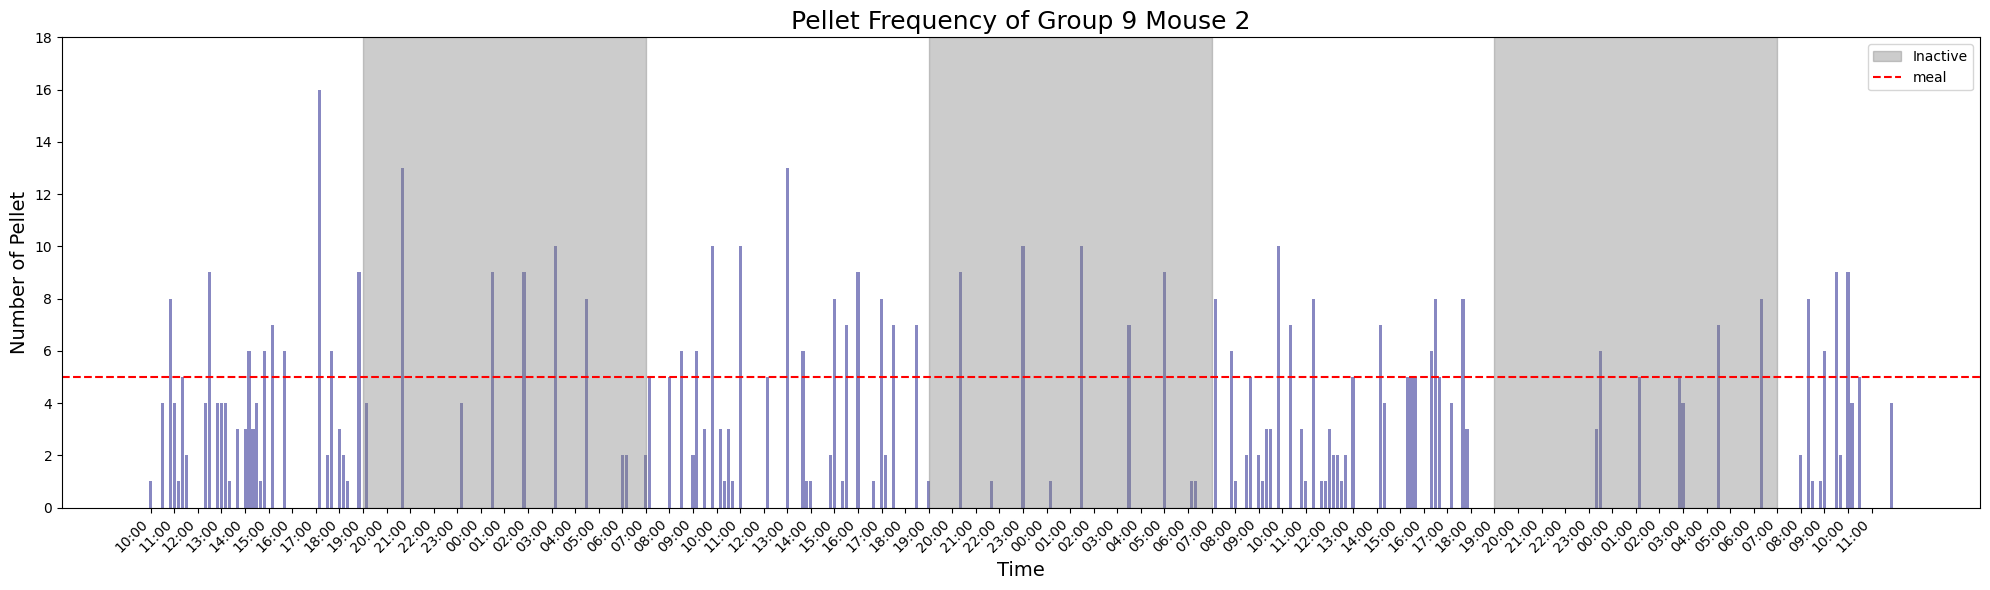

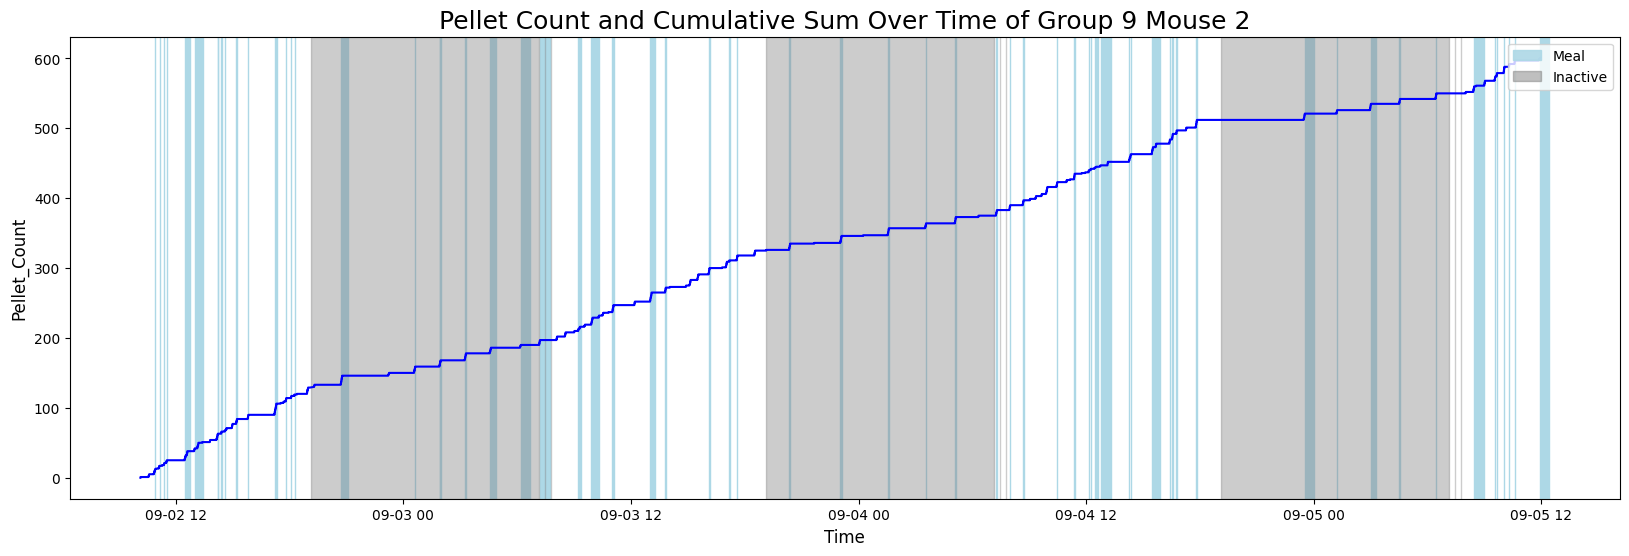

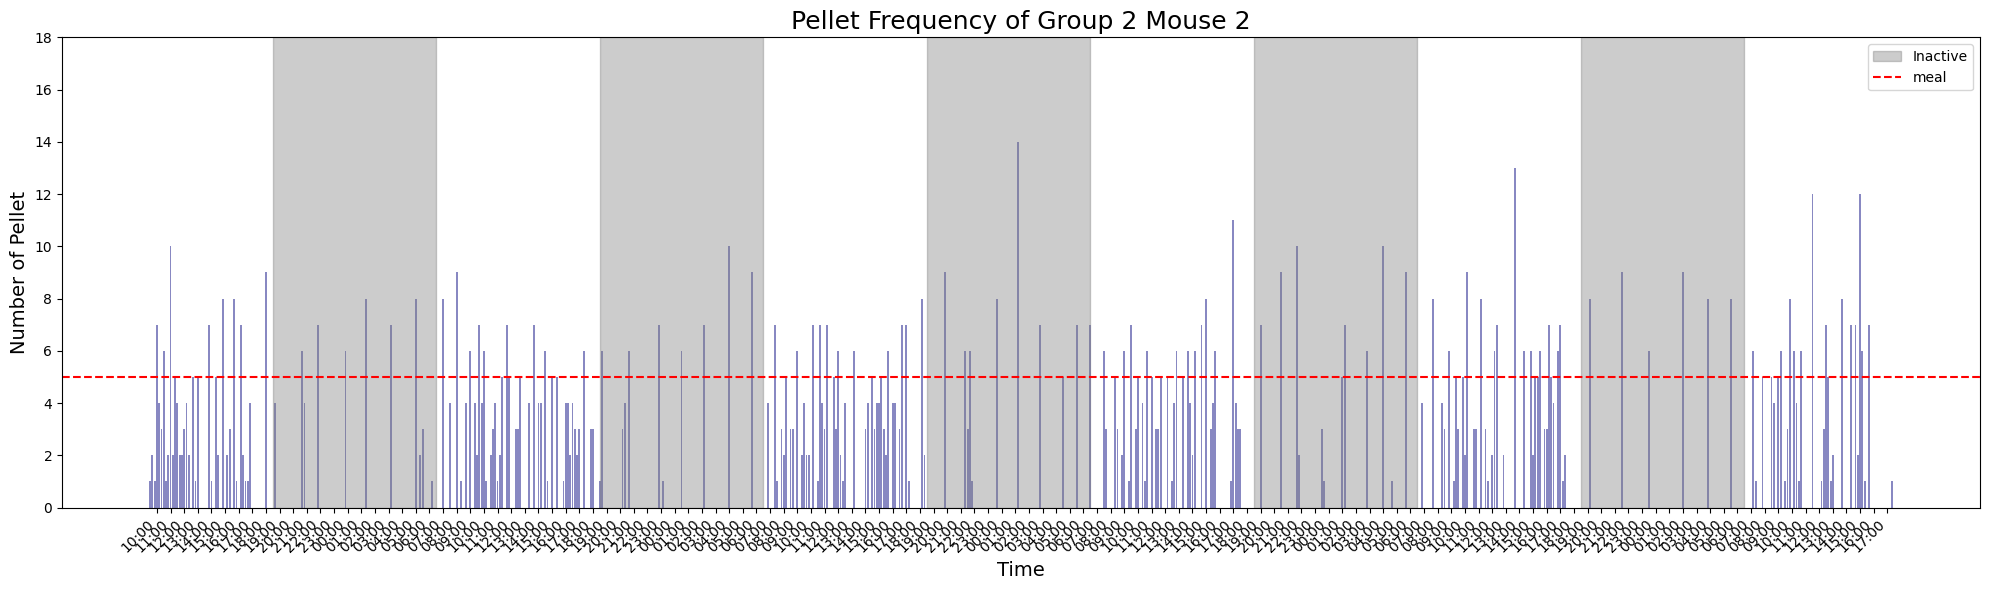

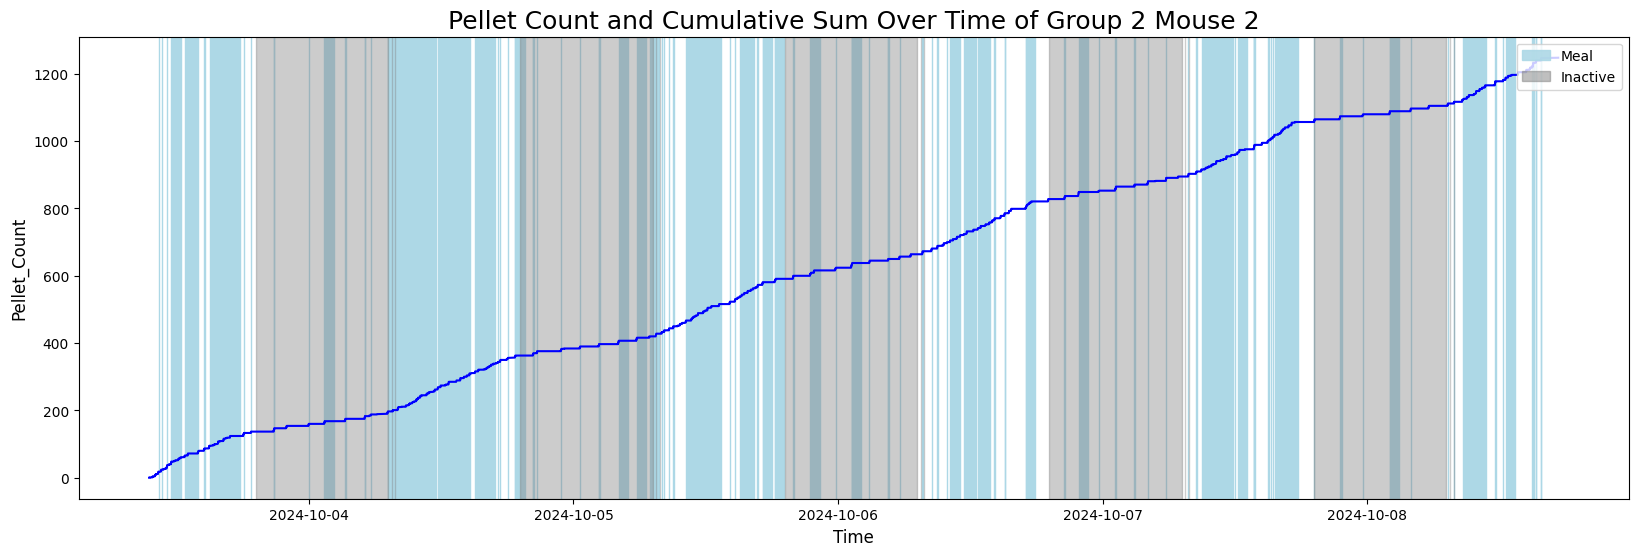

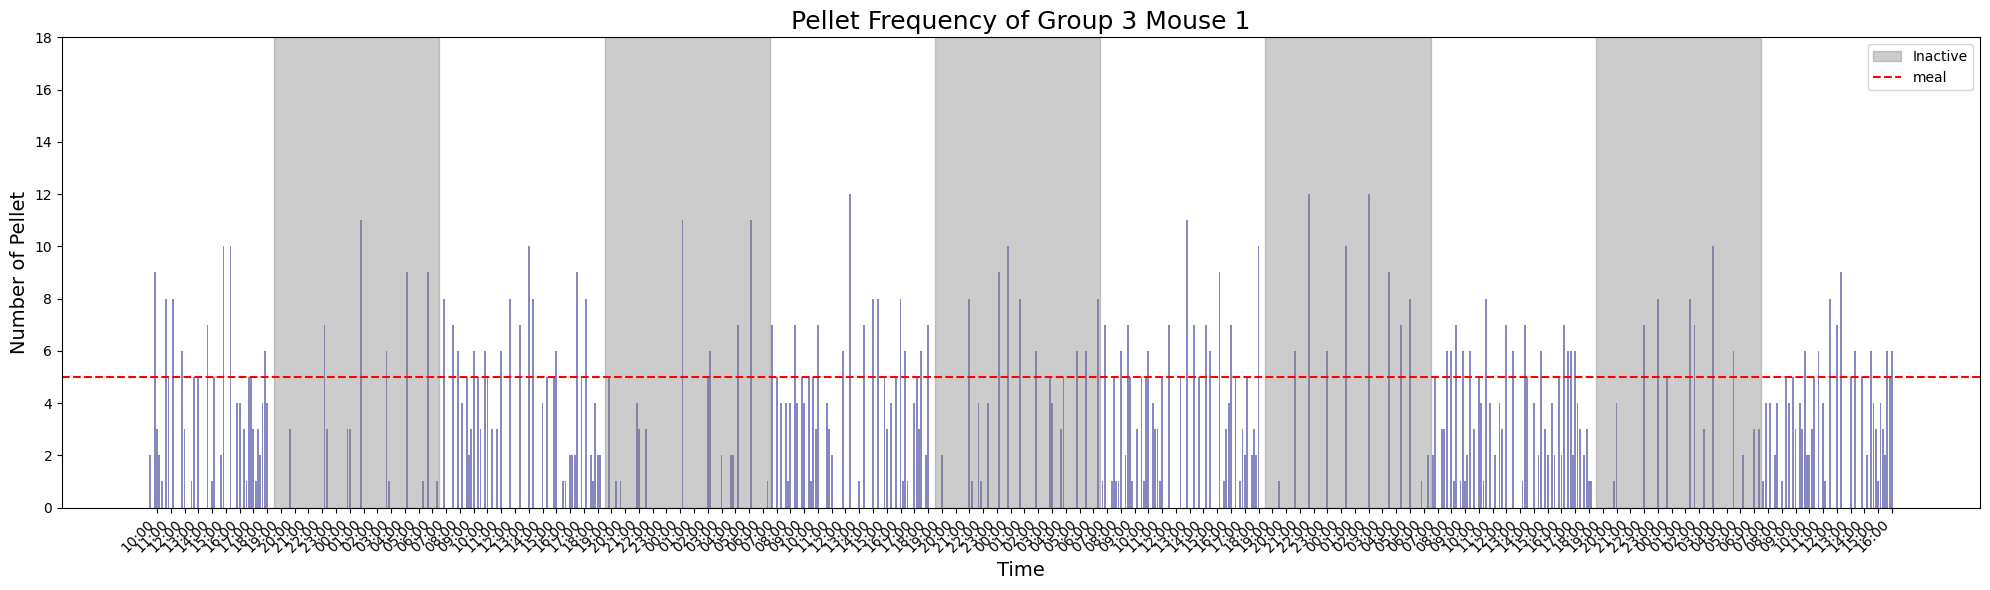

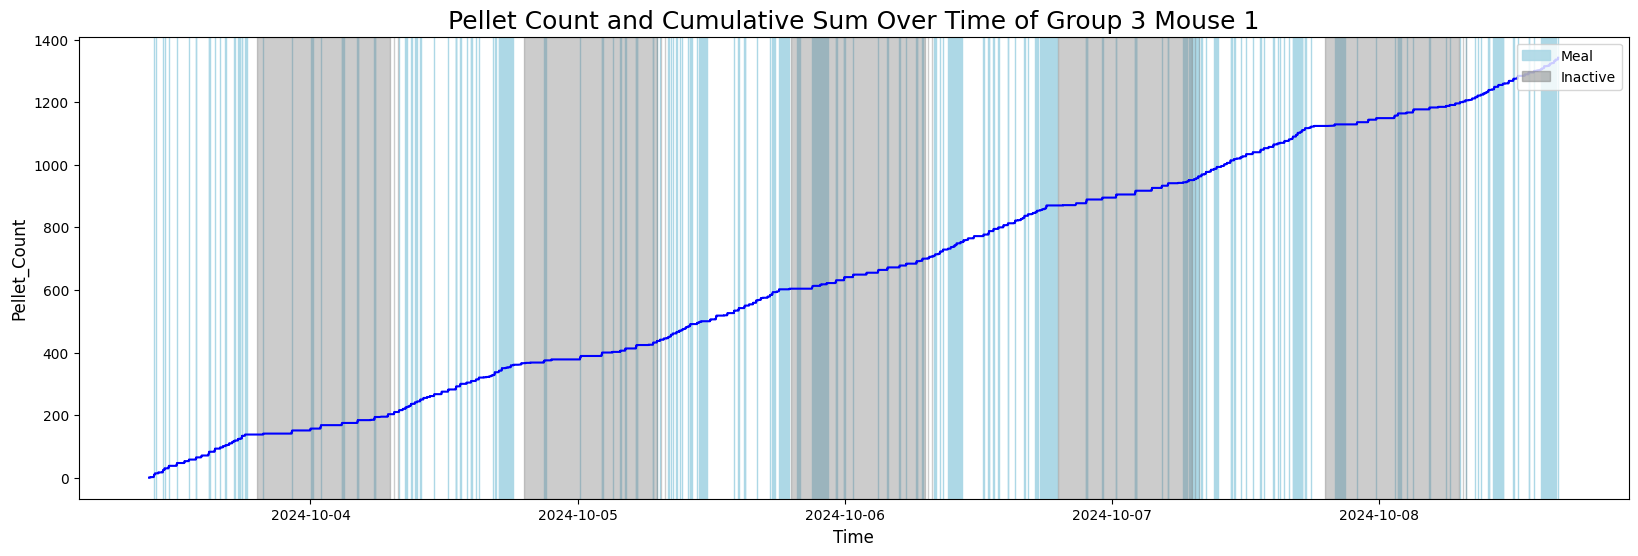

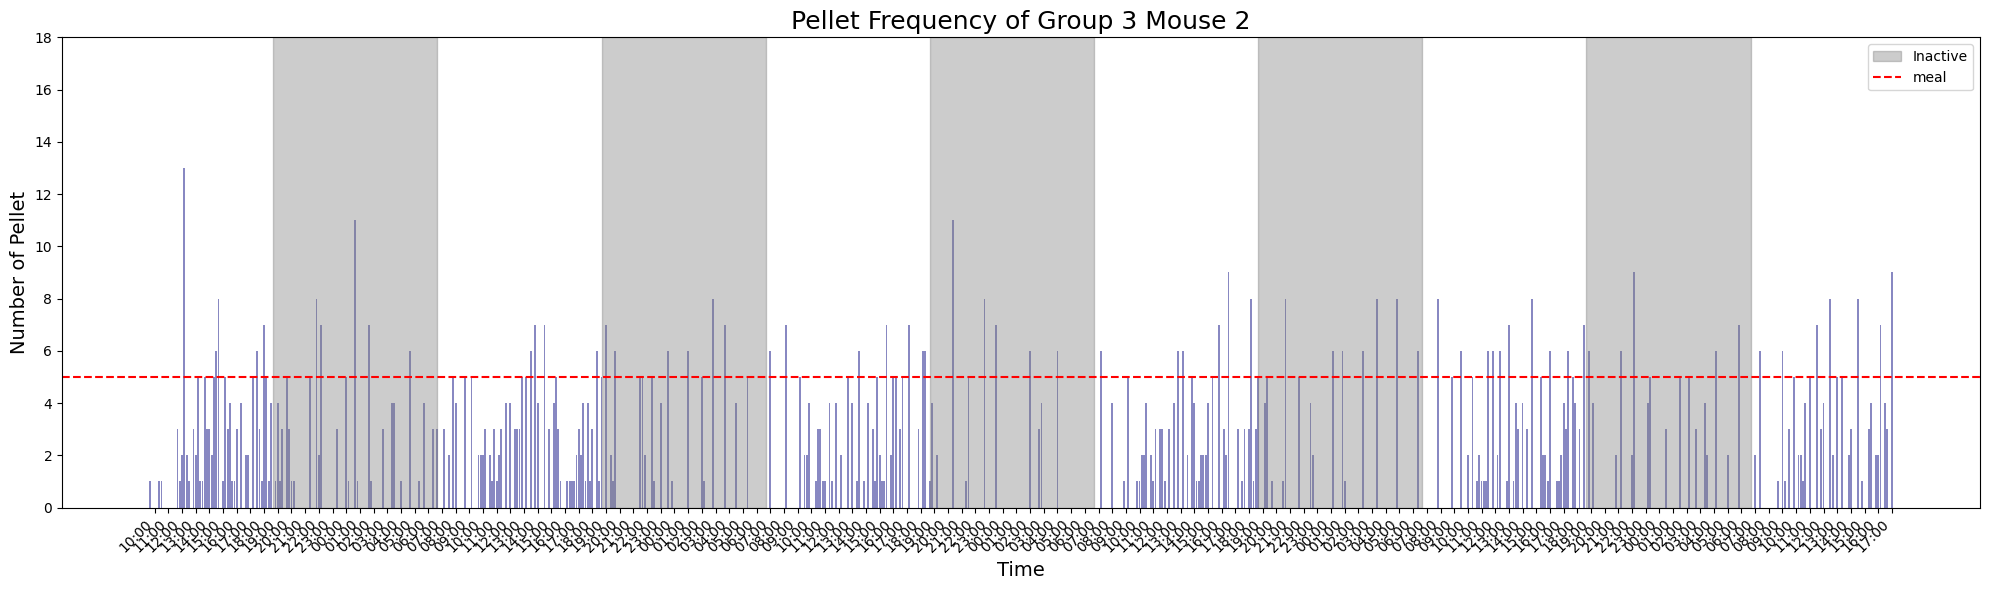

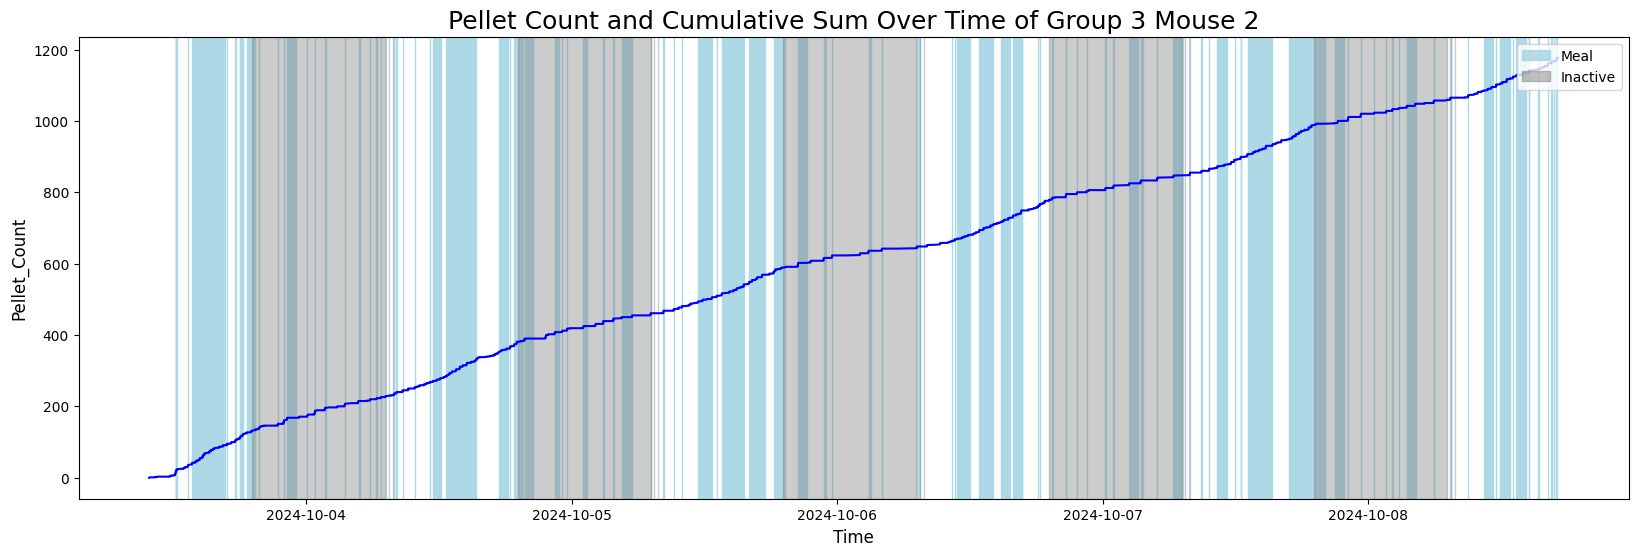

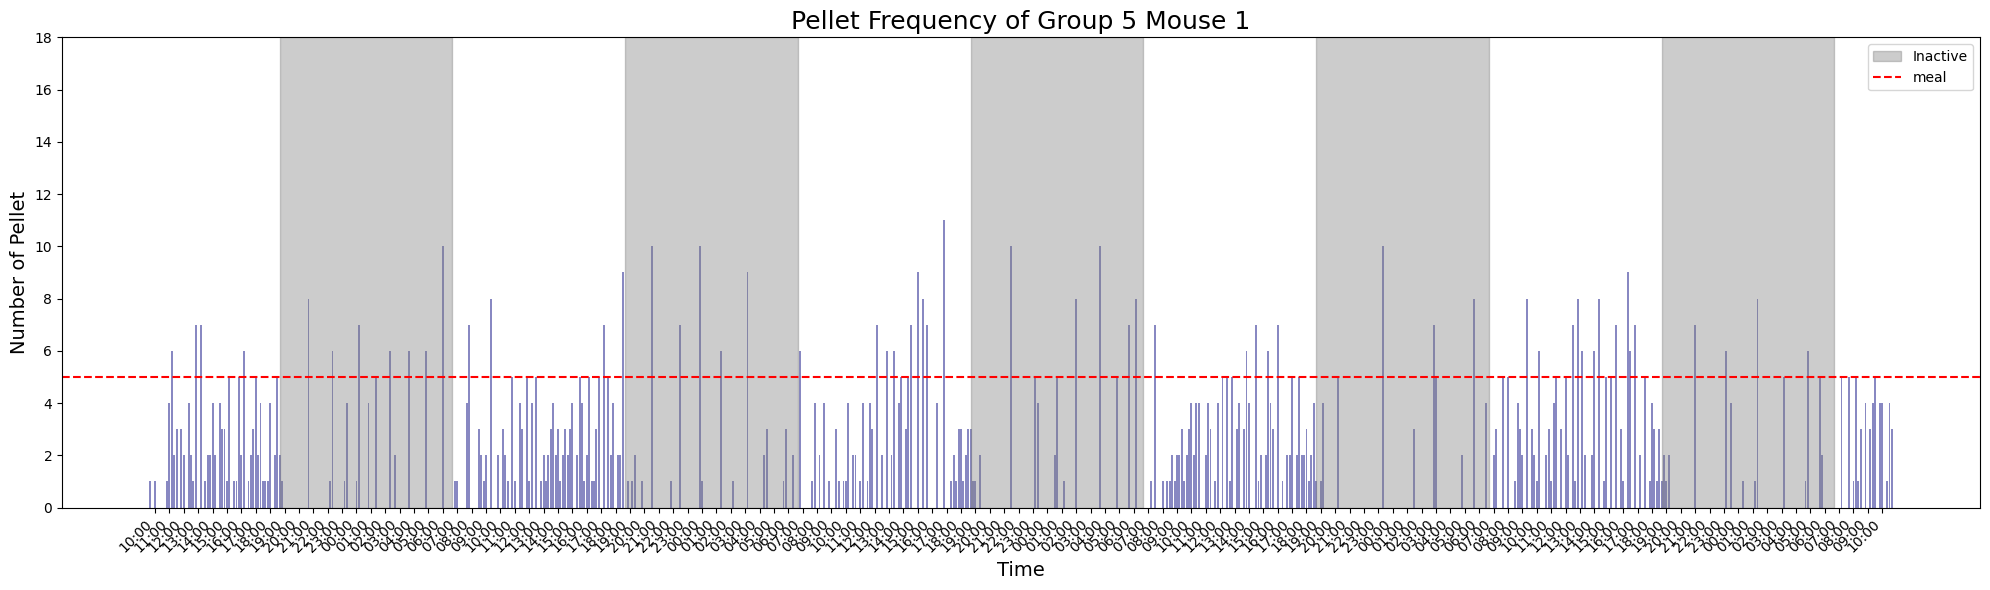

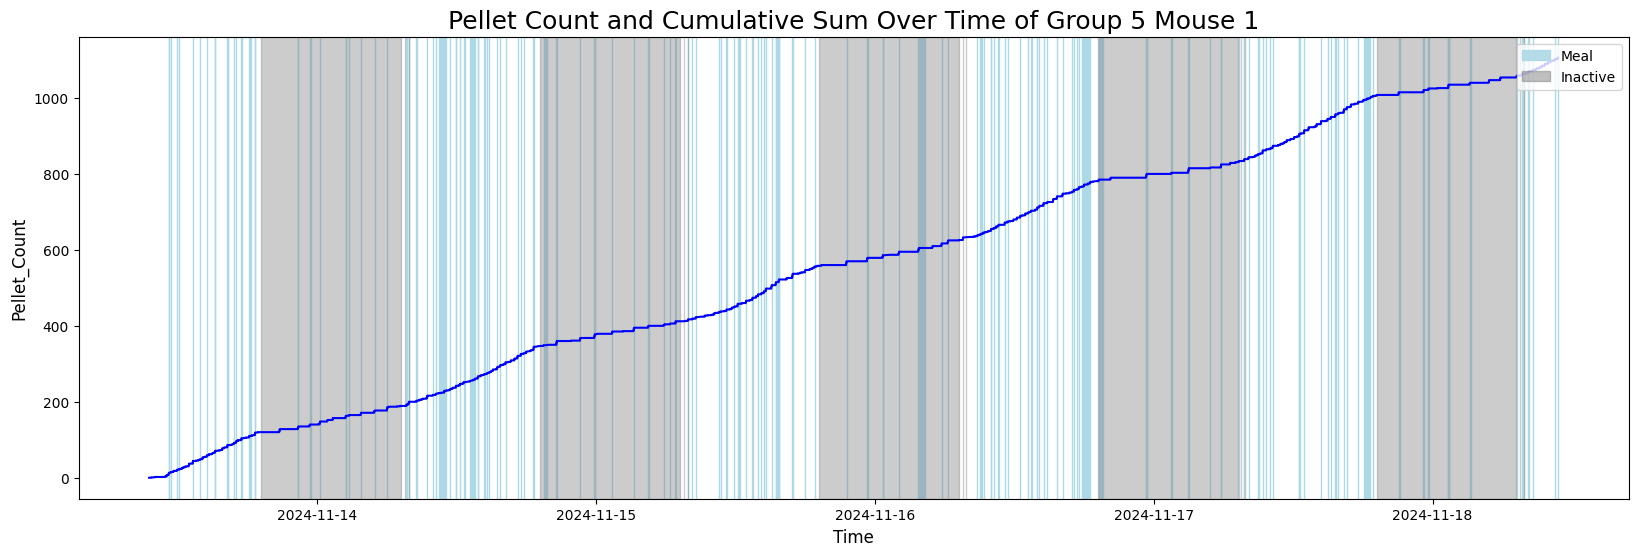

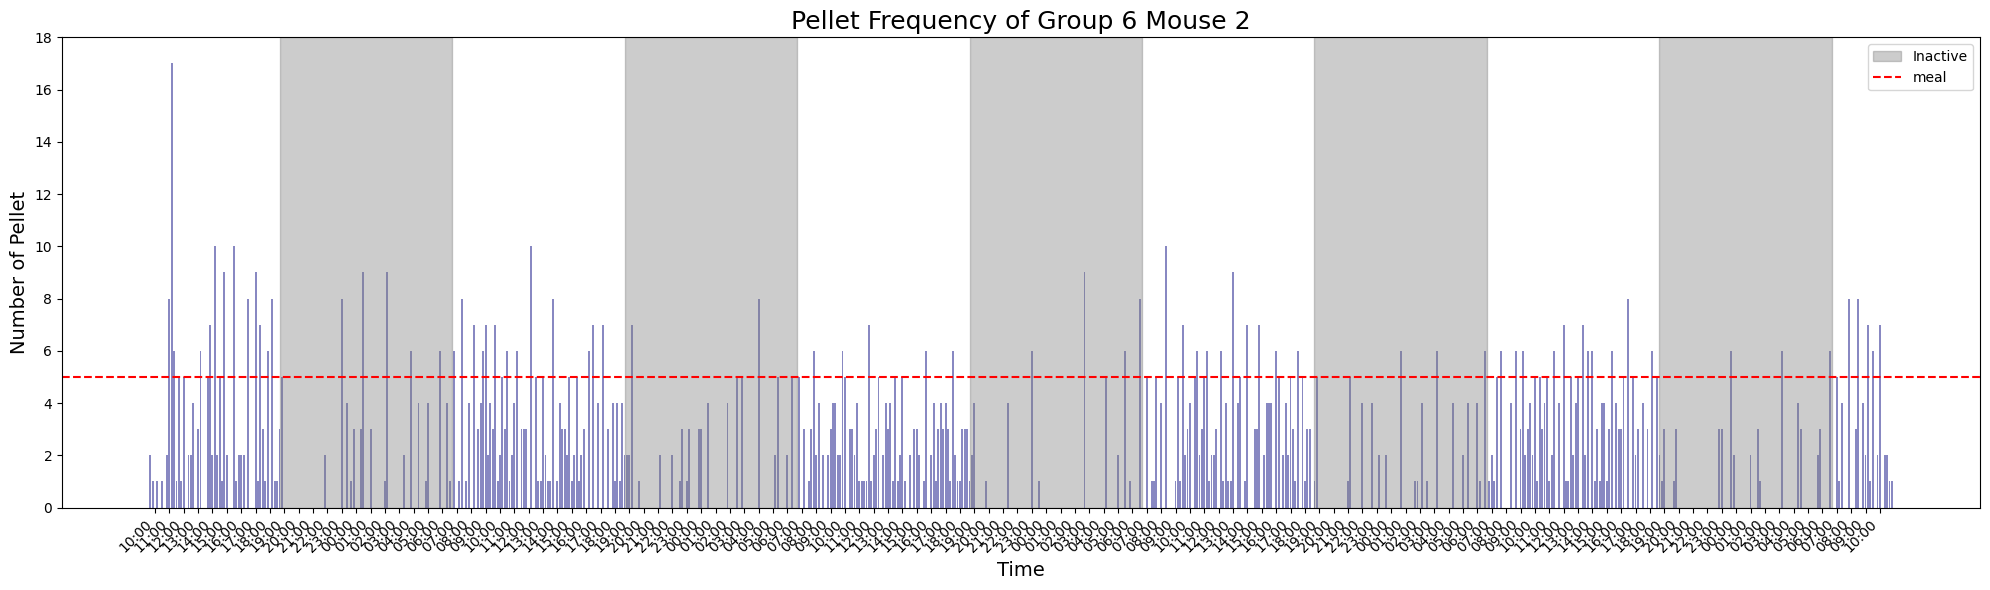

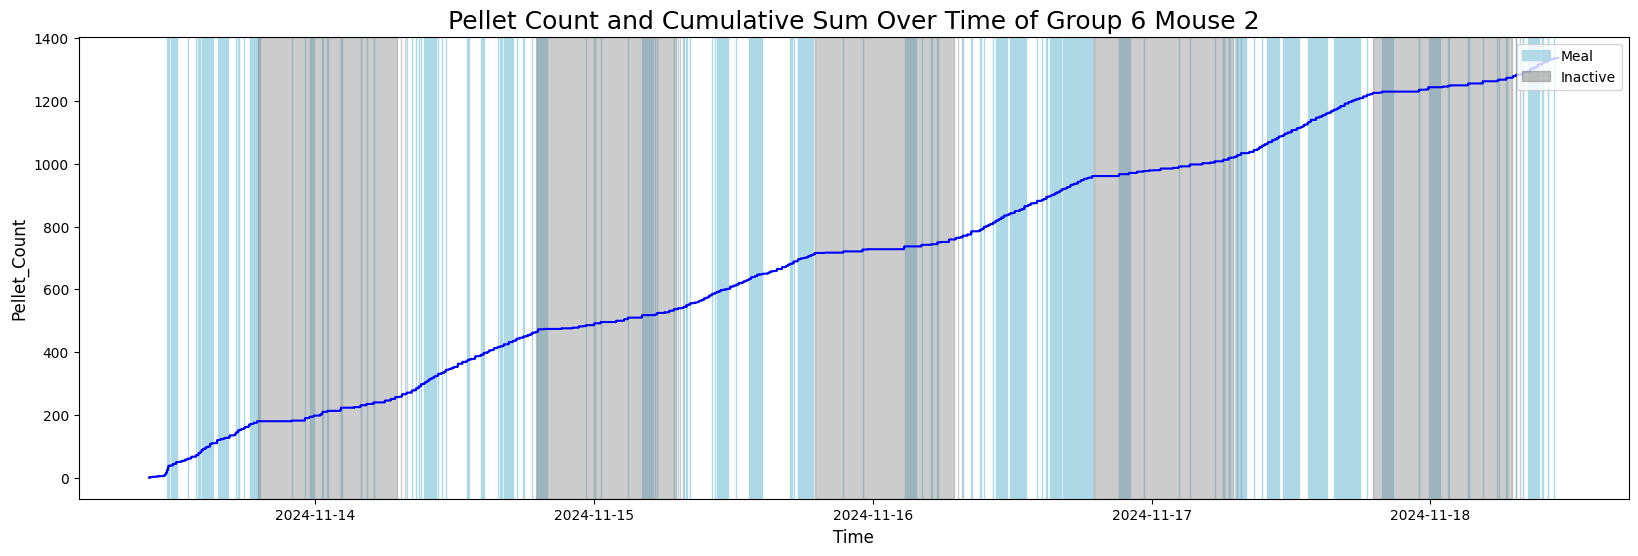

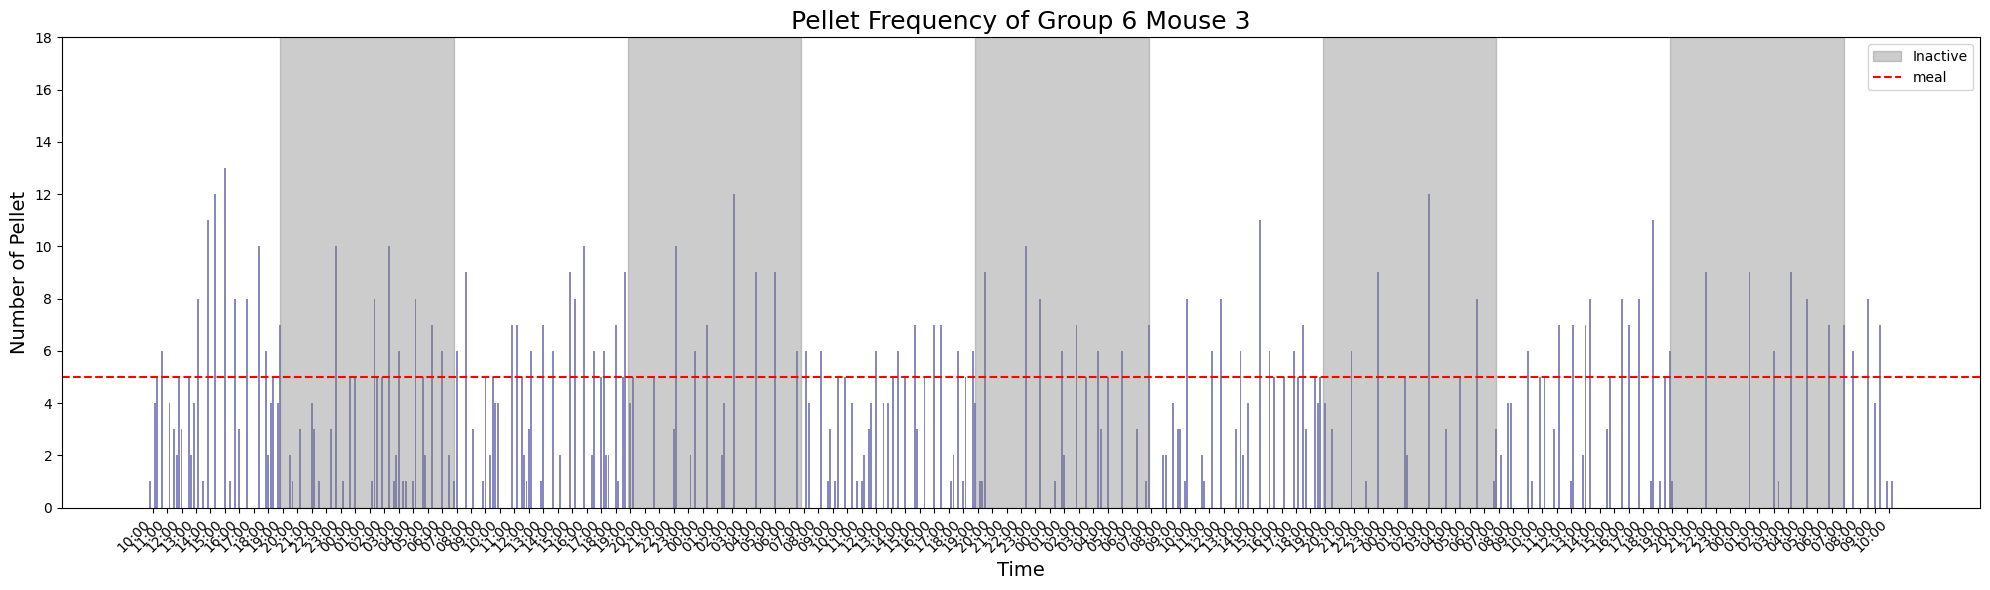

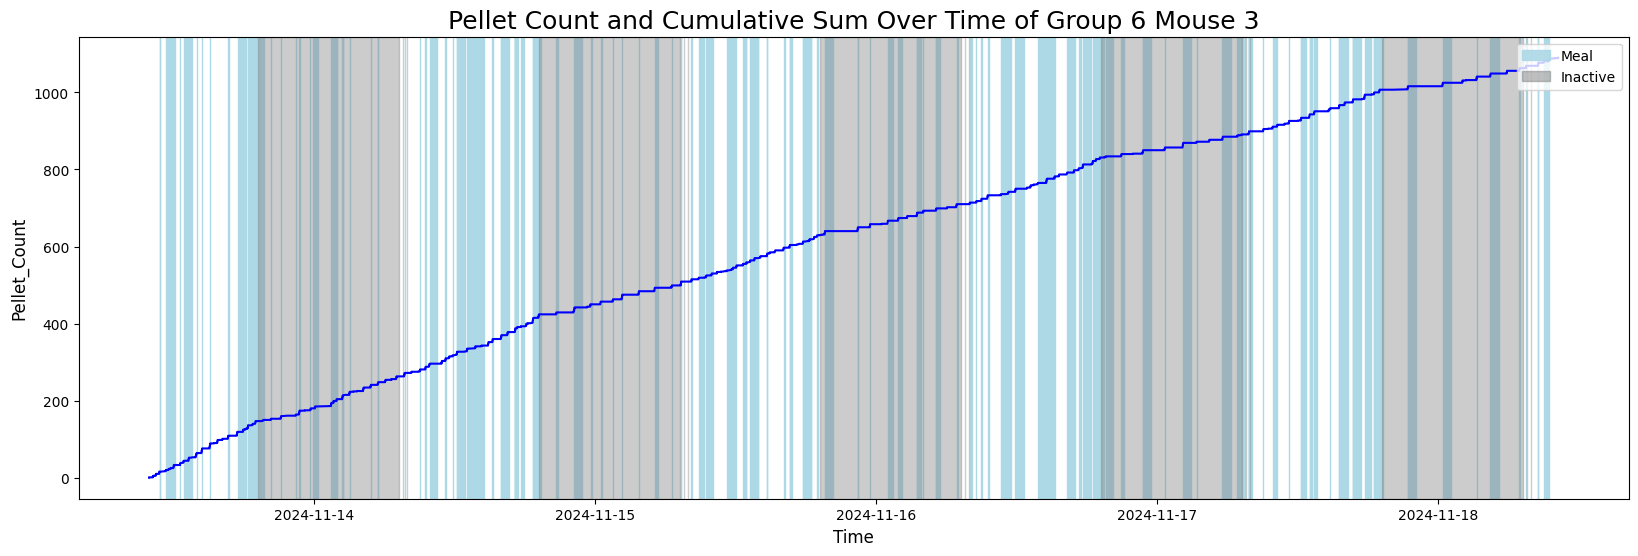

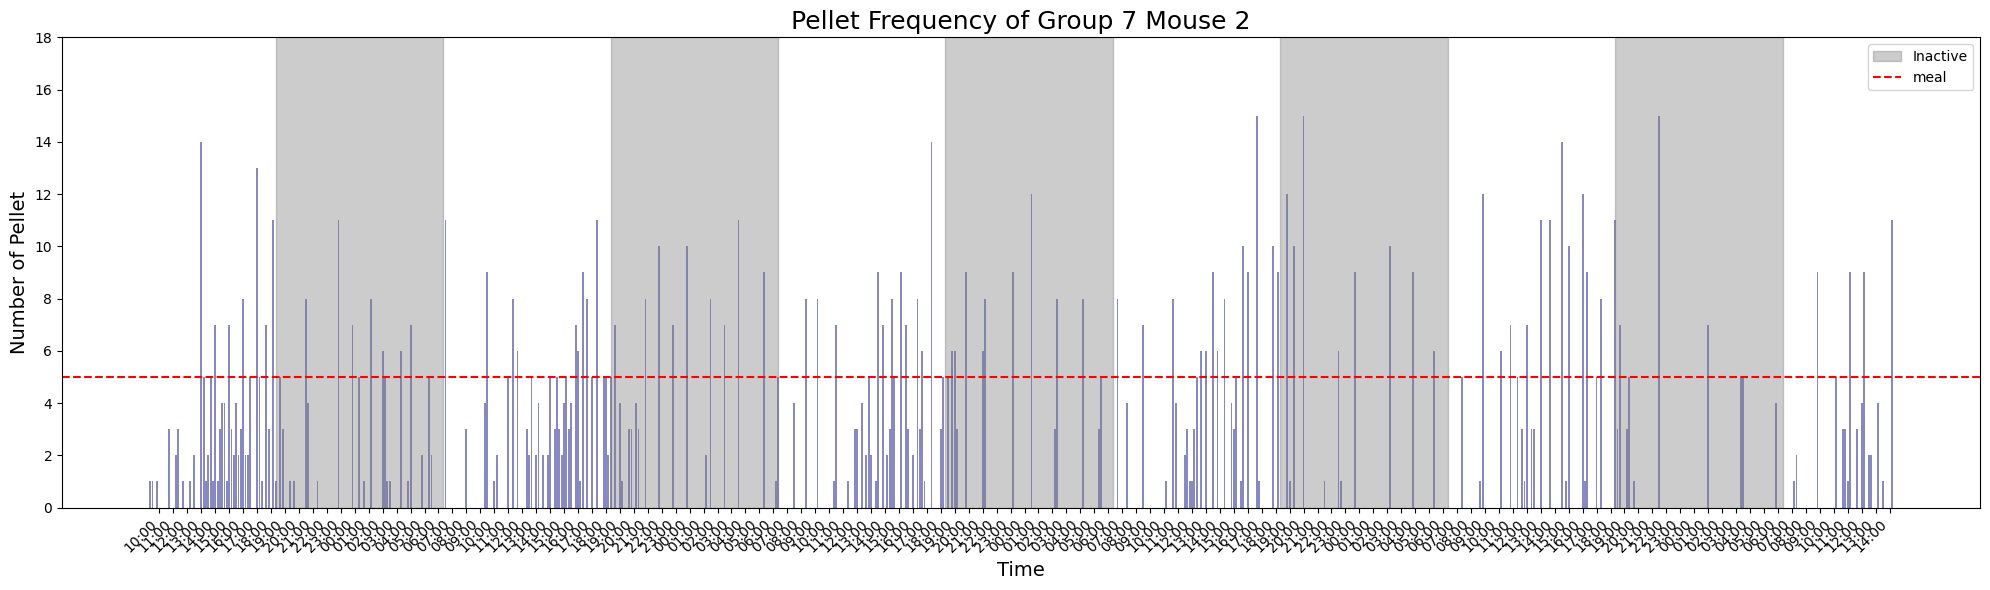

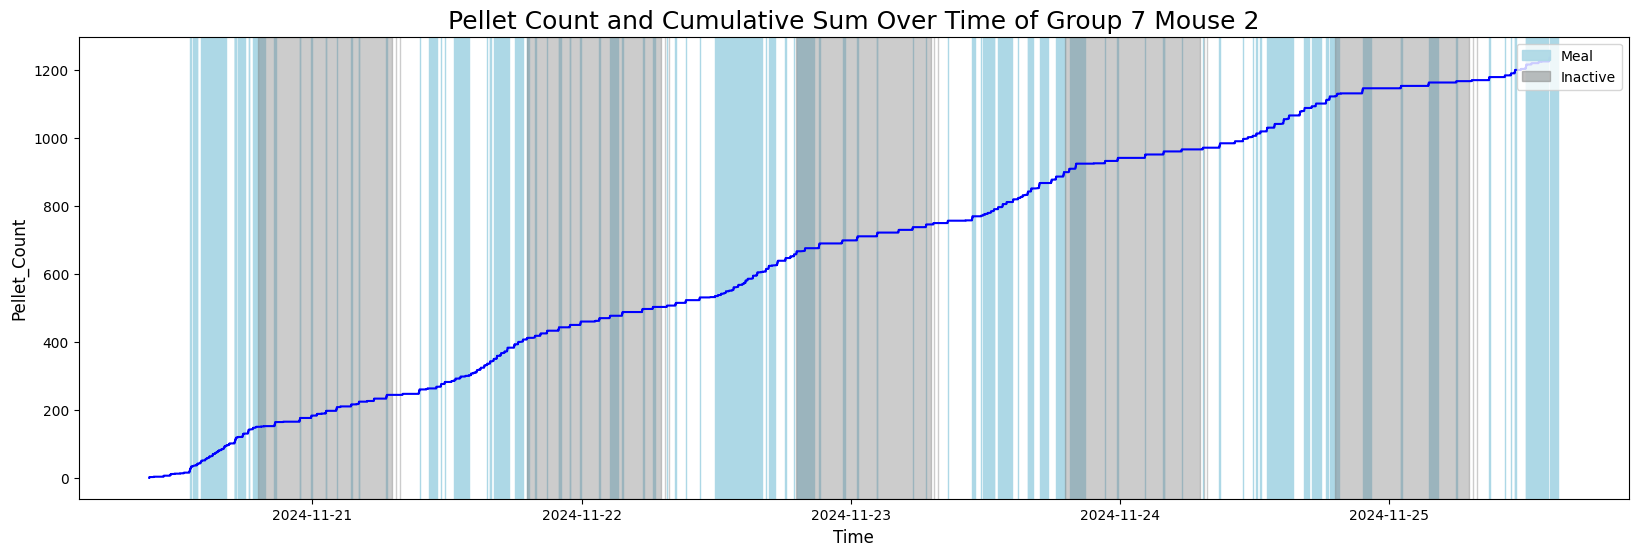

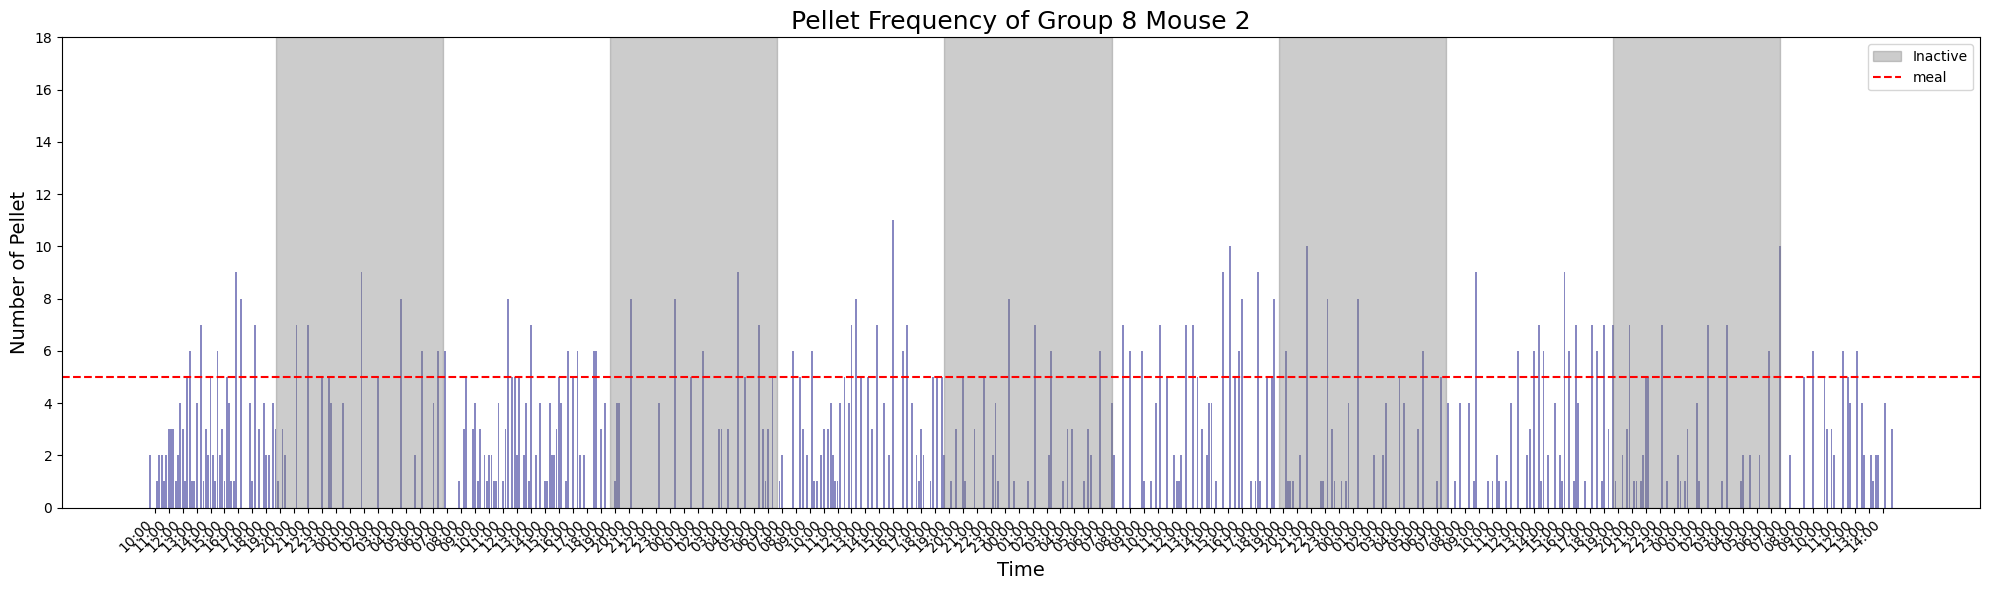

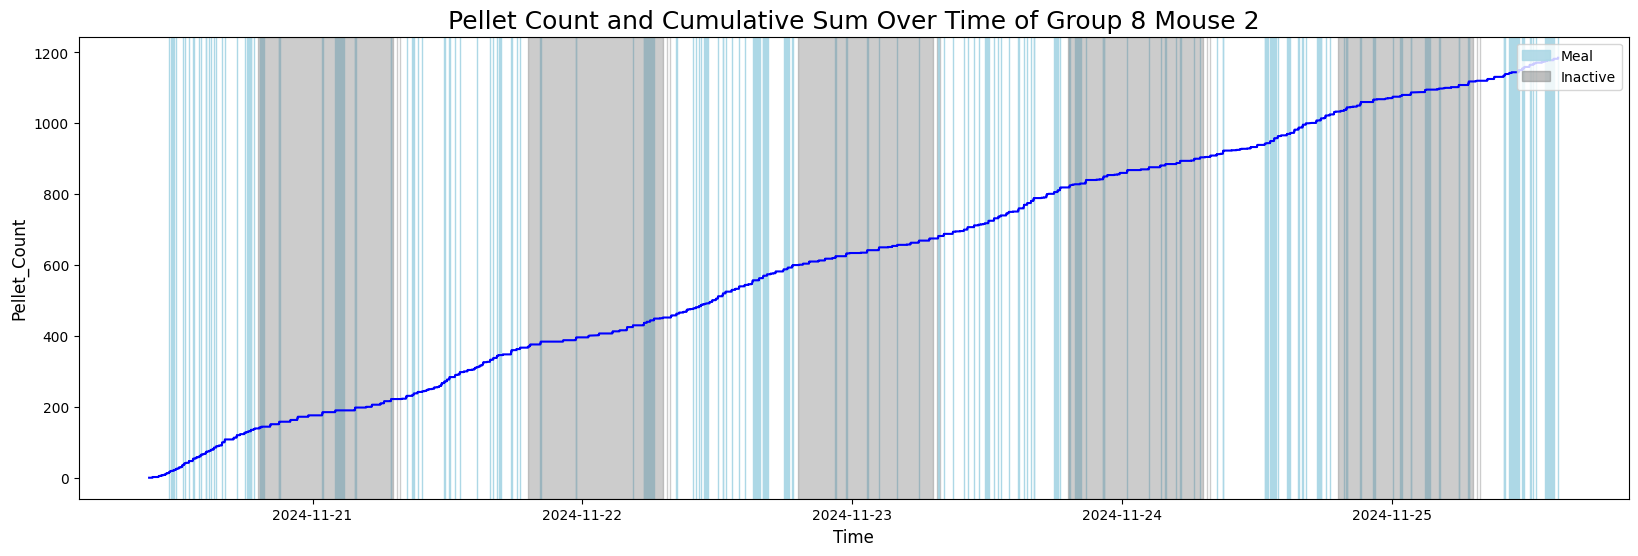

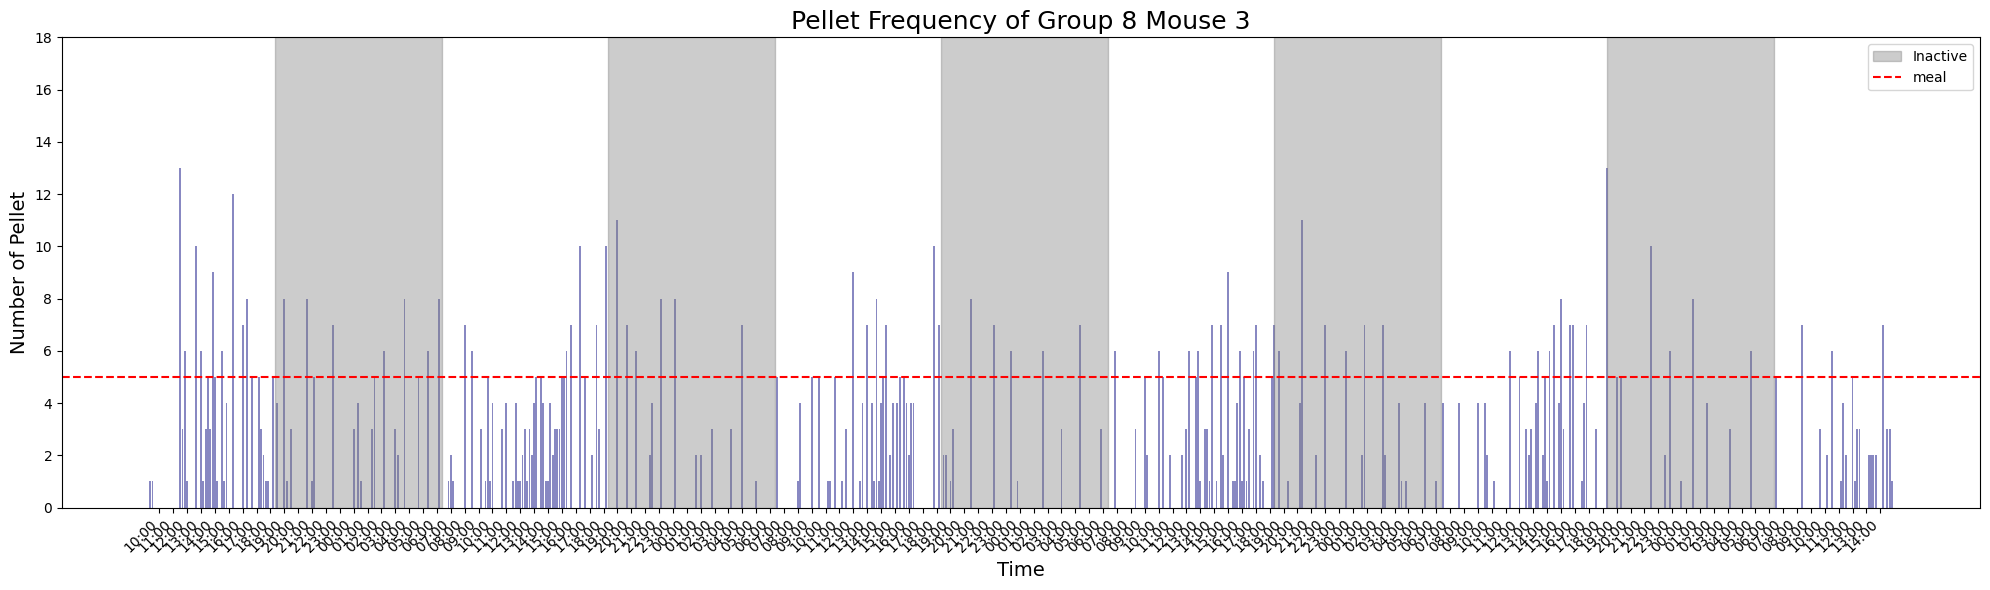

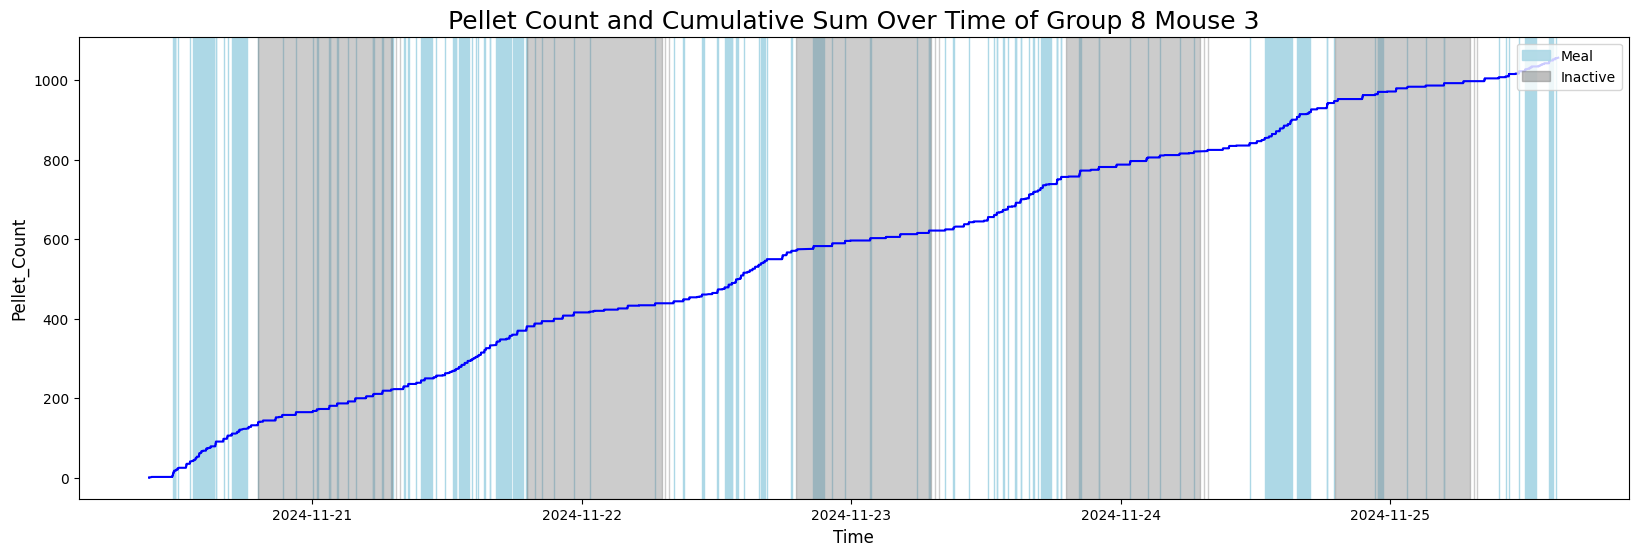

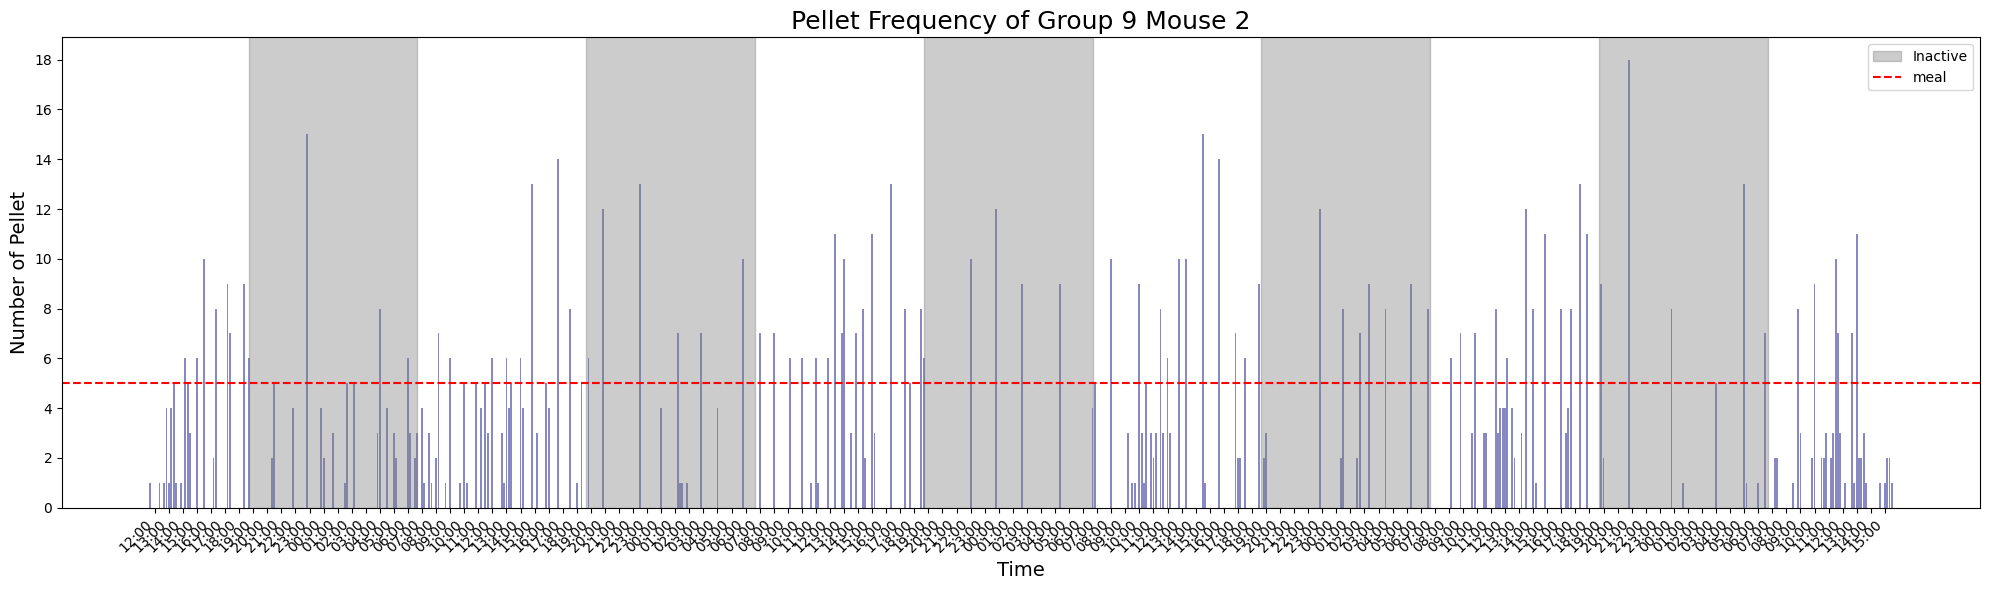

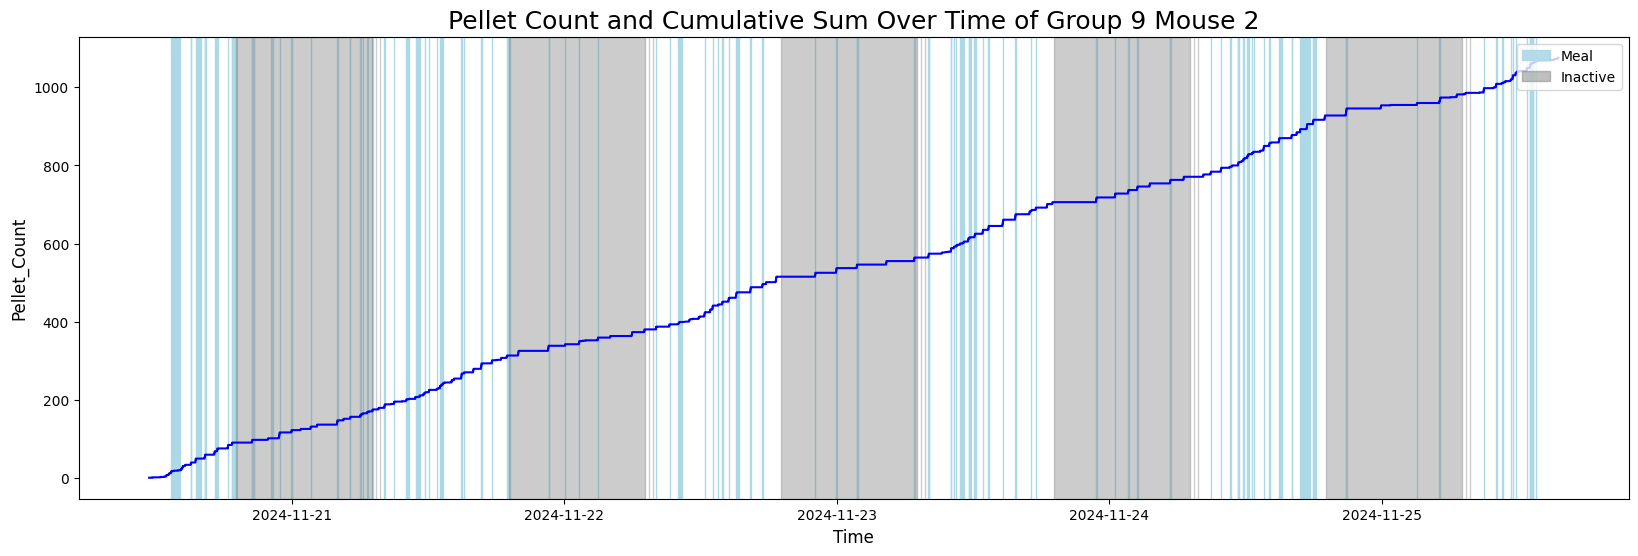

In [2]:
for sheet in rev_ctrl_sheets:
    metrics = ml.process_meal_data(sheet, rev_ctrl_path, is_cask=False, 
                                   export_root=os.path.join(export_root, 'CASK_meal'))
    
    ctrl_avg_pellet.append(metrics['avg_pellet'])
    ctrl_dark_meals.append(metrics['dark_meals'])
    ctrl_fir_meal.append(metrics['fir_meal'])
    ctrl_fir_good_meal.append(metrics['fir_good_meal'])
    flip_ctrl_meal_count.append(metrics['meal_count'])
    ctrl_in_meal_ratios.append(metrics['in_meal_ratio'])

for sheet in rev_cask_sheets:
    metrics = ml.process_meal_data(sheet, rev_cask_path, is_cask=True, 
                                   export_root=os.path.join(export_root, 'CASK_meal'))
    
    cask_avg_pellet.append(metrics['avg_pellet'])
    cask_dark_meals.append(metrics['dark_meals'])
    cask_fir_meal.append(metrics['fir_meal'])
    cask_fir_good_meal.append(metrics['fir_good_meal'])
    flip_cask_meal_count.append(metrics['meal_count'])
    cask_in_meal_ratios.append(metrics['in_meal_ratio'])

### Meal Analysis

In [3]:
ctrl_light_meals = 1 - np.array(ctrl_dark_meals)
cask_light_meals = 1 - np.array(cask_dark_meals)

#### Inactive and active meal in group

In [4]:
invs.perform_T_test(ctrl_light_meals, ctrl_dark_meals)

P Value is  3.945794147860418e-15
There is a significant difference between the two groups.


In [5]:
invs.perform_T_test(cask_dark_meals, cask_light_meals)

P Value is  1.2528824186283859e-31
There is a significant difference between the two groups.


#### Average Meal Count per Day

In [6]:
invs.perform_T_test(flip_ctrl_meal_count, flip_cask_meal_count, test_side='greater')

P Value is  0.05531963373460789
There is no significant difference between the two groups.


#### Inactive and active meal between group

In [7]:
invs.perform_T_test(ctrl_dark_meals, cask_dark_meals, test_side='less')

P Value is  0.1916395899283293
There is no significant difference between the two groups.


* Mice have significant more meals in their active/day time
* No significant difference in the proportion of inactive meals between control and cask groups

### Average Pellet

Control Size: 26
CASK Size: 24
Control Average: 193.315
CASK Average: 225.547
Control SE: 4.177
CASK SE: 5.475


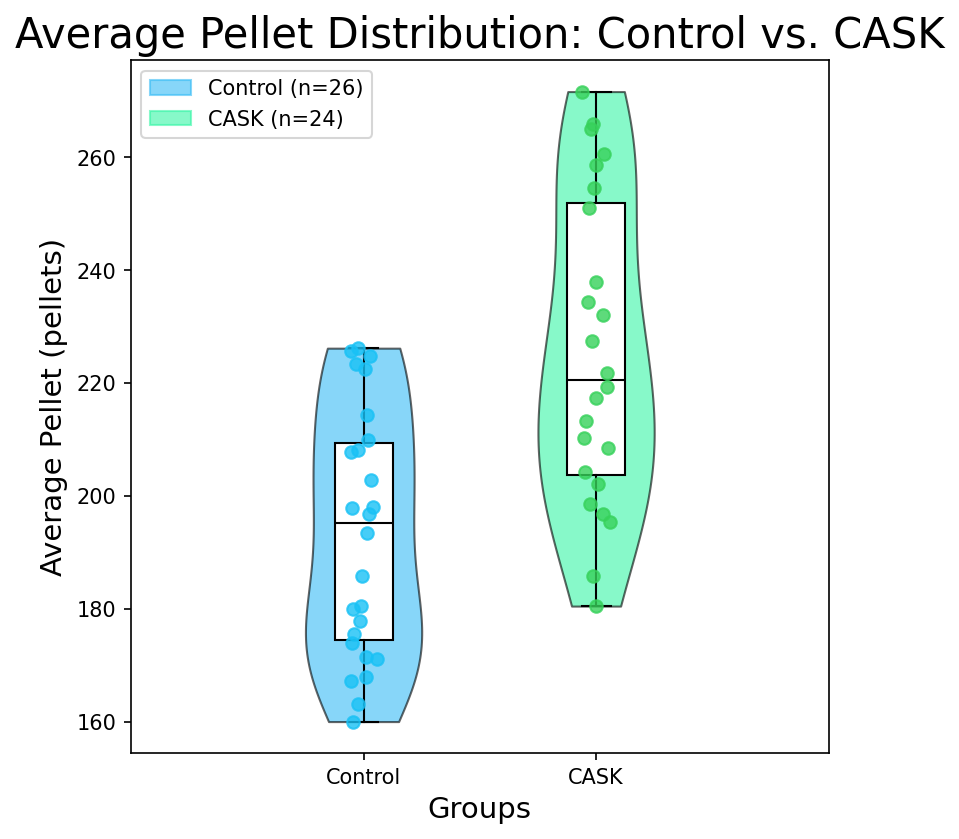

In [8]:
graph_group_stats(ctrl_avg_pellet, cask_avg_pellet, stats_name='Average Pellet', 
                  unit='pellets', group_names=['Control', 'CASK'], 
                  export_path=os.path.join(export_root, '../Figure 4/CASK_pellet_by_day.svg'))

In [9]:
invs.perform_T_test(ctrl_avg_pellet, cask_avg_pellet, test_side='two-sided')

P Value is  2.82846324978385e-05
There is a significant difference between the two groups.


In [10]:
print(np.mean(ctrl_in_meal_ratios), np.std(ctrl_in_meal_ratios) / np.sqrt(len(ctrl_in_meal_ratios)))
print(np.mean(cask_in_meal_ratios), np.std(cask_in_meal_ratios) / np.sqrt(len(cask_in_meal_ratios)))

0.6134556637028067 0.01188428918117827
0.6358256275492127 0.013998316647810937
